In [20]:
import matplotlib.pyplot as plt
import numpy as np
import hydroeval as he
import seaborn as sns
import pandas as pd



In [21]:
Test_p = np.load("/lustre/code/BiasCorrection-Hackathon/BiasCorrection/Codes/Test_prediction2.npy")
Test_r = np.load("/lustre/code/BiasCorrection-Hackathon/BiasCorrection/Codes/Test_raw2.npy")
Test_t = np.load("/lustre/code/BiasCorrection-Hackathon/BiasCorrection/Codes/Test_target2.npy")
Time = np.load("/lustre/code/BiasCorrection-Hackathon/BiasCorrection/Codes/Test_date2.npy")
Test_p.shape, Test_t.shape, Test_r.shape, Time.shape

((827, 20, 186), (827, 20, 186), (827, 20, 186), (827, 186))

In [22]:
Test_t[20,12,:]

array([-5.47162678e-01, -3.98839468e-01, -2.48719009e-01, -1.56162068e-01,
       -5.99632460e-02, -3.01809084e-02, -6.19827077e-02, -2.01030488e-01,
       -3.85877243e-01, -5.34466796e-01, -6.16135392e-01, -5.05563930e-01,
       -3.04359324e-01, -2.04219964e-01, -8.23197517e-02,  5.40582857e-02,
        1.43713256e-01,  9.05229836e-02, -4.65792566e-02, -2.09084535e-01,
       -3.91282468e-01, -5.55362791e-01, -7.45912562e-01, -8.08760715e-01,
       -6.82161735e-01, -4.78782064e-01, -3.39708259e-01, -2.39755195e-01,
       -1.40313477e-01, -4.36382337e-02, -4.23437771e-03, -7.54389604e-02,
       -2.25811926e-01, -4.07527362e-01, -5.01108755e-01, -5.25204294e-01,
       -4.28458627e-01, -2.54624113e-01, -1.52570581e-01, -1.48070785e-02,
        4.79192638e-02,  7.34036536e-02,  7.89782819e-03, -1.30446985e-01,
       -2.91127279e-01, -4.81346702e-01, -6.13183734e-01, -7.16618280e-01,
       -6.97589782e-01, -5.15939622e-01, -3.96010896e-01, -2.27776647e-01,
       -7.37980774e-02,  

In [23]:
k = 0
for i in range(Test_t.shape[0]):
    if(np.isnan(Test_t[i,:,:]).any()):
        print(i)

In [24]:
np.max(np.abs(Test_r-Test_t)), np.max(np.abs(Test_p-Test_t))

(1.7347535287817517, 1.581906517727824)

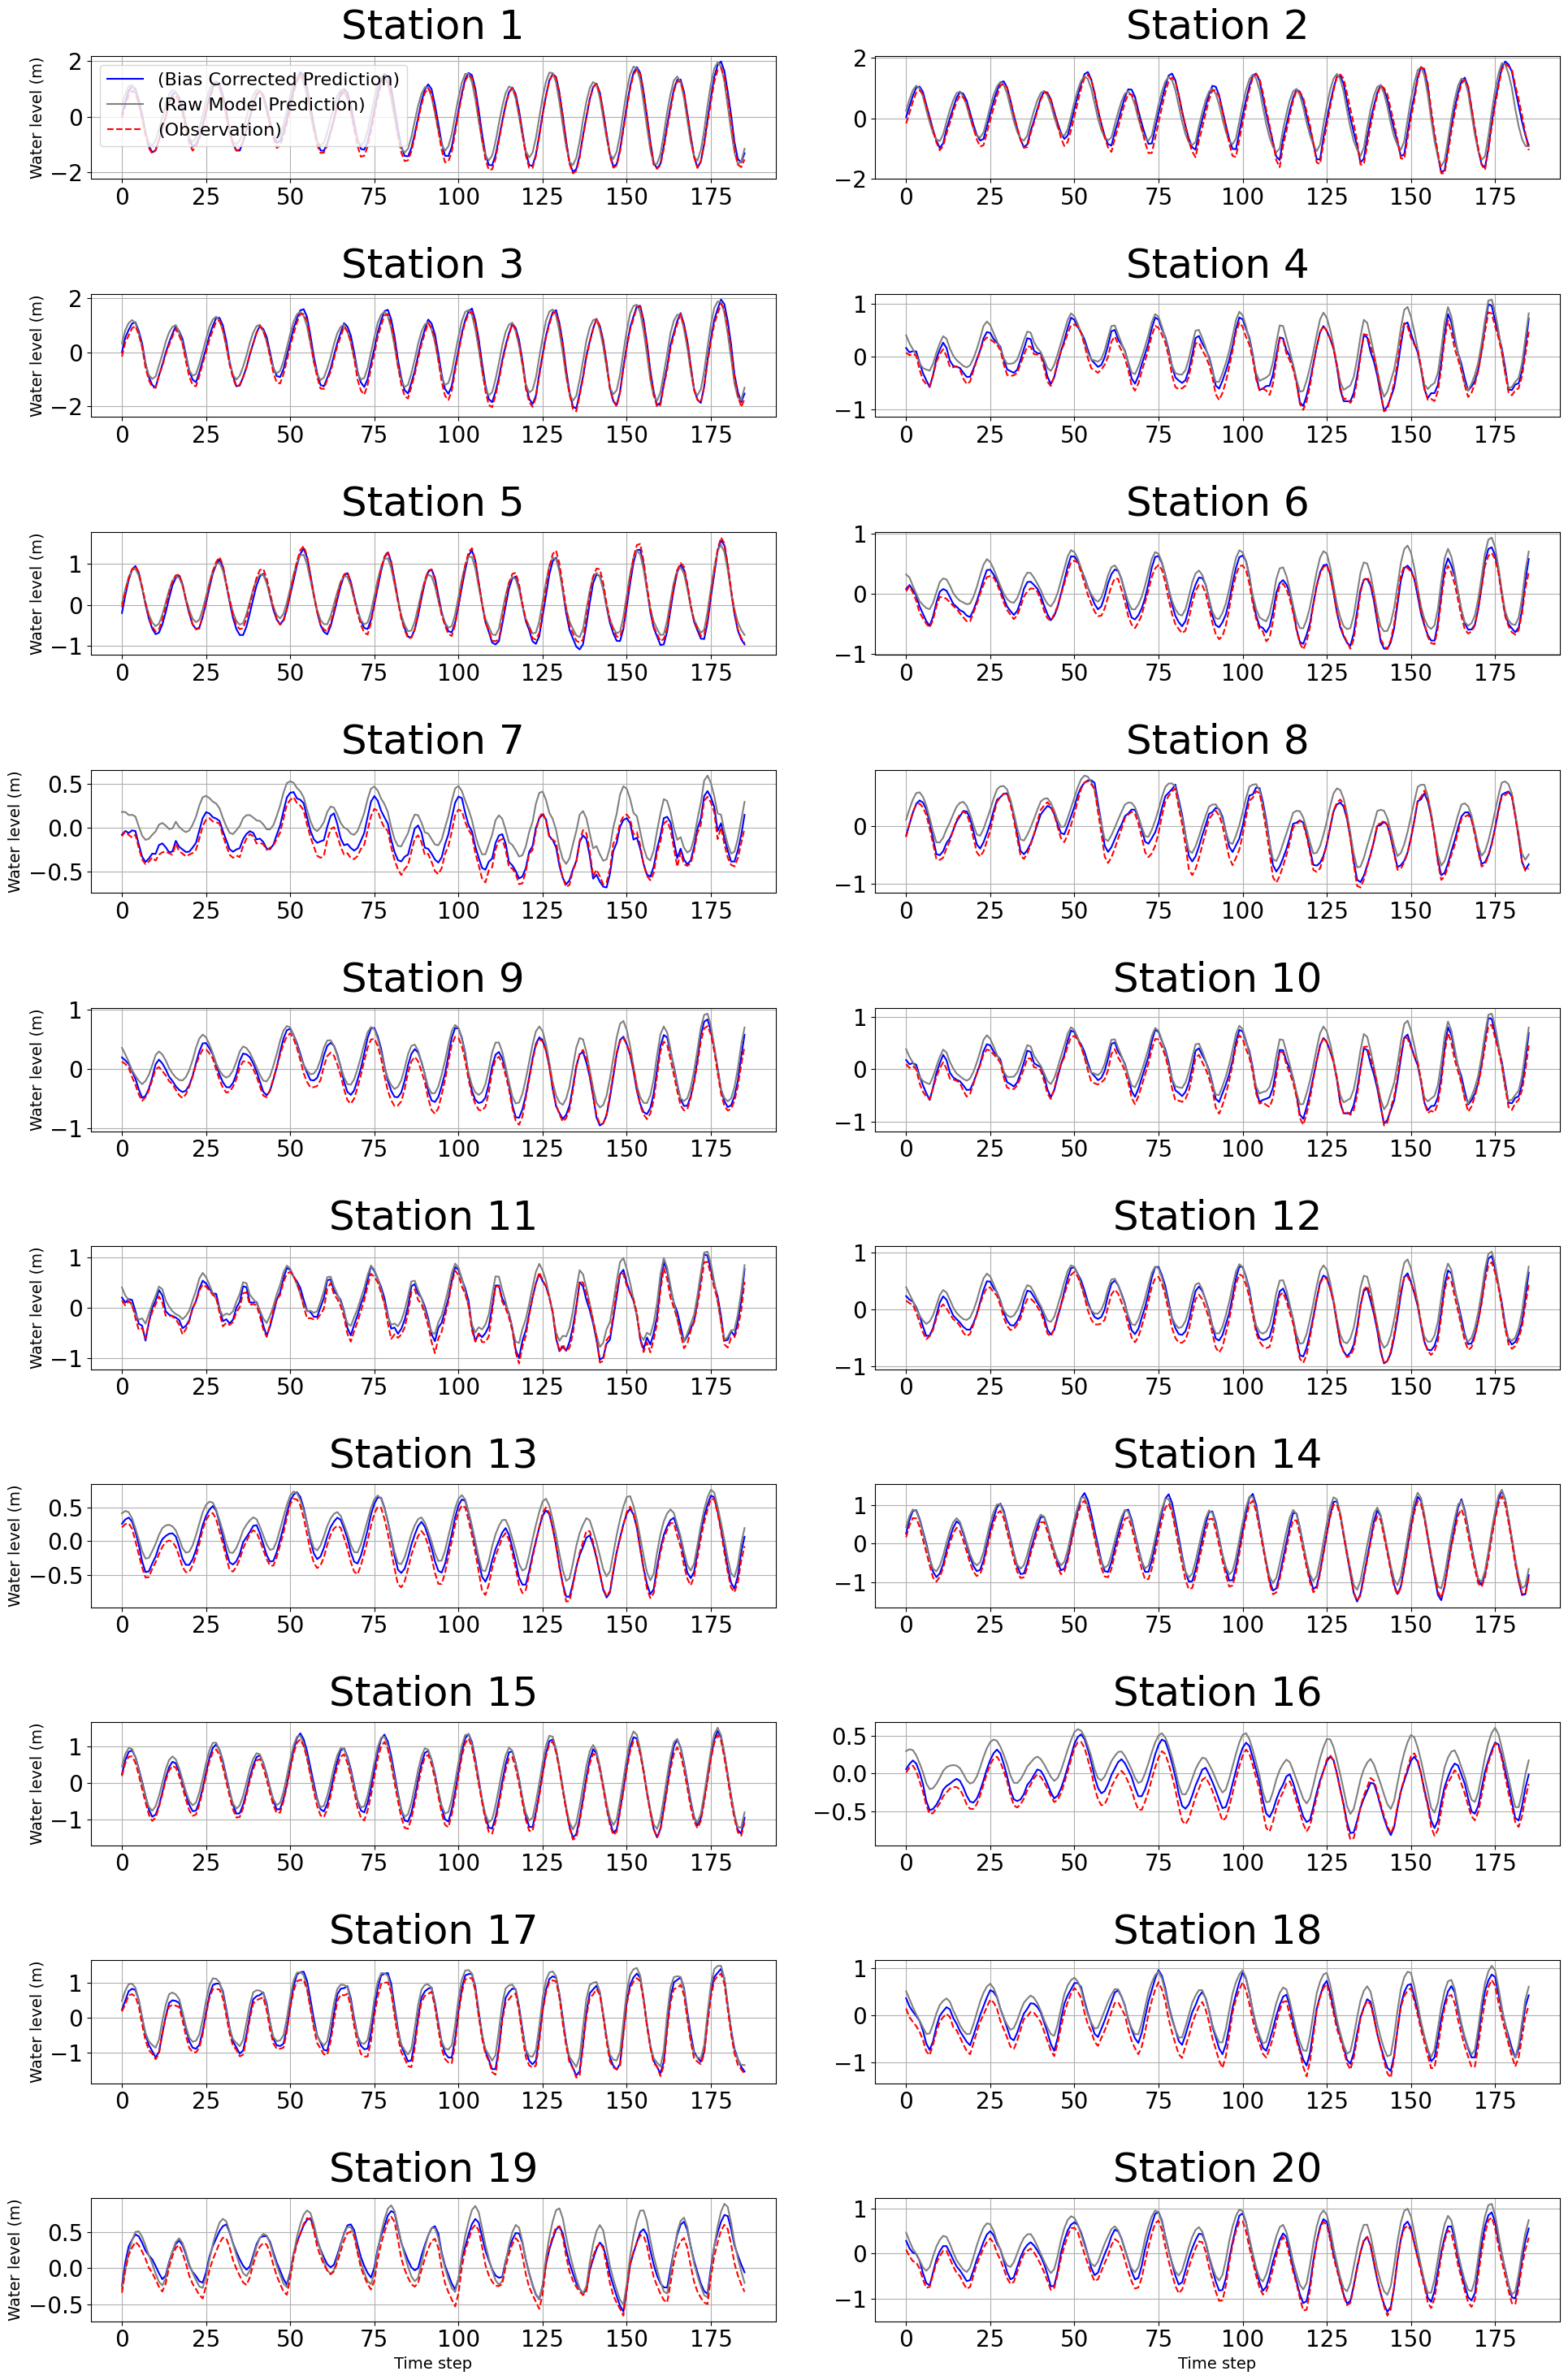

In [25]:

# Assuming `water_level_prediction_test`, `y_test0`, `x_test0` are predefined as per your data
# This will work with your 10x2 grid of subplots

# Set number of rows and columns
nrows = 10
ncols = 2

# Create subplots with 10 rows and 2 columns
fig1, axs1 = plt.subplots(nrows, ncols, figsize=(20, 30))  # Adjust the figsize to accommodate all plots

# Assuming cycle is the specific time point you're working with
cycle = 70

# Flatten the 2D array of axes (axs1 is now a 2D array, we flatten it for easier iteration)
axs1 = axs1.flatten()

for station in range(20):
    axs1[station].plot(Test_p[cycle][station][:], label='(Bias Corrected Prediction)', color='blue')
    axs1[station].plot(Test_r[cycle][station][:], label='(Raw Model Prediction)', color='gray')
    axs1[station].plot(Test_t[cycle][station][:], 
                       label='(Observation)', linestyle='--', color='red')
    

    # Set the title for each subplot
    axs1[station].set_title(f'Station {station + 1}')

# Add a legend to the first plot (this is common to all subplots)
axs1[0].legend(loc='upper left', fontsize=16)

# Add x-axis label ("Time step") to the last row (stations 11 to 20)
for station in [18, 19]:  # Last row corresponds to station 10-19
    axs1[station].set_xlabel('Time step', fontsize=14)
    
# Add y-axis label ("Water level (m)") to the plots on the left (stations 1, 3, 5, ..., 19)
for station in range(0, 20, 2):  # First column corresponds to stations 0, 2, 4, ..., 18
    axs1[station].set_ylabel('Water level (m)', fontsize=14)
    
# Adjust layout to prevent overlapping
fig1.tight_layout()

# Save the plot as a PNG file with 300 DPI
plt.savefig('plots3.png', dpi=300)

# Show the plot
plt.show()


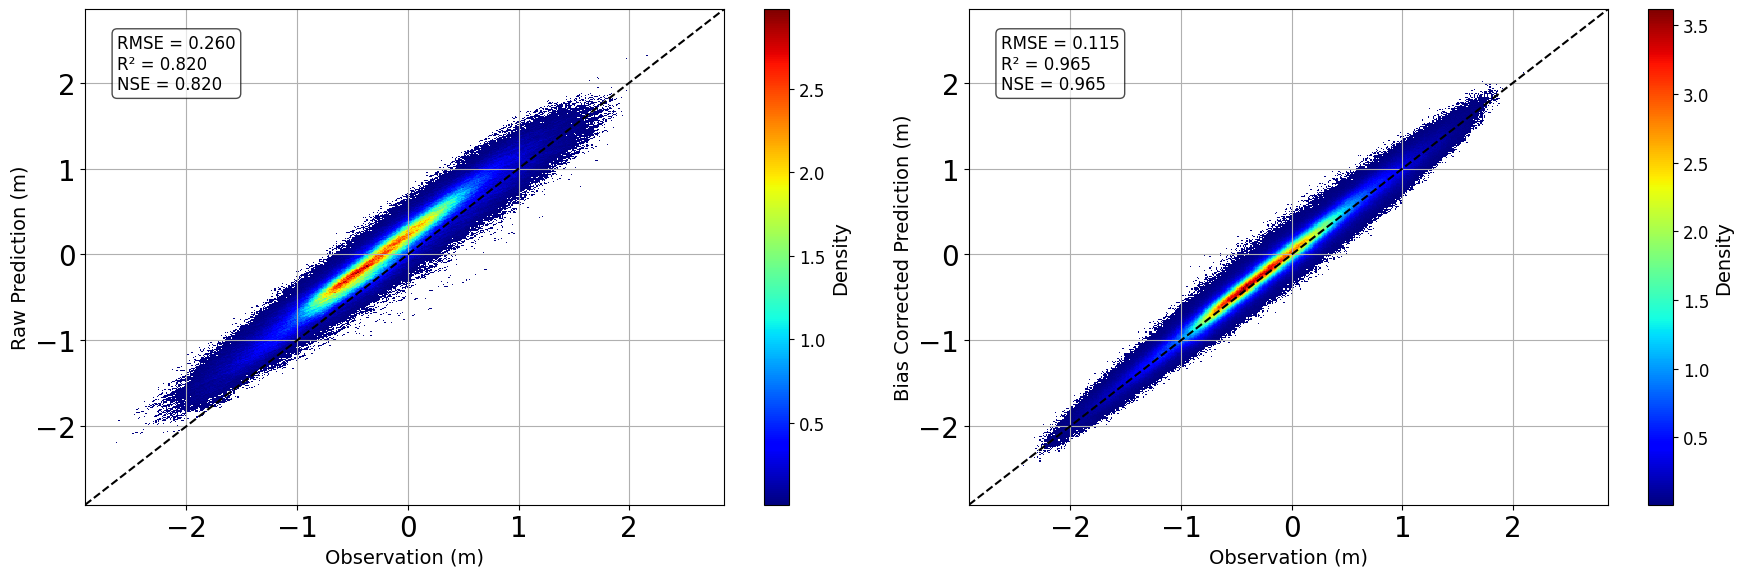

In [26]:
from sklearn.metrics import r2_score
fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # 1 row, 2 columns
# Function to calculate KGE

# Set global font family and size
plt.rcParams.update({
    'font.size': 14,             # Default font size for text elements
    'axes.labelsize': 14,        # Axis label font size
    'xtick.labelsize': 12,       # Font size for x-tick labels
    'ytick.labelsize': 12,       # Font size for y-tick labels
    'legend.fontsize': 12,       # Font size for legend
    'figure.figsize': (16, 6),   # Figure size
    'axes.titlepad': 15,         # Padding for titles
    'axes.grid': True            # Enable grid by default
})


# First subplot (on the right)
# First plot: 2D Histogram (Bias Corrected Prediction)
a = Test_t.reshape(-1)
b = Test_r.reshape(-1)

# Plot the line of perfect agreement (y=x)
axes[0].plot([a.min(), a.max()], [a.min(), a.max()], 'k--')

# Create a colormap and set the color for empty areas (value=0) to white
cmap = plt.cm.jet
cmap.set_under('white')

# Plot the 2D histogram
h2 = axes[0].hist2d(a, b, bins=500, cmap=cmap, density=True, vmin=0.01)

# Add color bar to show the density scale
fig.colorbar(h2[3], ax=axes[0], label='Density')

# Set the x and y limits to match the range of a
axes[0].set_xlim(a.min(), a.max())
axes[0].set_ylim(a.min(), a.max())

correlation = r2_score(a, b)
rmse = np.sqrt(np.mean((b - a)**2))

nse = he.evaluator(he.nse, b, a)

# Add statistics in a text box at the top-left corner of the first subplot
stats_text = f"RMSE = {rmse:.3f}\nR² = {correlation:.3f}\nNSE = {nse[0]:.3f}"
axes[0].text(0.05, 0.95, stats_text, transform=axes[0].transAxes, fontsize=12, verticalalignment='top',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.3'))

axes[0].set_ylabel('Raw Prediction (m)', fontsize=14)
axes[0].set_xlabel('Observation (m)', fontsize=14)


# Second plot: 2D Histogram (Bias Corrected Prediction)
a = Test_t.reshape(-1)
b = Test_p.reshape(-1)

# Plot the line of perfect agreement (y=x)
axes[1].plot([a.min(), a.max()], [a.min(), a.max()], 'k--')

# Create a colormap and set the color for empty areas (value=0) to white
cmap = plt.cm.jet
cmap.set_under('white')

# Plot the 2D histogram
h = axes[1].hist2d(a, b, bins=500, cmap=cmap, density=True, vmin=0.01)

# Add color bar to show the density scale
fig.colorbar(h[3], ax=axes[1], label='Density')

# Set the x and y limits to match the range of a
axes[1].set_xlim(a.min(), a.max())
axes[1].set_ylim(a.min(), a.max())

correlation = r2_score(a, b)
rmse = np.sqrt(np.mean((b - a)**2))

nse = he.evaluator(he.nse, b, a)

# Add statistics in a text box at the top-left corner of the first subplot
stats_text = f"RMSE = {rmse:.3f}\nR² = {correlation:.3f}\nNSE = {nse[0]:.3f}"
axes[1].text(0.05, 0.95, stats_text, transform=axes[1].transAxes, fontsize=12, verticalalignment='top',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.3'))


axes[1].set_ylabel('Bias Corrected Prediction (m)', fontsize=14)
axes[1].set_xlabel('Observation (m)', fontsize=14)




# Adjust layout for better spacing between subplots
plt.tight_layout()

# Save the plot as a PNG file with 300 DPI
plt.savefig('plot1.png', dpi=300)

# Show the plot
plt.show()


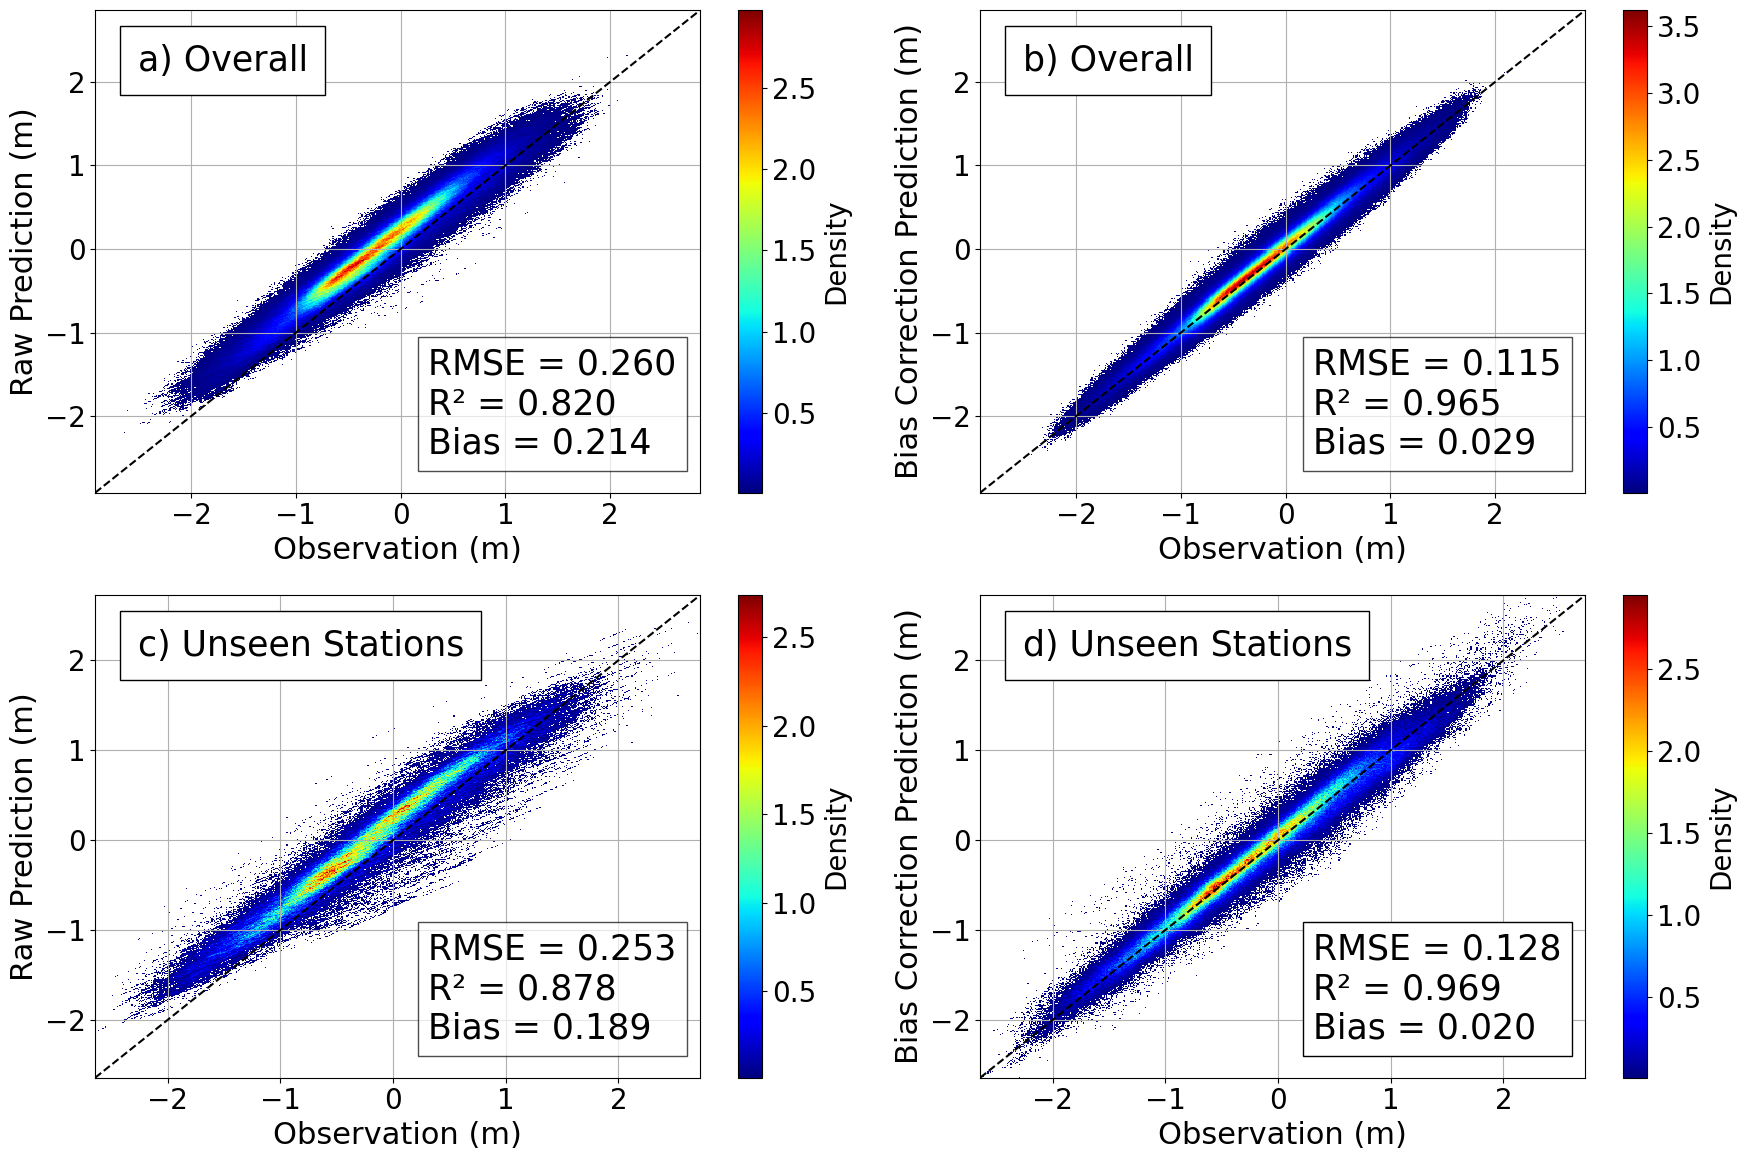

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import hydroeval as he
from sklearn.metrics import r2_score

# Set global font family and size
plt.rcParams.update({
    'font.size': 20,             # Default font size for text elements
    'axes.labelsize': 20,        # Axis label font size
    'xtick.labelsize': 20,       # Font size for x-tick labels
    'ytick.labelsize': 20,       # Font size for y-tick labels
    'legend.fontsize': 20,       # Font size for legend
    'figure.figsize': (16, 9),   # Updated to make room for additional subplots
    'axes.titlepad': 15,         # Padding for titles
    'axes.grid': True            # Enable grid by default
})

# Create 2 rows of subplots (1 row with 2 plots and another row with 2 plots)
fig, axes = plt.subplots(2, 2, figsize=(18, 12))  # 2 rows, 2 columns

# First subplot (on the top-left) - Bias Corrected Prediction for all stations (excluding 1, 5, 13)
a = Test_t.reshape(-1)
b = Test_r.reshape(-1)

# Plot the line of perfect agreement (y=x)
axes[0, 0].plot([a.min(), a.max()], [a.min(), a.max()], 'k--')

# Create a colormap and set the color for empty areas (value=0) to white
cmap = plt.cm.jet
cmap.set_under('white')

# Plot the 2D histogram
h2 = axes[0, 0].hist2d(a, b, bins=500, cmap=cmap, density=True, vmin=0.01)

# Add color bar to show the density scale
fig.colorbar(h2[3], ax=axes[0, 0], label='Density')

# Set the x and y limits to match the range of a
axes[0, 0].set_xlim(a.min(), a.max())
axes[0, 0].set_ylim(a.min(), a.max())

correlation = r2_score(a, b)
rmse = np.sqrt(np.mean((b - a)**2))
bias  = np.mean(b - a)
# Add statistics in a text box at the top-left corner of the first subplot
stats_text = f"RMSE = {rmse:.3f}\nR² = {correlation:.3f}\nBias = {bias:.3f}"
axes[0, 0].text(0.55, 0.3, stats_text, transform=axes[0, 0].transAxes, fontsize=25, verticalalignment='top',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='square,pad=0.3'))

axes[0, 0].text(0.07, 0.93, "a) Overall", transform=axes[0, 0].transAxes, color='black', fontsize=25, verticalalignment='top',
                bbox=dict(facecolor='white', alpha=1, edgecolor='black', boxstyle='square,pad=0.5'))


axes[0, 0].set_ylabel('Raw Prediction (m)', fontsize=22)
axes[0, 0].set_xlabel('Observation (m)', fontsize=22)

# Second subplot (on the top-right) - Bias Corrected Prediction for unseen stations (1, 5, 13)
a = Test_t.reshape(-1)
b = Test_p.reshape(-1)

# Plot the line of perfect agreement (y=x)
axes[0, 1].plot([a.min(), a.max()], [a.min(), a.max()], 'k--')

# Plot the 2D histogram
h = axes[0, 1].hist2d(a, b, bins=500, cmap=cmap, density=True, vmin=0.01)

# Add color bar to show the density scale
fig.colorbar(h[3], ax=axes[0, 1], label='Density')

# Set the x and y limits to match the range of a
axes[0, 1].set_xlim(a.min(), a.max())
axes[0, 1].set_ylim(a.min(), a.max())

correlation = r2_score(a, b)
rmse = np.sqrt(np.mean((b - a)**2))
bias  = np.mean(b - a)
# Add statistics in a text box at the top-left corner of the second subplot
stats_text = f"RMSE = {rmse:.3f}\nR² = {correlation:.3f}\nBias = {bias:.3f}"
axes[0, 1].text(0.55, 0.3, stats_text, transform=axes[0, 1].transAxes, fontsize=25, verticalalignment='top',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='square,pad=0.3'))

axes[0, 1].text(0.07, 0.93, "b) Overall", transform=axes[0, 1].transAxes, color='black', fontsize=25, verticalalignment='top',
                bbox=dict(facecolor='white', alpha=1, edgecolor='black', boxstyle='square,pad=0.5'))


axes[0, 1].set_ylabel('Bias Correction Prediction (m)', fontsize=22)
axes[0, 1].set_xlabel('Observation (m)', fontsize=22)

# Third subplot (on the bottom-left) - Similar to first subplot but for a different subset of data
# (you can adjust this to your needs, for example, different stations or data)
a = Test_t[:, [i for i in range(Test_t.shape[1]) if i in [1, 5, 13]], :].reshape(-1)
b = Test_r[:, [i for i in range(Test_t.shape[1]) if i in [1, 5, 13]], :].reshape(-1)

# Plot the line of perfect agreement (y=x)
axes[1, 0].plot([a.min(), a.max()], [a.min(), a.max()], 'k--')

# Plot the 2D histogram
h2 = axes[1, 0].hist2d(a, b, bins=500, cmap=cmap, density=True, vmin=0.01)

# Add color bar to show the density scale
fig.colorbar(h2[3], ax=axes[1, 0], label='Density')

# Set the x and y limits to match the range of a
axes[1, 0].set_xlim(a.min(), a.max())
axes[1, 0].set_ylim(a.min(), a.max())

correlation = r2_score(a, b)
rmse = np.sqrt(np.mean((b - a)**2))
bias  = np.mean(b - a)
# Add statistics in a text box
stats_text = f"RMSE = {rmse:.3f}\nR² = {correlation:.3f}\nBias = {bias:.3f}"
axes[1, 0].text(0.55, 0.3, stats_text, transform=axes[1, 0].transAxes, fontsize=25, verticalalignment='top',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='square,pad=0.3'))

axes[1, 0].text(0.07, 0.93, "c) Unseen Stations", transform=axes[1, 0].transAxes, color='black', fontsize=25, verticalalignment='top',
                bbox=dict(facecolor='white', alpha=1, edgecolor='black', boxstyle='square,pad=0.5'))

axes[1, 0].set_ylabel('Raw Prediction (m)', fontsize=22)
axes[1, 0].set_xlabel('Observation (m)', fontsize=22)

# Fourth subplot (on the bottom-right) - Similar to second subplot
a = Test_t[:, [i for i in range(Test_t.shape[1]) if i in [1, 5, 13]], :].reshape(-1)
b = Test_p[:, [i for i in range(Test_t.shape[1]) if i in [1, 5, 13]], :].reshape(-1)

# Plot the line of perfect agreement (y=x)
axes[1, 1].plot([a.min(), a.max()], [a.min(), a.max()], 'k--')

# Plot the 2D histogram
h = axes[1, 1].hist2d(a, b, bins=500, cmap=cmap, density=True, vmin=0.01)

# Add color bar to show the density scale
fig.colorbar(h[3], ax=axes[1, 1], label='Density')

# Set the x and y limits to match the range of a
axes[1, 1].set_xlim(a.min(), a.max())
axes[1, 1].set_ylim(a.min(), a.max())

correlation = r2_score(a, b)
rmse = np.sqrt(np.mean((b - a)**2))
bias  = np.mean(b - a)
# Add statistics in a text box
stats_text = f"RMSE = {rmse:.3f}\nR² = {correlation:.3f}\nBias = {bias:.3f}"
axes[1, 1].text(0.55, 0.3, stats_text, transform=axes[1, 1].transAxes, fontsize=25, verticalalignment='top',
                bbox=dict(facecolor='white', alpha=1, edgecolor='black', boxstyle='square,pad=0.3'))

axes[1, 1].text(0.07, 0.93, "d) Unseen Stations", transform=axes[1, 1].transAxes, color='black', fontsize=25, verticalalignment='top',
                bbox=dict(facecolor='white', alpha=1, edgecolor='black', boxstyle='square,pad=0.5'))

axes[1, 1].set_ylabel('Bias Correction Prediction (m)', fontsize=22)
axes[1, 1].set_xlabel('Observation (m)', fontsize=22)

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Save the plot as a PNG file with 300 DPI
plt.savefig('figure4.png', dpi=1200)

# Show the plot
plt.show()


(827, 20)
(827, 20)


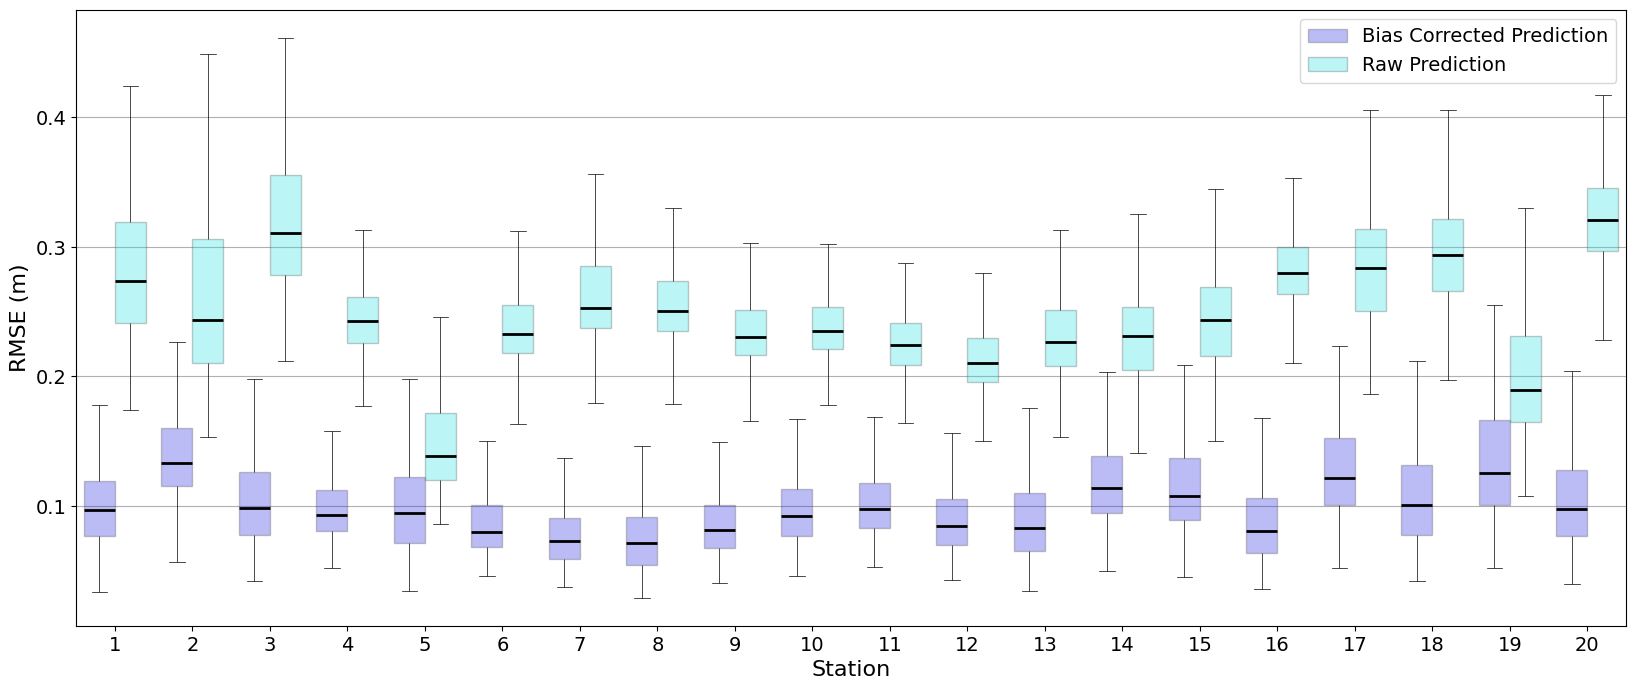

In [28]:

bias_corrected_model_data = np.empty([np.shape(Test_t)[0],np.shape(Test_t)[1]])
raw_model_data = np.empty([np.shape(Test_t)[0],np.shape(Test_t)[1]])

for j in range(np.shape(Test_t)[0]):
    for i in range(20):
         bias_corrected_model_data[j,i] = np.sqrt(np.mean((Test_p[j,i,:] - Test_t[j,i,:])**2))
         raw_model_data[j,i]= np.sqrt(np.mean((Test_r[j,i,:] - Test_t[j,i,:])**2))

print(np.shape(bias_corrected_model_data))
print(np.shape(raw_model_data))



# Create an empty list to store dataframes
df_list = []

# Loop over each station (from 0 to 19, for a total of 20 stations)
for station in range(20):
    # Stack the data for the current station
    df = pd.DataFrame(np.column_stack((bias_corrected_model_data[:, station], raw_model_data[:, station])),
                      columns=['Bias Corrected Prediction', 'Raw Prediction'])
    # Assign the station number
    df['Station'] = station + 1  # Station numbers start from 1
    # Append to the list of dataframes
    df_list.append(df)

# Concatenate all the dataframes into one
cdf = pd.concat(df_list)

# Melt the dataframe for seaborn boxplot
mdf = pd.melt(cdf, id_vars=['Station'], var_name='Prediction Type', value_name='Water Level')


# Set the figure size
plt.figure(figsize=(20, 8))

# Create the boxplot with different colors for each category
ax = sns.boxplot(x="Station", y="Water Level", hue="Prediction Type", data=mdf,
                 palette={'Bias Corrected Prediction': 'blue', 'Raw Prediction': 'cyan'},
                 showfliers=False,  # Remove outliers from the plot
                 boxprops=dict(alpha=0.3),  # Set transparency of the box fill
                 whiskerprops=dict(color='black', linewidth=0.5),  # Set whisker lines color and thickness
                 capprops=dict(color='black', linewidth=0.5),  # Set cap lines color and thickness
                 medianprops=dict(color='black', linewidth= 2))  # Set median line color and thickness

# Adjust transparency per hue using different color for each boxplot
for patch, color in zip(ax.artists, ['blue', 'cyan']):
    patch.set_facecolor(color)
    patch.set_alpha(0.3)  # Apply transparency to the fill

# Remove the legend title
ax.get_legend().set_title(None)

# Increase font size for ticks, legend, and labels
ax.tick_params(axis='both', labelsize=14)  # Increase size of ticks on both axes
ax.set_xlabel('Station', fontsize=16)  # Increase x-axis label font size
ax.set_ylabel('RMSE (m)', fontsize=16)  # Increase y-axis label font size

# Increase font size of legend
legend = ax.get_legend()
for label in legend.get_texts():  # Change font size of legend labels
    label.set_fontsize(14)

ax.legend(loc='upper right', fontsize=14)

# Save the plot
plt.savefig("plot3.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

# Clear the plot after showing it
plt.clf()
plt.close()

(827, 20)
(827, 20)


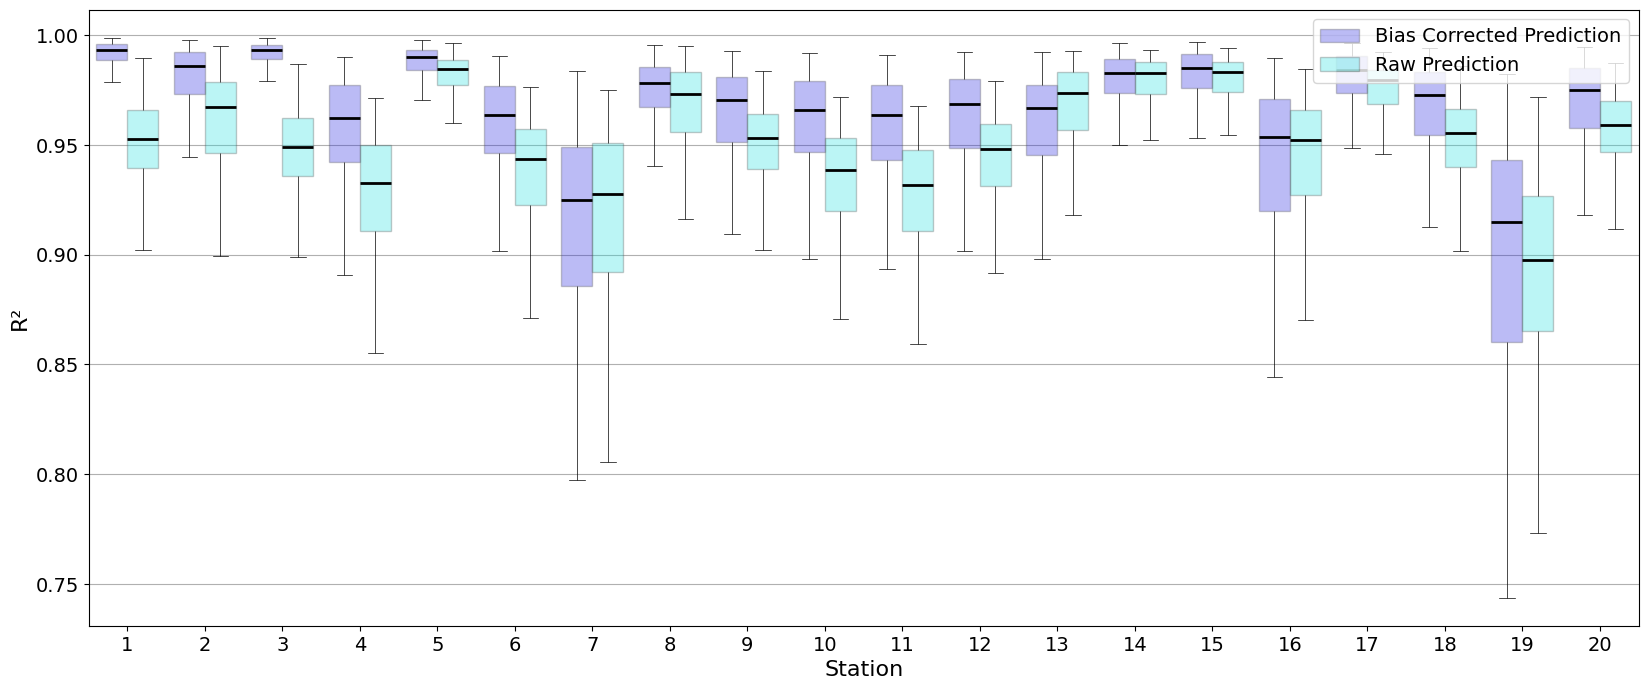

In [29]:
bias_corrected_model_data = np.empty([np.shape(Test_t)[0],np.shape(Test_t)[1]])
raw_model_data = np.empty([np.shape(Test_t)[0],np.shape(Test_t)[1]])

for j in range(np.shape(Test_t)[0]):
    for i in range(20):
         bias_corrected_model_data[j,i] = np.corrcoef(Test_t[j,i,:], Test_p[j,i,:])[0, 1]**2
         raw_model_data[j,i]= np.corrcoef(Test_t[j,i,:], Test_r[j,i,:])[0, 1]**2

print(np.shape(bias_corrected_model_data))
print(np.shape(raw_model_data))



# Create an empty list to store dataframes
df_list = []

# Loop over each station (from 0 to 19, for a total of 20 stations)
for station in range(20):
    # Stack the data for the current station
    df = pd.DataFrame(np.column_stack((bias_corrected_model_data[:, station], raw_model_data[:, station])),
                      columns=['Bias Corrected Prediction', 'Raw Prediction'])
    # Assign the station number
    df['Station'] = station + 1  # Station numbers start from 1
    # Append to the list of dataframes
    df_list.append(df)

# Concatenate all the dataframes into one
cdf = pd.concat(df_list)

# Melt the dataframe for seaborn boxplot
mdf = pd.melt(cdf, id_vars=['Station'], var_name='Prediction Type', value_name='Water Level')


# Set the figure size
plt.figure(figsize=(20, 8))

# Create the boxplot with different colors for each category
ax = sns.boxplot(x="Station", y="Water Level", hue="Prediction Type", data=mdf,
                 palette={'Bias Corrected Prediction': 'blue', 'Raw Prediction': 'cyan'},
                 showfliers=False,  # Remove outliers from the plot
                 boxprops=dict(alpha=0.3),  # Set transparency of the box fill
                 whiskerprops=dict(color='black', linewidth=0.5),  # Set whisker lines color and thickness
                 capprops=dict(color='black', linewidth=0.5),  # Set cap lines color and thickness
                 medianprops=dict(color='black', linewidth= 2))  # Set median line color and thickness

# Adjust transparency per hue using different color for each boxplot
for patch, color in zip(ax.artists, ['blue', 'cyan']):
    patch.set_facecolor(color)
    patch.set_alpha(0.3)  # Apply transparency to the fill

# Remove the legend title
ax.get_legend().set_title(None)

# Increase font size for ticks, legend, and labels
ax.tick_params(axis='both', labelsize=14)  # Increase size of ticks on both axes
ax.set_xlabel('Station', fontsize=16)  # Increase x-axis label font size
ax.set_ylabel('R²', fontsize=16)  # Increase y-axis label font size

# Increase font size of legend
legend = ax.get_legend()
for label in legend.get_texts():  # Change font size of legend labels
    label.set_fontsize(14)

ax.legend(loc='upper right', fontsize=14)

# Save the plot
plt.savefig("plot3.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

# Clear the plot after showing it
plt.clf()
plt.close()

(827, 20)
(827, 20)


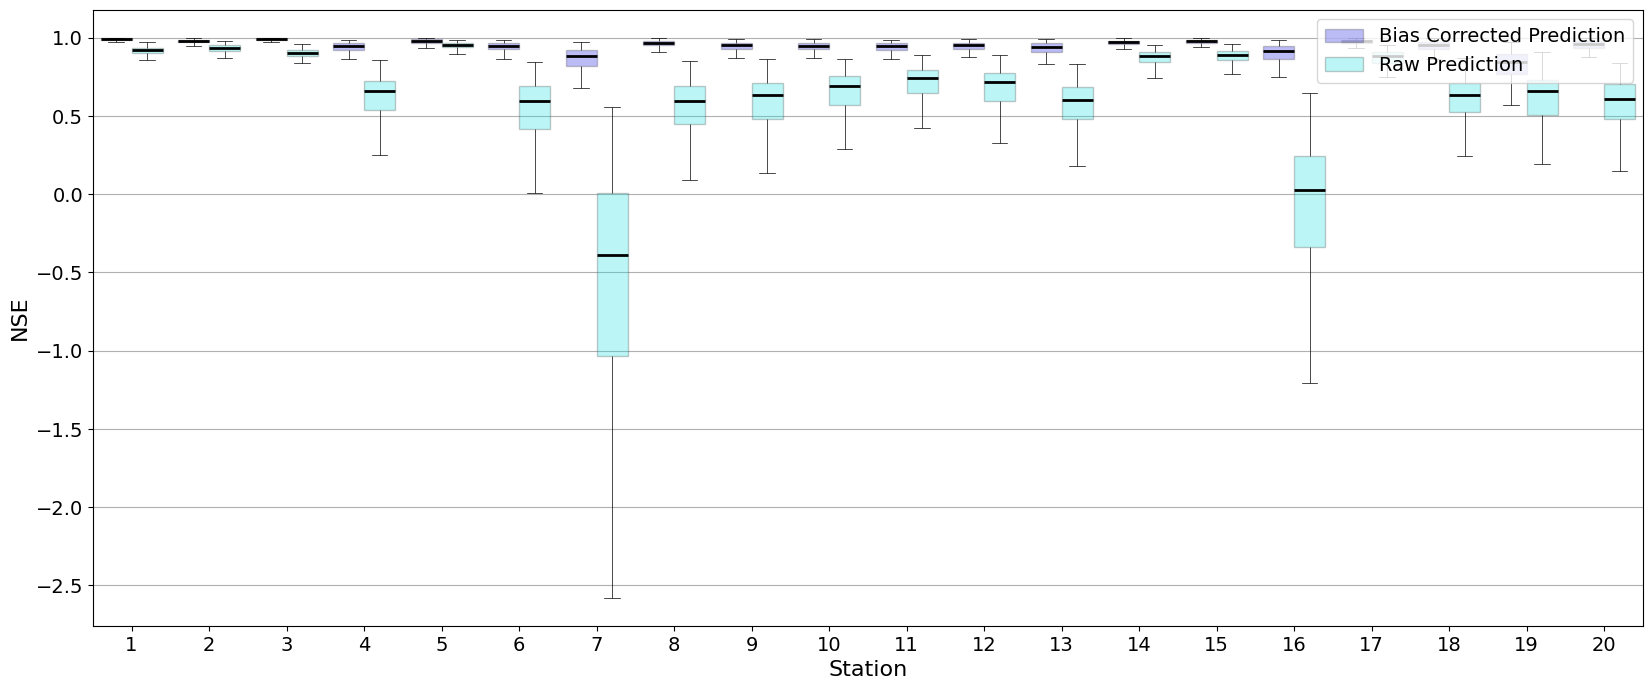

In [30]:
bias_corrected_model_data = np.empty([np.shape(Test_t)[0],np.shape(Test_t)[1]])
raw_model_data = np.empty([np.shape(Test_t)[0],np.shape(Test_t)[1]])

for j in range(np.shape(Test_t)[0]):
    for i in range(20):
         bias_corrected_model_data[j,i] = he.evaluator(he.nse, Test_p[j,i,:], Test_t[j,i,:])
         raw_model_data[j,i]= he.evaluator(he.nse, Test_r[j,i,:], Test_t[j,i,:])

print(np.shape(bias_corrected_model_data))
print(np.shape(raw_model_data))



# Create an empty list to store dataframes
df_list = []

# Loop over each station (from 0 to 19, for a total of 20 stations)
for station in range(20):
    # Stack the data for the current station
    df = pd.DataFrame(np.column_stack((bias_corrected_model_data[:, station], raw_model_data[:, station])),
                      columns=['Bias Corrected Prediction', 'Raw Prediction'])
    # Assign the station number
    df['Station'] = station + 1  # Station numbers start from 1
    # Append to the list of dataframes
    df_list.append(df)

# Concatenate all the dataframes into one
cdf = pd.concat(df_list)

# Melt the dataframe for seaborn boxplot
mdf = pd.melt(cdf, id_vars=['Station'], var_name='Prediction Type', value_name='Water Level')


# Set the figure size
plt.figure(figsize=(20, 8))

# Create the boxplot with different colors for each category
ax = sns.boxplot(x="Station", y="Water Level", hue="Prediction Type", data=mdf,
                 palette={'Bias Corrected Prediction': 'blue', 'Raw Prediction': 'cyan'},
                 showfliers=False,  # Remove outliers from the plot
                 boxprops=dict(alpha=0.3),  # Set transparency of the box fill
                 whiskerprops=dict(color='black', linewidth=0.5),  # Set whisker lines color and thickness
                 capprops=dict(color='black', linewidth=0.5),  # Set cap lines color and thickness
                 medianprops=dict(color='black', linewidth= 2))  # Set median line color and thickness

# Adjust transparency per hue using different color for each boxplot
for patch, color in zip(ax.artists, ['blue', 'cyan']):
    patch.set_facecolor(color)
    patch.set_alpha(0.3)  # Apply transparency to the fill

# Remove the legend title
ax.get_legend().set_title(None)

# Increase font size for ticks, legend, and labels
ax.tick_params(axis='both', labelsize=14)  # Increase size of ticks on both axes
ax.set_xlabel('Station', fontsize=16)  # Increase x-axis label font size
ax.set_ylabel('NSE', fontsize=16)  # Increase y-axis label font size

# Increase font size of legend
legend = ax.get_legend()
for label in legend.get_texts():  # Change font size of legend labels
    label.set_fontsize(14)

ax.legend(loc='upper right', fontsize=14)

# Save the plot
plt.savefig("plot3.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

# Clear the plot after showing it
plt.clf()
plt.close()

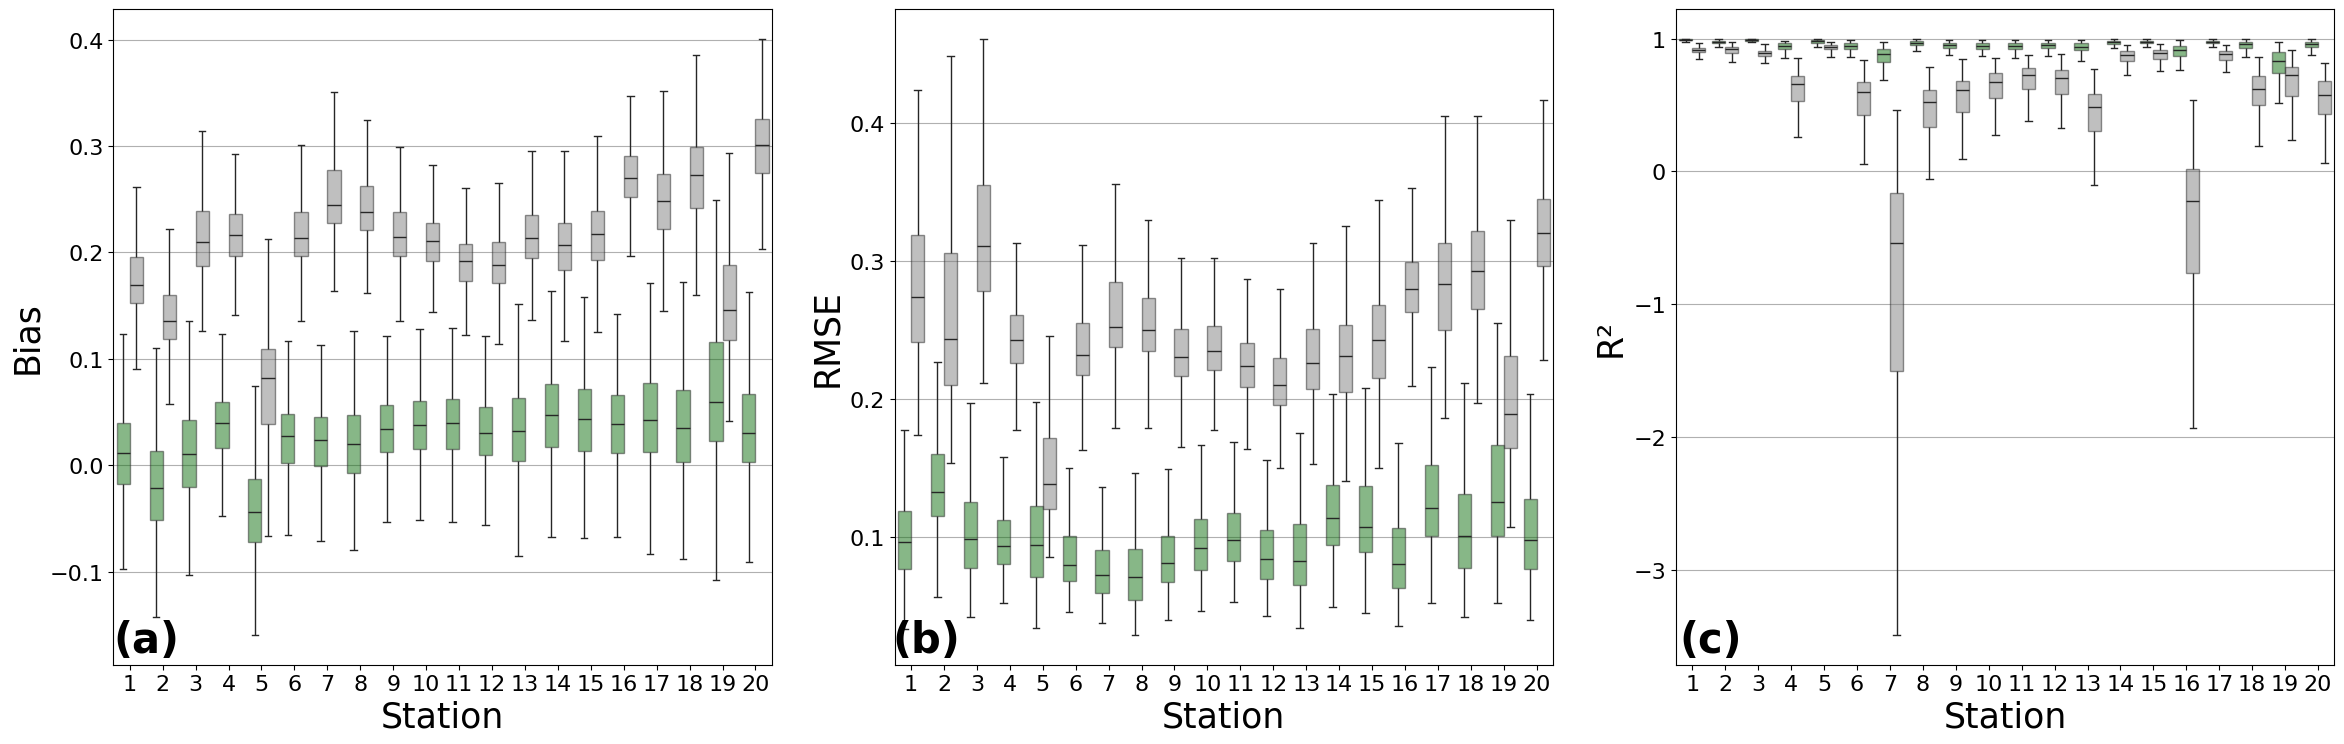

In [31]:
import string
# Add subplot labels (a), (b), (c)
labels = ['a', 'b', 'c']



bias_corrected_rmse = np.empty([np.shape(Test_t)[0], np.shape(Test_t)[1]])
raw_rmse = np.empty([np.shape(Test_t)[0], np.shape(Test_t)[1]])

bias_corrected_r2 = np.empty([np.shape(Test_t)[0], np.shape(Test_t)[1]])
raw_r2 = np.empty([np.shape(Test_t)[0], np.shape(Test_t)[1]])

bias_corrected_bias = np.empty([np.shape(Test_t)[0], np.shape(Test_t)[1]])
raw_bias = np.empty([np.shape(Test_t)[0], np.shape(Test_t)[1]])

def r2(predictions, true_values):
    ss_res = np.sum((true_values - predictions) ** 2)
    ss_tot = np.sum((true_values - np.mean(true_values)) ** 2)
    return 1 - ss_res / ss_tot



for j in range(np.shape(Test_t)[0]):
    for i in range(20):
        bias_corrected_rmse[j, i] = np.sqrt(np.mean((Test_p[j, i, :] - Test_t[j, i, :])**2))
        raw_rmse[j, i] = np.sqrt(np.mean((Test_r[j, i, :] - Test_t[j, i, :])**2))
        bias_corrected_r2[j, i] = r2(Test_t[j, i, :], Test_p[j, i, :])
        raw_r2[j, i] = r2(Test_t[j, i, :], Test_r[j, i, :])
        bias_corrected_bias[j, i] = np.mean(Test_p[j, i, :]-Test_t[j, i, :])
        raw_bias[j, i] = np.mean(Test_r[j, i, :]-Test_t[j, i, :])

metrics = {'Bias': (bias_corrected_bias, raw_bias),'RMSE': (bias_corrected_rmse, raw_rmse), 'R²': (bias_corrected_r2, raw_r2)}
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

i=0
for ax, (metric_name, (bias_corrected, raw)) in zip(axes, metrics.items()):
    df_list = []
    for station in range(20):
        df = pd.DataFrame(np.column_stack((bias_corrected[:, station], raw[:, station])),
                          columns=['Bias Corrected Prediction', 'Raw Prediction'])
        df['Station'] = station + 1
        df_list.append(df)
    
    cdf = pd.concat(df_list)
    mdf = pd.melt(cdf, id_vars=['Station'], var_name='Prediction Type', value_name=metric_name)
    
    sns.boxplot(x="Station", y=metric_name, hue="Prediction Type", data=mdf,
                palette={'Bias Corrected Prediction': 'green', 'Raw Prediction': 'gray'},
                showfliers=False, boxprops=dict(alpha=0.5), ax=ax)
    ax.set_xlabel('Station', fontsize=25)
    ax.set_ylabel(metric_name, fontsize=25)
    ax.tick_params(axis='both', labelsize=16)
    ax.legend()
    ax.get_legend().remove()

    

    ax.text(0.1, 0.07, f'({labels[i]})', transform=ax.transAxes,
            fontsize=30, fontweight='bold', va='top', ha='right')
    i= i+1
#ax.legend().set_title(None)
#ax.legend(loc='lower right', fontsize=25)
# Set global font family and size
plt.rcParams.update({
    'font.size': 25,             # Default font size for text elements
    'axes.labelsize': 25,        # Axis label font size
    'xtick.labelsize': 25,       # Font size for x-tick labels
    'ytick.labelsize': 25,       # Font size for y-tick labels
    'legend.fontsize': 25,       # Font size for legend
})
plt.tight_layout()
plt.savefig("combined_plot1.png", dpi=1200, bbox_inches='tight')
plt.show()


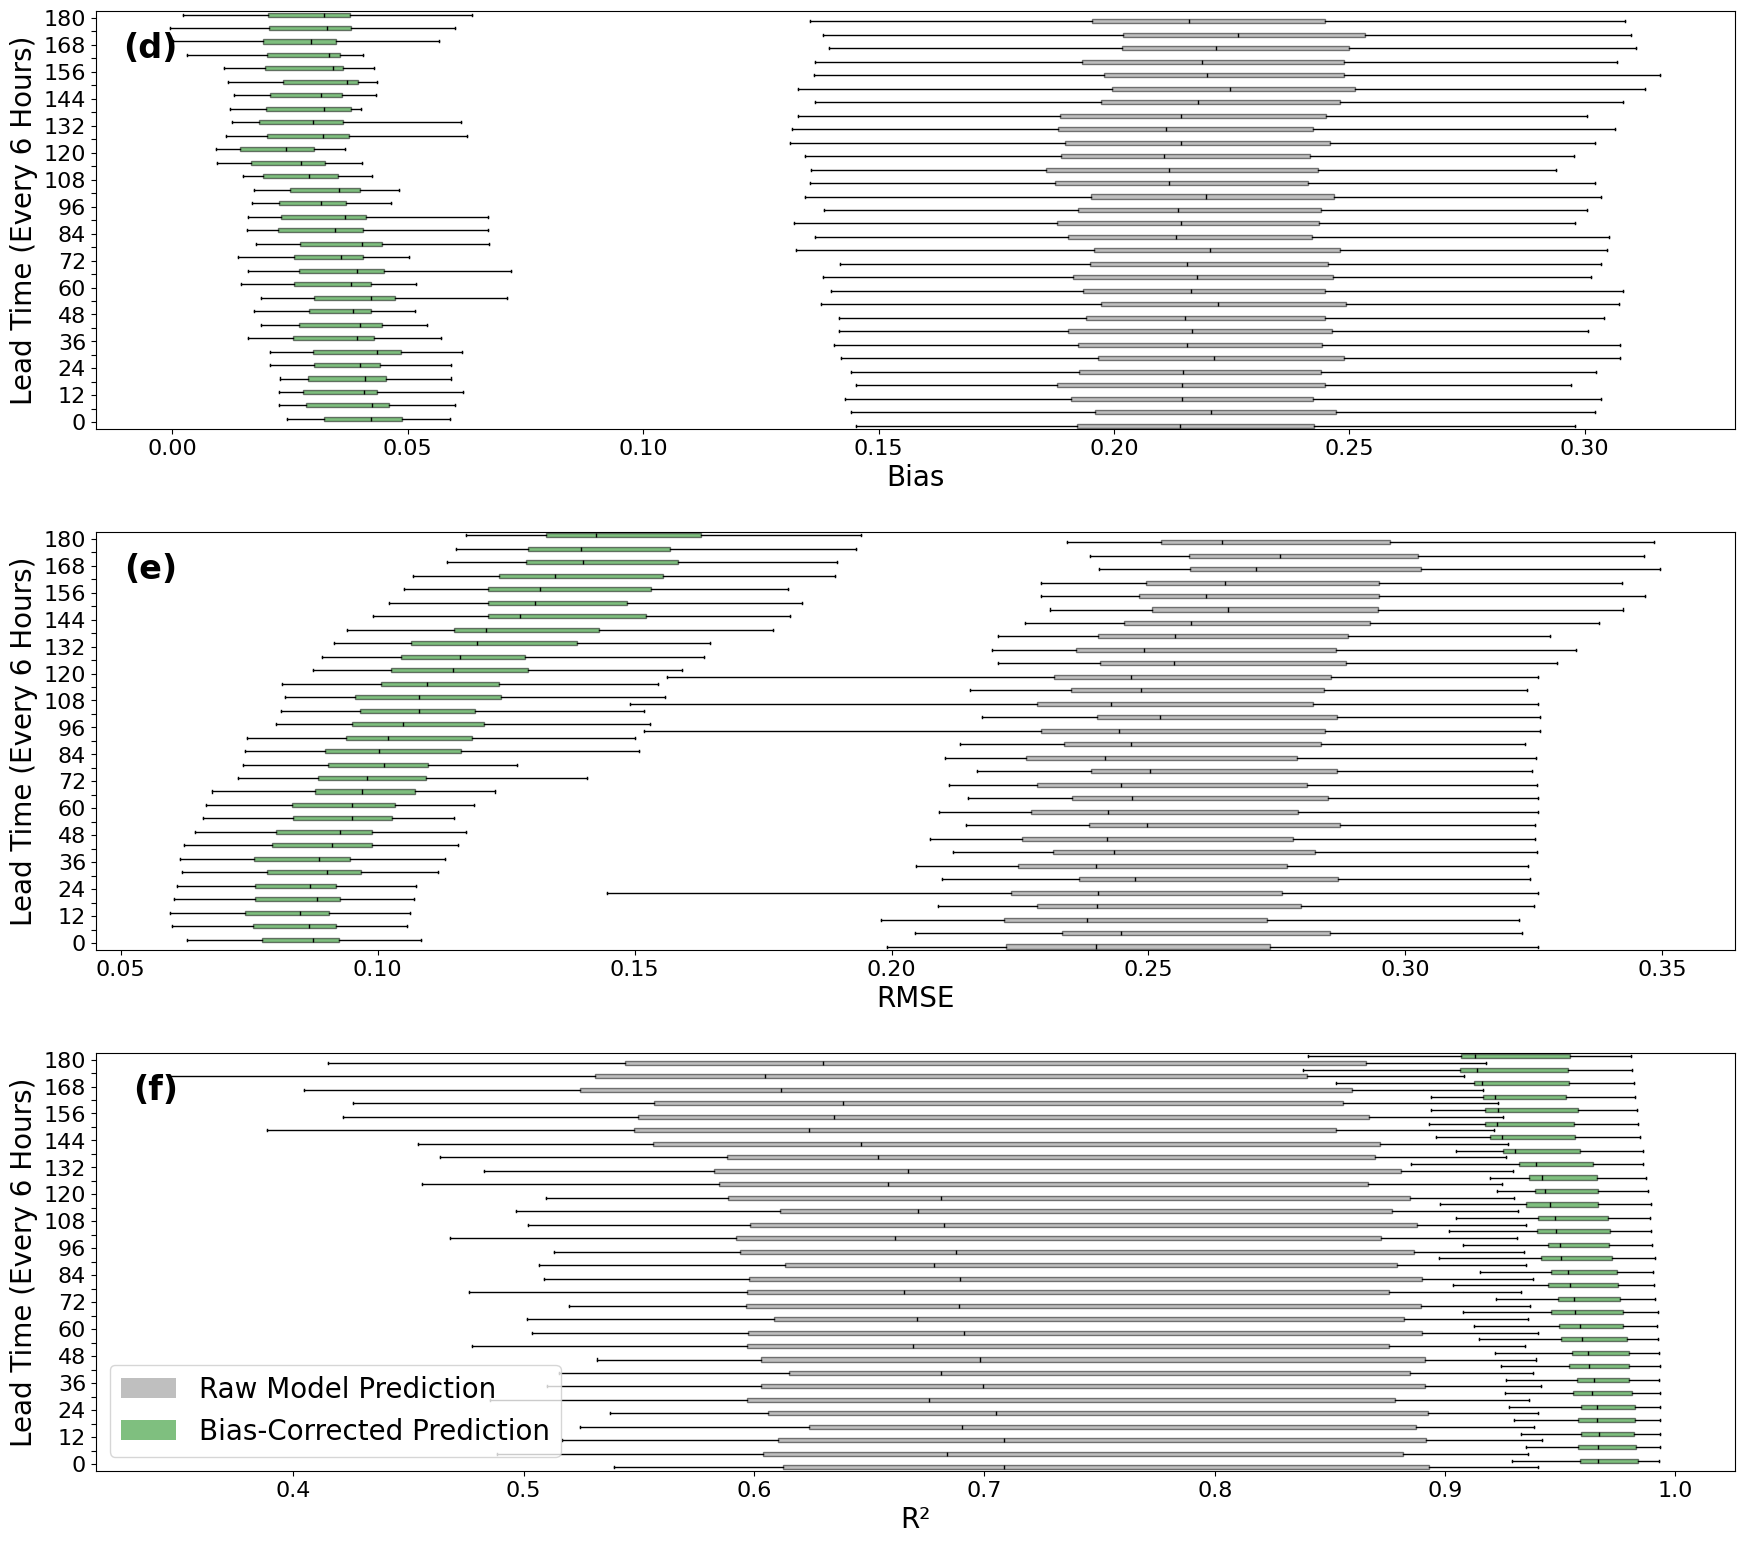

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Select indices for every 6th time step
time_indices = range(0, 186, 6)

def rmse(predictions, true_values):
    return np.sqrt(np.mean((predictions - true_values) ** 2, axis=(0, 2)))

def r2_manual(predictions, true_values):
    ss_res = np.sum((true_values - predictions) ** 2, axis=(0, 2))
    ss_tot = np.sum((true_values - np.mean(true_values, axis=(0, 2), keepdims=True)) ** 2, axis=(0, 2))
    return 1 - ss_res / ss_tot

# Create figure with subplots (3 rows, 1 column)
fig, axes = plt.subplots(3, 1, figsize=(18, 16))

# Bias Plot
bias_raw_samples = [np.mean(Test_r[:, :, i:i+6] - Test_t[:, :, i:i+6], axis=(0, 2)) for i in time_indices]
bias_corrected_samples = [np.mean(Test_p[:, :, i:i+6] - Test_t[:, :, i:i+6], axis=(0, 2)) for i in time_indices]
axes[0].boxplot(bias_raw_samples, positions=np.arange(len(time_indices)) * 2, widths=0.6, patch_artist=True, showfliers=False, boxprops=dict(facecolor='gray', alpha=0.5), medianprops=dict(color='black'), vert=False)
axes[0].boxplot(bias_corrected_samples, positions=np.arange(len(time_indices)) * 2 + 1, widths=0.6, showfliers=False, patch_artist=True, boxprops=dict(facecolor='green', alpha=0.5), medianprops=dict(color='black'), vert=False)
axes[0].set_yticks(np.arange(len(time_indices)) * 2 + 0.5)
axes[0].set_yticklabels([f'{i}' for i in time_indices])
axes[0].set_ylabel('Lead Time (Every 6 Hours)',fontsize=20)
axes[0].tick_params(axis='x', labelsize=16)
axes[0].set_xlabel('Bias',fontsize=20)
labels = axes[0].get_yticklabels()
for i, label in enumerate(labels):
        if i % 2 != 0:
            label.set_visible(False)
axes[0].tick_params(axis='y', labelsize=16)
axes[0].text(0.05, 0.95, f'(d)', transform=axes[0].transAxes,
            fontsize=24, fontweight='bold', va='top', ha='right')
axes[0].grid()

# RMSE Plot
rmse_raw_samples = [rmse(Test_r[:, :, i:i+6], Test_t[:, :, i:i+6]) for i in time_indices]
rmse_corrected_samples = [rmse(Test_p[:, :, i:i+6], Test_t[:, :, i:i+6]) for i in time_indices]
axes[1].boxplot(rmse_raw_samples, positions=np.arange(len(time_indices)) * 2, widths=0.6, patch_artist=True, showfliers=False, boxprops=dict(facecolor='gray', alpha=0.5), medianprops=dict(color='black'), vert=False)
axes[1].boxplot(rmse_corrected_samples, positions=np.arange(len(time_indices)) * 2 + 1, widths=0.6, showfliers=False, patch_artist=True, boxprops=dict(facecolor='green', alpha=0.5), medianprops=dict(color='black'), vert=False)
axes[1].set_yticks(np.arange(len(time_indices)) * 2 + 0.5)
axes[1].set_yticklabels([f'{i}' for i in time_indices])
axes[1].set_ylabel('Lead Time (Every 6 Hours)',fontsize=20)
axes[1].tick_params(axis='x', labelsize=16)
axes[1].tick_params(axis='y', labelsize=12)
axes[1].set_xlabel('RMSE',fontsize=20)
axes[1].text(0.05, 0.95, f'(e)', transform=axes[1].transAxes,
            fontsize=24, fontweight='bold', va='top', ha='right')
labels = axes[1].get_yticklabels()
for i, label in enumerate(labels):
        if i % 2 != 0:
            label.set_visible(False)
axes[1].tick_params(axis='y', labelsize=16)
axes[1].grid()

# R² Plot
R_raw_samples = [r2_manual(Test_t[:, :, i:i+6], Test_r[:, :, i:i+6]) for i in time_indices]
R_corrected_samples = [r2_manual(Test_t[:, :, i:i+6], Test_p[:, :, i:i+6]) for i in time_indices]
axes[2].boxplot(R_raw_samples, positions=np.arange(len(time_indices)) * 2, widths=0.6, patch_artist=True, showfliers=False, boxprops=dict(facecolor='gray', alpha=0.5), medianprops=dict(color='black'), vert=False)
axes[2].boxplot(R_corrected_samples, positions=np.arange(len(time_indices)) * 2 + 1, widths=0.6, showfliers=False, patch_artist=True, boxprops=dict(facecolor='green', alpha=0.5), medianprops=dict(color='black'), vert=False)
axes[2].set_yticks(np.arange(len(time_indices)) * 2 + 0.5)
axes[2].set_yticklabels([f'{i}' for i in time_indices])
axes[2].tick_params(axis='x', labelsize=16)
axes[2].set_ylabel('Lead Time (Every 6 Hours)',fontsize=20)
axes[2].set_xlabel('R²',fontsize=20)
axes[2].tick_params(axis='y', labelsize=12)
# Add the legend only to the last (bottom) subplot
axes[2].legend(handles=[Patch(facecolor='gray', alpha=0.5, label='Raw Model Prediction'),
                       Patch(facecolor='green', alpha=0.5, label='Bias-Corrected Prediction')],
               loc='lower left', fontsize=20)
axes[2].text(0.05, 0.95, f'(f)', transform=axes[2].transAxes,
            fontsize=24, fontweight='bold', va='top', ha='right')
axes[2].grid()
labels = axes[2].get_yticklabels()
for i, label in enumerate(labels):
        if i % 2 != 0:
            label.set_visible(False)
axes[2].tick_params(axis='y', labelsize=16)
# Adjust layout and display
plt.tight_layout()


# Optionally, save the figure
plt.savefig('combined_leadtime_performance.png', dpi=1200, bbox_inches='tight')
plt.show()

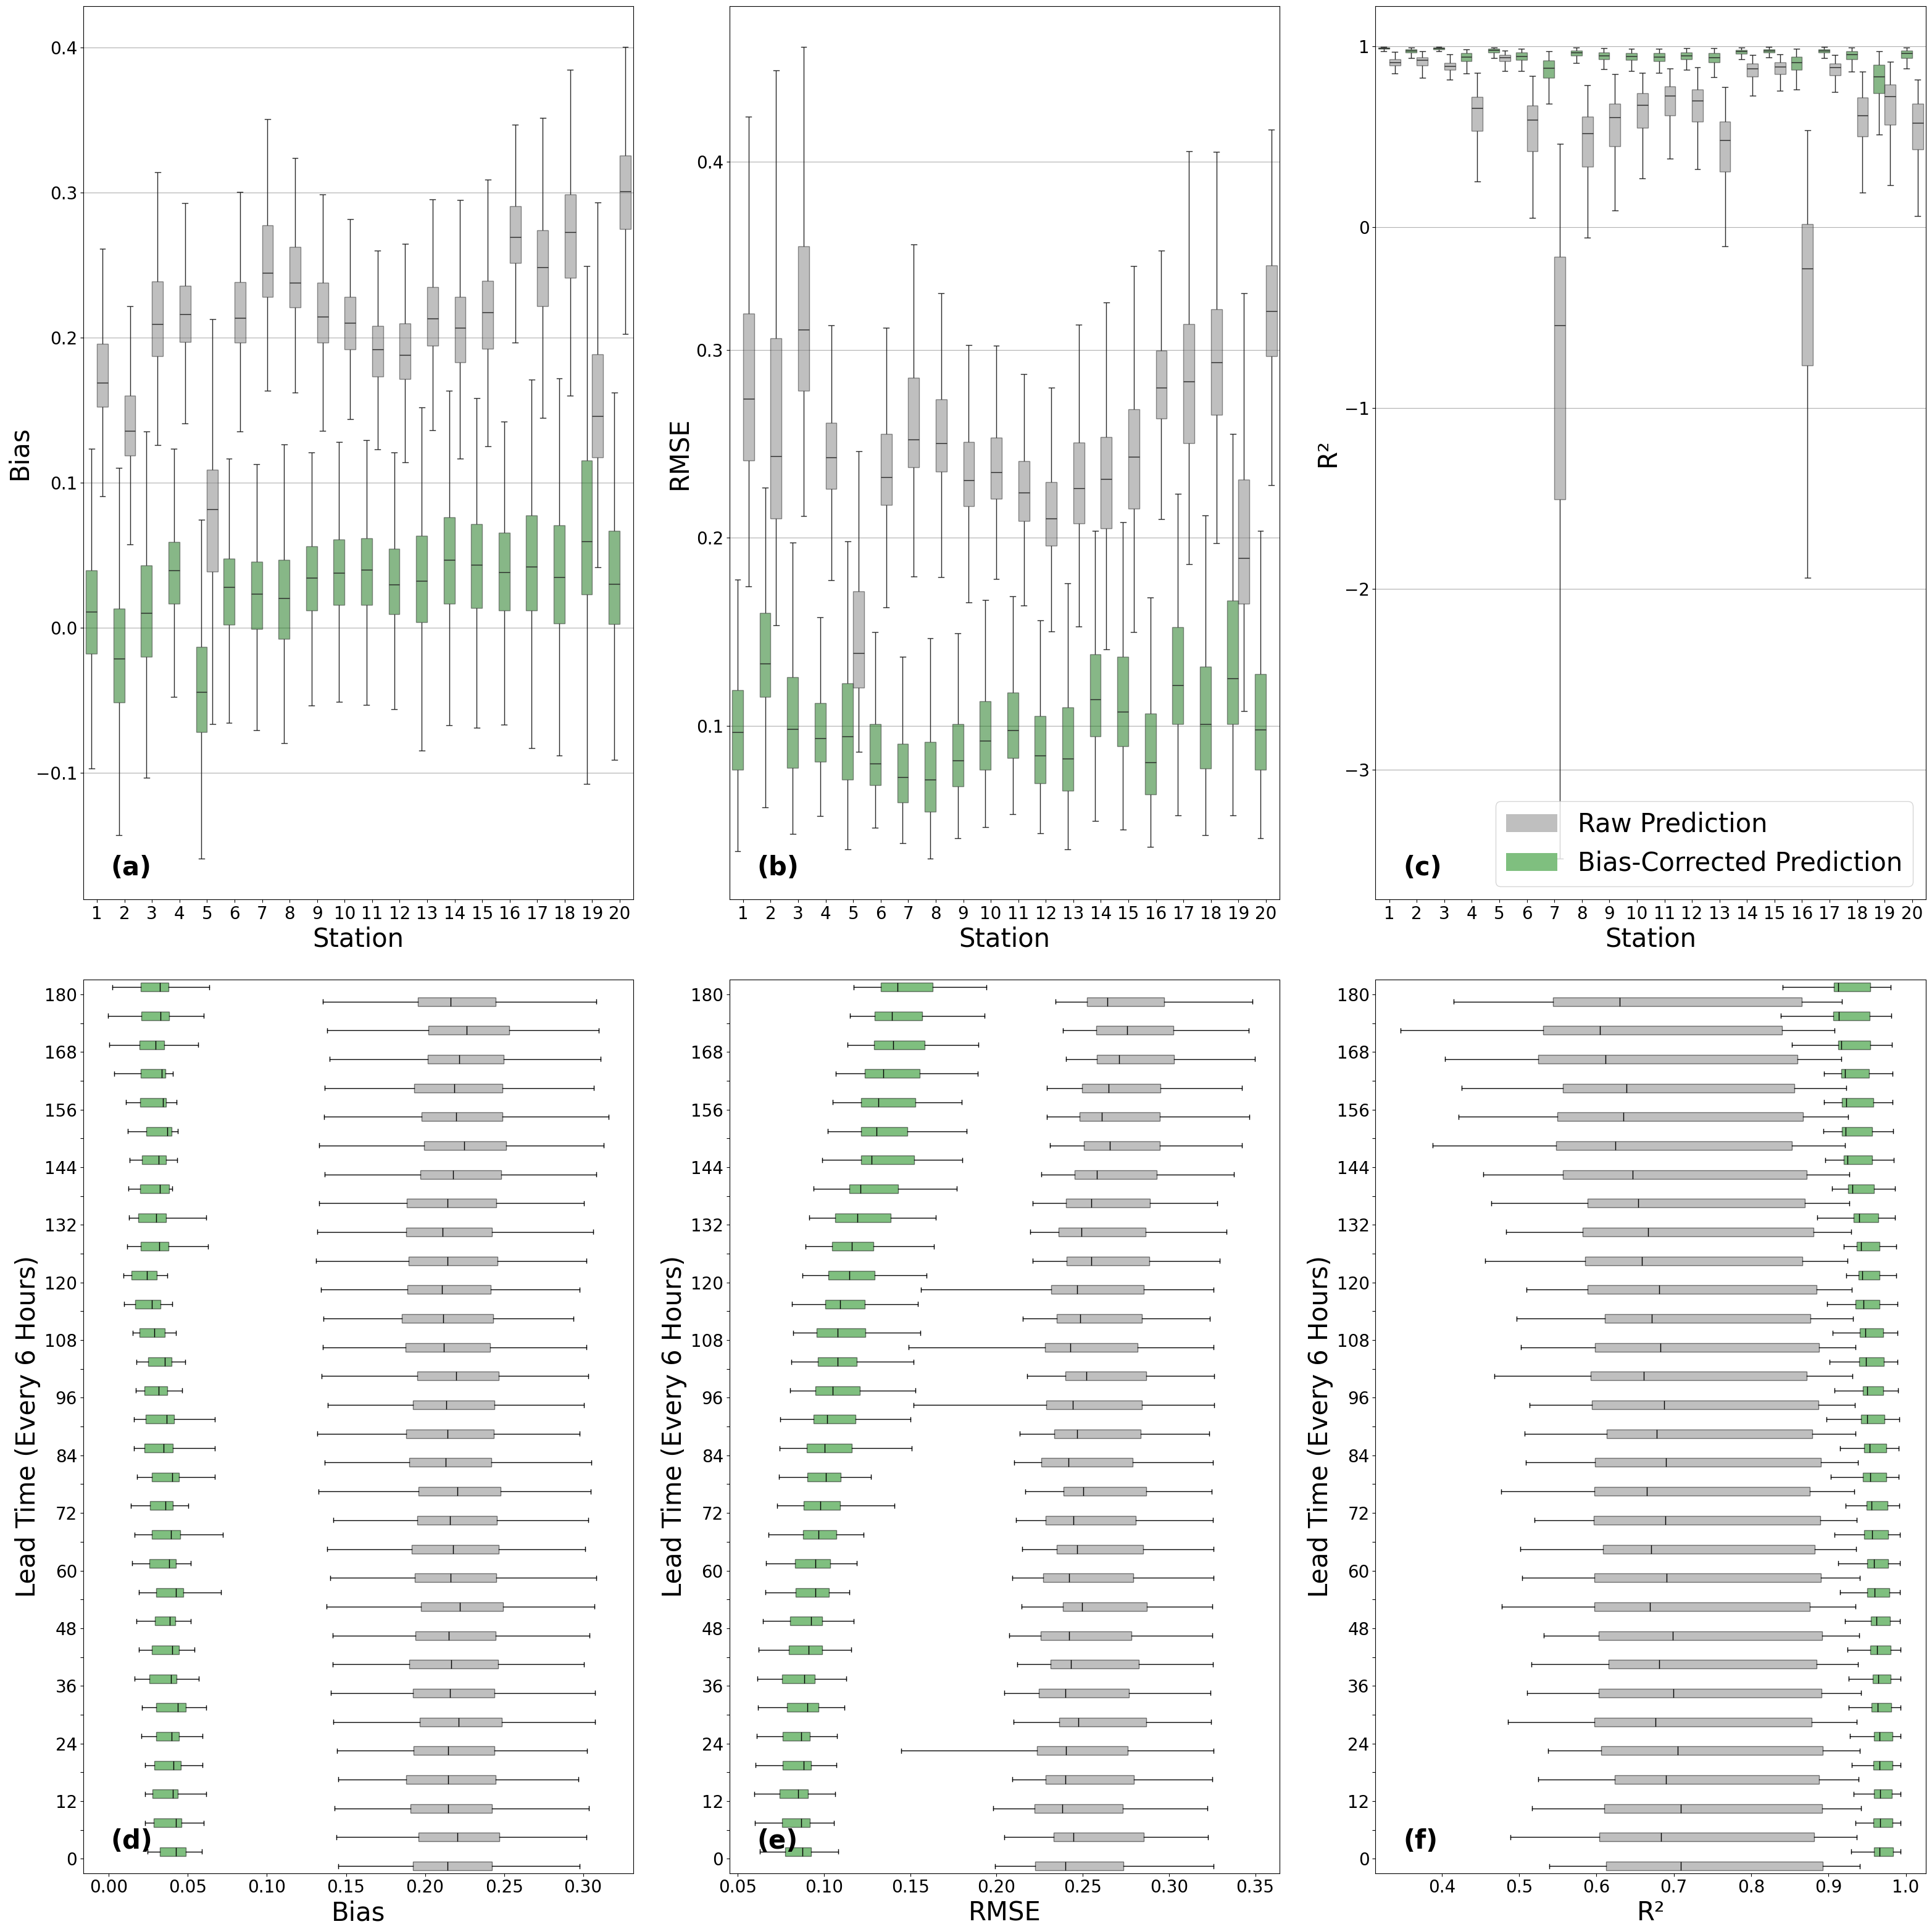

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# Ensure font settings
plt.rcParams.update({
    'font.size': 30,
    'axes.labelsize': 30,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'legend.fontsize': 30,
})

# Metrics
labels = ['a', 'b', 'c', 'd', 'e', 'f']
metrics = {
    'Bias': (bias_corrected_bias, raw_bias),
    'RMSE': (bias_corrected_rmse, raw_rmse),
    'R²': (bias_corrected_r2, raw_r2)
}

# Time indices
time_indices = range(0, 186, 6)

def rmse(predictions, true_values):
    return np.sqrt(np.mean((predictions - true_values) ** 2, axis=(0, 2)))

def r2_manual(predictions, true_values):
    ss_res = np.sum((true_values - predictions) ** 2, axis=(0, 2))
    ss_tot = np.sum((true_values - np.mean(true_values, axis=(0, 2), keepdims=True)) ** 2, axis=(0, 2))
    return 1 - ss_res / ss_tot

# Create a combined 2-row, 3-column figure
fig, axes = plt.subplots(2, 3, figsize=(32, 32))
axes = axes.flatten()

# --- Top Row: Station-wise boxplots ---
for i, (metric_name, (bias_corrected, raw)) in enumerate(metrics.items()):
    df_list = []
    for station in range(20):
        df = pd.DataFrame(np.column_stack((bias_corrected[:, station], raw[:, station])),
                          columns=['Bias Corrected Prediction', 'Raw Prediction'])
        df['Station'] = station + 1
        df_list.append(df)

    cdf = pd.concat(df_list)
    mdf = pd.melt(cdf, id_vars=['Station'], var_name='Prediction Type', value_name=metric_name)

    sns.boxplot(x="Station", y=metric_name, hue="Prediction Type", data=mdf,
                palette={'Bias Corrected Prediction': 'green', 'Raw Prediction': 'gray'},
                showfliers=False, boxprops=dict(alpha=0.5), ax=axes[i])
    
    axes[i].set_xlabel('Station')
    axes[i].set_ylabel(metric_name)
    axes[i].tick_params(axis='both')
    axes[i].text(0.05, 0.05, f'({labels[i]})', transform=axes[i].transAxes,
                 fontsize=30, fontweight='bold', va='top', ha='left')
    axes[i].get_legend().remove()

# --- Bottom Row: Lead-time-wise boxplots ---
bias_raw_samples = [np.mean(Test_r[:, :, i:i+6] - Test_t[:, :, i:i+6], axis=(0, 2)) for i in time_indices]
bias_corrected_samples = [np.mean(Test_p[:, :, i:i+6] - Test_t[:, :, i:i+6], axis=(0, 2)) for i in time_indices]
rmse_raw_samples = [rmse(Test_r[:, :, i:i+6], Test_t[:, :, i:i+6]) for i in time_indices]
rmse_corrected_samples = [rmse(Test_p[:, :, i:i+6], Test_t[:, :, i:i+6]) for i in time_indices]
r2_raw_samples = [r2_manual(Test_t[:, :, i:i+6], Test_r[:, :, i:i+6]) for i in time_indices]
r2_corrected_samples = [r2_manual(Test_t[:, :, i:i+6], Test_p[:, :, i:i+6]) for i in time_indices]

leadtime_data = [
    (bias_raw_samples, bias_corrected_samples, 'Bias'),
    (rmse_raw_samples, rmse_corrected_samples, 'RMSE'),
    (r2_raw_samples, r2_corrected_samples, 'R²')
]

for j, (raw_samp, corrected_samp, ylabel) in enumerate(leadtime_data, start=3):
    axes[j].boxplot(raw_samp, positions=np.arange(len(time_indices)) * 2, widths=0.6, patch_artist=True,
                    showfliers=False, boxprops=dict(facecolor='gray', alpha=0.5), medianprops=dict(color='black'), vert=False)
    axes[j].boxplot(corrected_samp, positions=np.arange(len(time_indices)) * 2 + 1, widths=0.6, patch_artist=True,
                    showfliers=False, boxprops=dict(facecolor='green', alpha=0.5), medianprops=dict(color='black'), vert=False)
    axes[j].set_yticks(np.arange(len(time_indices)) * 2 + 0.5)
    axes[j].set_yticklabels([f'{i}' for i in time_indices])
    axes[j].set_ylabel('Lead Time (Every 6 Hours)')
    axes[j].set_xlabel(ylabel)
    axes[j].text(0.05, 0.05, f'({labels[j]})', transform=axes[j].transAxes,
                 fontsize=30, fontweight='bold', va='top', ha='left')
    axes[j].grid()
    labels_y = axes[j].get_yticklabels()
    for k, label in enumerate(labels_y):
        if k % 2 != 0:
            label.set_visible(False)

# Add legend to bottom-right plot
axes[2].legend(handles=[
    Patch(facecolor='gray', alpha=0.5, label='Raw Prediction'),
    Patch(facecolor='green', alpha=0.5, label='Bias-Corrected Prediction')
], loc='lower right', fontsize=30)

plt.tight_layout()
plt.savefig("Figure5.png", dpi=600, bbox_inches='tight')
plt.show()


In [34]:
import pandas as pd
import numpy as np
from datetime import datetime

# Load CSV file
df = pd.read_csv('/lustre/code/BiasCorrection-Hackathon/BiasCorrection/Codes/Figures/all_stations_above_thresholds.csv')

# Parse the time column to datetime
df['time'] = pd.to_datetime(df['time']).dt.tz_localize(None)  # Remove timezone info


# Find unique station IDs and assign them indices (0 to 19)
unique_stations = df['Station'].unique()
station_map = {station: idx for idx, station in enumerate(unique_stations)}


# Separate data for the 99.9th and 99.99th percentiles
df_99_9 = df[df['Threshold'] == '99.9th']
df_99_99 = df[df['Threshold'] == '99.99th']


def get_matching_indices(time_value, Time_array):
    """
    Find all indices where the datetime in the 'Time' array matches the time_value.
    Returns a list of (row, column) indices where the time matches.
    """
    matching_indices = []  # List to store all matching indices
    
    # Iterate through each row and column in the 2D Time array to find the matching time
    for i in range(Time_array.shape[0]):  # Iterate over the rows
        for j in range(Time_array.shape[1]):  # Iterate over the columns
            if Time_array[i, j] == time_value:
                matching_indices.append((i, j))  # Store the (row, column) index
    return matching_indices  # Return the list of matching indices

def extract_data_for_station(df_filtered, Time, Test_P, Tests_r, Test_t):
    extracted_data = {}
    
    for index, row in df_filtered.iterrows():
        #print(index)
        time_value = row['time']
        station_id = row['Station']  # Station ID

        # Map the station_id to its corresponding index
        station_index = station_map.get(station_id)
        
        # Find all (row, column) indices in Time where the datetime matches
        matching_indices = get_matching_indices(time_value, Time)
        
        if matching_indices:
            # Extract data for each matching index
            for row_idx, col_idx in matching_indices:
                # Get data from Test_P, Tests_r, Test_t for the matched index and station
                if station_id not in extracted_data:
                    extracted_data[station_id] = []
                
                extracted_data[station_id].append({
                    'Cycle': row_idx,
                    'Time': Time[row_idx, col_idx],
                    'Test_P': Test_P[row_idx, station_index, col_idx],  # Use station_index for correct station
                    'Tests_r': Tests_r[row_idx, station_index, col_idx],
                    'Test_t': Test_t[row_idx, station_index, col_idx]
                })
    
    return extracted_data

# Extract data for 99.9th and 99.99th percentiles separately
extracted_data_99_9 = extract_data_for_station(df_99_9, Time, Test_p, Test_r, Test_t)
extracted_data_99_99 = extract_data_for_station(df_99_99, Time, Test_p, Test_r, Test_t)

# The extracted data is stored in extracted_data_99_9 and extracted_data_99_99


In [35]:
# Step 1: Extract (station, cycle) pairs that are in 99.99th
cycles_99_99 = set(
    (station, entry['Cycle'])
    for station, entries in extracted_data_99_99.items()
    for entry in entries
)

# Step 2: Filter extracted_data_99_9 to remove those cycles
filtered_extracted_data_99_9 = {}

for station, entries in extracted_data_99_9.items():
    filtered_entries = [
        entry for entry in entries
        if (station, entry['Cycle']) not in cycles_99_99
    ]
    if filtered_entries:
        filtered_extracted_data_99_9[station] = filtered_entries

# `filtered_extracted_data_99_9` now excludes any cycle that is also in 99.99th


In [36]:
all_test_p = []
all_test_t = []
all_test_r = []
    
# Iterate over all stations in the data
for station_id, records in filtered_extracted_data_99_9.items():
        for record in records:
            all_test_p.append(record['Test_P'])  # Add Test_P to the list
            all_test_t.append(record['Test_t'])  # Add Test_t to the list
            all_test_r.append(record['Tests_r'])  # Add Test_t to the list
# Convert the lists to numpy arrays for correlation calculation
test_p_99_9 = np.array(all_test_p)
test_t_99_9 = np.array(all_test_t)
test_r_99_9 = np.array(all_test_r)

test_p_99_9.shape, test_t_99_9.shape, test_r_99_9.shape

((4928,), (4928,), (4928,))

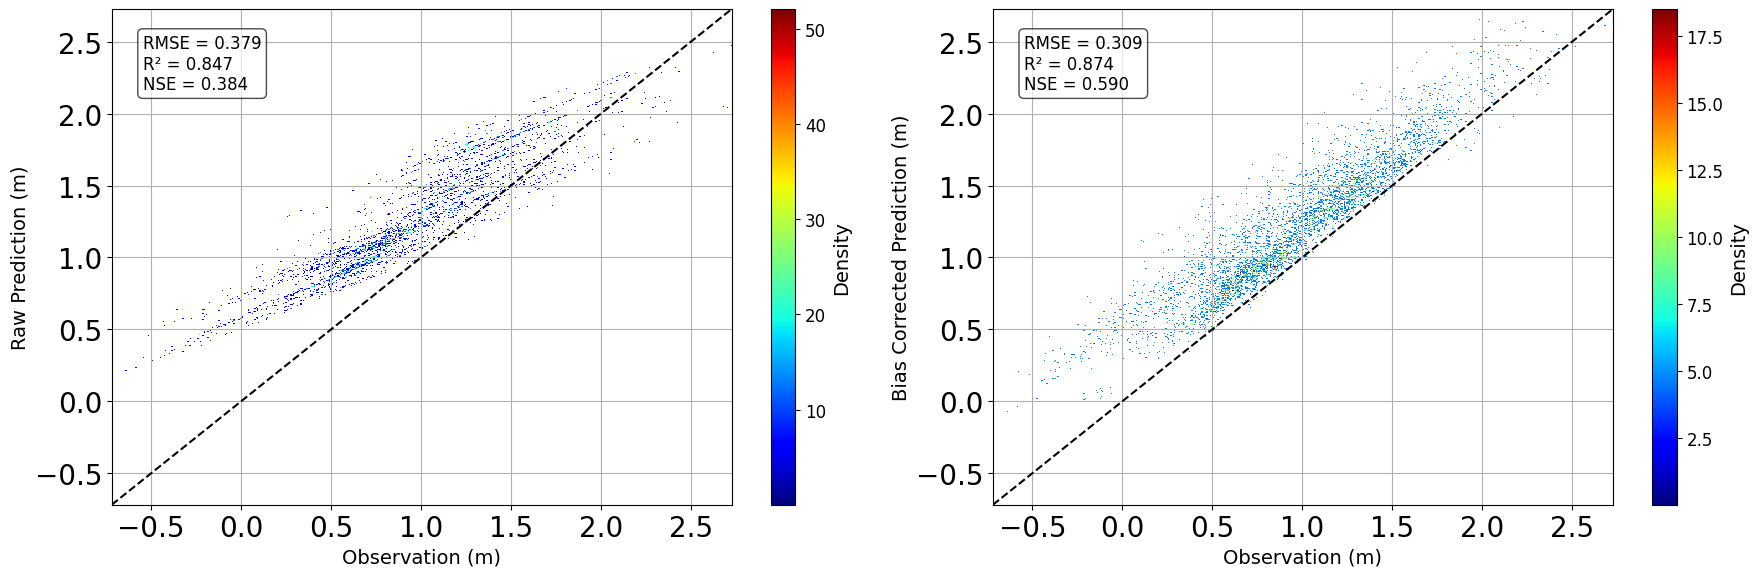

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # 1 row, 2 columns
# Function to calculate KGE

# Set global font family and size
plt.rcParams.update({
    'font.size': 14,             # Default font size for text elements
    'axes.labelsize': 14,        # Axis label font size
    'xtick.labelsize': 12,       # Font size for x-tick labels
    'ytick.labelsize': 12,       # Font size for y-tick labels
    'legend.fontsize': 12,       # Font size for legend
    'figure.figsize': (16, 6),   # Figure size
    'axes.titlepad': 15,         # Padding for titles
    'axes.grid': True            # Enable grid by default
})


# First subplot (on the right)
# First plot: 2D Histogram (Bias Corrected Prediction)
a = test_t_99_9 
b = test_r_99_9

# Plot the line of perfect agreement (y=x)
axes[0].plot([a.min(), a.max()], [a.min(), a.max()], 'k--')

# Create a colormap and set the color for empty areas (value=0) to white
cmap = plt.cm.jet
cmap.set_under('white')

# Plot the 2D histogram
h2 = axes[0].hist2d(a, b, bins=500, cmap=cmap, density=True, vmin=0.01)

# Add color bar to show the density scale
fig.colorbar(h2[3], ax=axes[0], label='Density')

# Set the x and y limits to match the range of a
axes[0].set_xlim(a.min(), a.max())
axes[0].set_ylim(a.min(), a.max())

correlation = np.corrcoef(a, b)[0, 1]**2
rmse = np.sqrt(np.mean((b - a)**2))

nse = he.evaluator(he.nse, b, a)

# Add statistics in a text box at the top-left corner of the first subplot
stats_text = f"RMSE = {rmse:.3f}\nR² = {correlation:.3f}\nNSE = {nse[0]:.3f}"
axes[0].text(0.05, 0.95, stats_text, transform=axes[0].transAxes, fontsize=12, verticalalignment='top',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.3'))

axes[0].set_ylabel('Raw Prediction (m)', fontsize=14)
axes[0].set_xlabel('Observation (m)', fontsize=14)


# Second plot: 2D Histogram (Bias Corrected Prediction)
a = test_t_99_9
b = test_p_99_9

# Plot the line of perfect agreement (y=x)
axes[1].plot([a.min(), a.max()], [a.min(), a.max()], 'k--')

# Create a colormap and set the color for empty areas (value=0) to white
cmap = plt.cm.jet
cmap.set_under('white')

# Plot the 2D histogram
h = axes[1].hist2d(a, b, bins=500, cmap=cmap, density=True, vmin=0.01)

# Add color bar to show the density scale
fig.colorbar(h[3], ax=axes[1], label='Density')

# Set the x and y limits to match the range of a
axes[1].set_xlim(a.min(), a.max())
axes[1].set_ylim(a.min(), a.max())

correlation = np.corrcoef(a, b)[0, 1]**2
rmse = np.sqrt(np.mean((b - a)**2))

nse = he.evaluator(he.nse, b, a)

# Add statistics in a text box at the top-left corner of the first subplot
stats_text = f"RMSE = {rmse:.3f}\nR² = {correlation:.3f}\nNSE = {nse[0]:.3f}"
axes[1].text(0.05, 0.95, stats_text, transform=axes[1].transAxes, fontsize=12, verticalalignment='top',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.3'))


axes[1].set_ylabel('Bias Corrected Prediction (m)', fontsize=14)
axes[1].set_xlabel('Observation (m)', fontsize=14)




# Adjust layout for better spacing between subplots
plt.tight_layout()

# Save the plot as a PNG file with 300 DPI
plt.savefig('plot_extreme.png', dpi=300)

# Show the plot
plt.show()


In [38]:
all_test_p = []
all_test_t = []
all_test_r = []
    
# Iterate over all stations in the data
for station_id, records in extracted_data_99_99.items():
        for record in records:
            all_test_p.append(record['Test_P'])  # Add Test_P to the list
            all_test_t.append(record['Test_t'])  # Add Test_t to the list
            all_test_r.append(record['Tests_r'])  # Add Test_t to the list
# Convert the lists to numpy arrays for correlation calculation
test_p_99_99 = np.array(all_test_p)
test_t_99_99 = np.array(all_test_t)
test_r_99_99 = np.array(all_test_r)

test_p_99_99.shape, test_r_99_99.shape, test_t_99_99.shape

((932,), (932,), (932,))

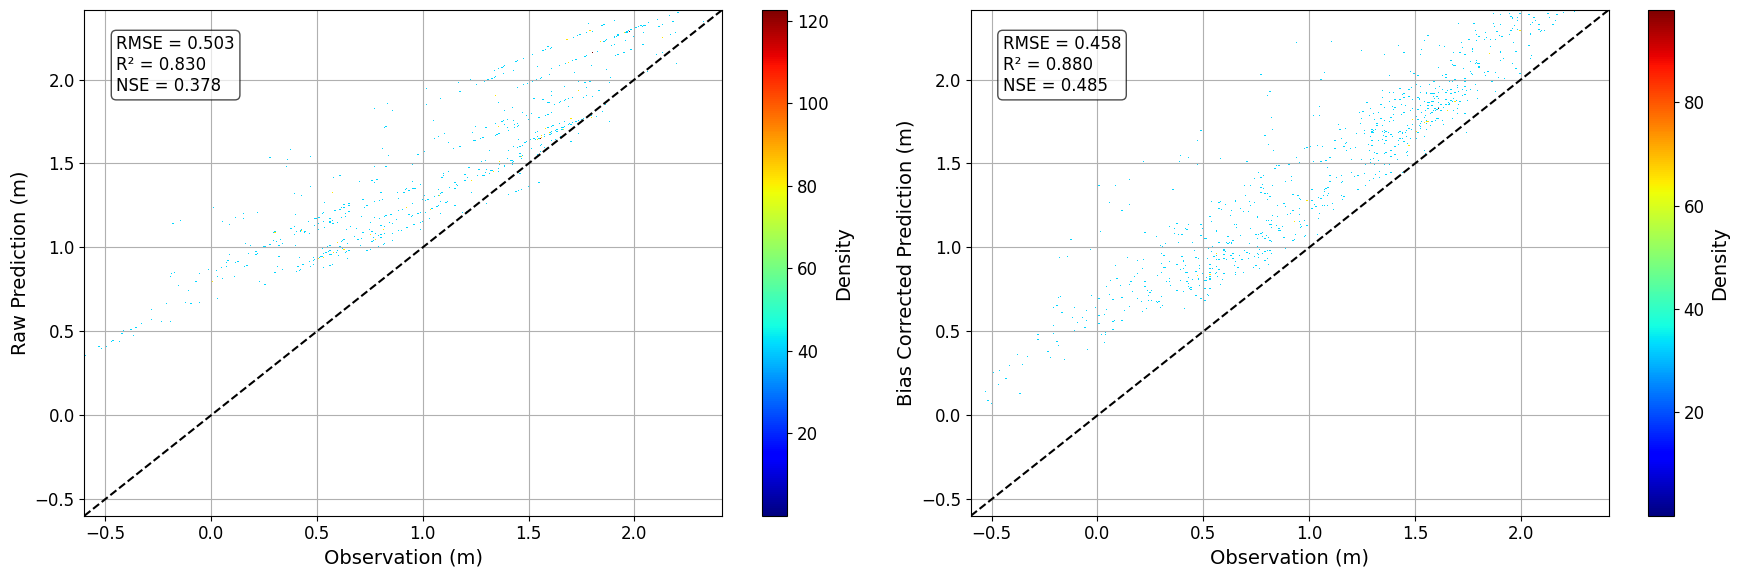

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # 1 row, 2 columns
# Function to calculate KGE

# Set global font family and size
plt.rcParams.update({
    'font.size': 14,             # Default font size for text elements
    'axes.labelsize': 14,        # Axis label font size
    'xtick.labelsize': 12,       # Font size for x-tick labels
    'ytick.labelsize': 12,       # Font size for y-tick labels
    'legend.fontsize': 12,       # Font size for legend
    'figure.figsize': (16, 6),   # Figure size
    'axes.titlepad': 15,         # Padding for titles
    'axes.grid': True            # Enable grid by default
})


# First subplot (on the right)
# First plot: 2D Histogram (Bias Corrected Prediction)
a = np.array(all_test_t)
b = np.array(all_test_r)

# Plot the line of perfect agreement (y=x)
axes[0].plot([a.min(), a.max()], [a.min(), a.max()], 'k--')

# Create a colormap and set the color for empty areas (value=0) to white
cmap = plt.cm.jet
cmap.set_under('white')

# Plot the 2D histogram
h2 = axes[0].hist2d(a, b, bins=500, cmap=cmap, density=True, vmin=0.01)

# Add color bar to show the density scale
fig.colorbar(h2[3], ax=axes[0], label='Density')

# Set the x and y limits to match the range of a
axes[0].set_xlim(a.min(), a.max())
axes[0].set_ylim(a.min(), a.max())

correlation = np.corrcoef(a, b)[0, 1]**2
rmse = np.sqrt(np.mean((b - a)**2))

nse = he.evaluator(he.nse, b, a)

# Add statistics in a text box at the top-left corner of the first subplot
stats_text = f"RMSE = {rmse:.3f}\nR² = {correlation:.3f}\nNSE = {nse[0]:.3f}"
axes[0].text(0.05, 0.95, stats_text, transform=axes[0].transAxes, fontsize=12, verticalalignment='top',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.3'))

axes[0].set_ylabel('Raw Prediction (m)', fontsize=14)
axes[0].set_xlabel('Observation (m)', fontsize=14)


# Second plot: 2D Histogram (Bias Corrected Prediction)
a = np.array(all_test_t)
b = np.array(all_test_p)

# Plot the line of perfect agreement (y=x)
axes[1].plot([a.min(), a.max()], [a.min(), a.max()], 'k--')

# Create a colormap and set the color for empty areas (value=0) to white
cmap = plt.cm.jet
cmap.set_under('white')

# Plot the 2D histogram
h = axes[1].hist2d(a, b, bins=500, cmap=cmap, density=True, vmin=0.01)

# Add color bar to show the density scale
fig.colorbar(h[3], ax=axes[1], label='Density')

# Set the x and y limits to match the range of a
axes[1].set_xlim(a.min(), a.max())
axes[1].set_ylim(a.min(), a.max())

correlation = np.corrcoef(a, b)[0, 1]**2
rmse = np.sqrt(np.mean((b - a)**2))

nse = he.evaluator(he.nse, b, a)

# Add statistics in a text box at the top-left corner of the first subplot
stats_text = f"RMSE = {rmse:.3f}\nR² = {correlation:.3f}\nNSE = {nse[0]:.3f}"
axes[1].text(0.05, 0.95, stats_text, transform=axes[1].transAxes, fontsize=12, verticalalignment='top',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.3'))


axes[1].set_ylabel('Bias Corrected Prediction (m)', fontsize=14)
axes[1].set_xlabel('Observation (m)', fontsize=14)




# Adjust layout for better spacing between subplots
plt.tight_layout()

# Save the plot as a PNG file with 300 DPI
plt.savefig('plot_extreme.png', dpi=300)

# Show the plot
plt.show()


In [40]:
import pandas as pd
import numpy as np

# Load CSV file
df = pd.read_csv('/lustre/code/BiasCorrection-Hackathon/BiasCorrection/Codes/Figures/all_stations_above_thresholds.csv')

# Parse the time column to datetime
df['time'] = pd.to_datetime(df['time']).dt.tz_localize(None)  # Remove timezone info

# Find unique station IDs and assign them indices (0 to 19)
unique_stations = df['Station'].unique()
station_map = {station: idx for idx, station in enumerate(unique_stations)}

# Separate data for the 99.9th and 99.99th percentiles
df_99_9 = df[df['Threshold'] == '99.9th']
df_99_99 = df[df['Threshold'] == '99.99th']

def get_matching_indices(time_value, Time_array):
    """
    Find all indices where the datetime in the 'Time' array matches the time_value.
    Returns a list of (row, column) indices where the time matches.
    """
    matching_indices = []
    for i in range(Time_array.shape[0]):  # Iterate over the rows
        for j in range(Time_array.shape[1]):  # Iterate over the columns
            if Time_array[i, j] == time_value:
                matching_indices.append((i, j))  # Store the (row, column) index
    return matching_indices

def remove_matched_entries(df_filtered, Time, Test_P, Test_r, Test_t):
    """
    Remove entries from Test_P, Test_r, and Test_t by filtering them out.
    """
    # Create a mask of valid (unmatched) entries
    mask = np.ones_like(Test_P, dtype=bool)

    for index, row in df_filtered.iterrows():
        #print(f"Processing index {index}")  # Debugging
        
        time_value = row['time']
        station_id = row['Station']  # Station ID

        # Map the station_id to its corresponding index
        station_index = station_map.get(station_id)

        # Find all matching indices in Time where the datetime matches
        matching_indices = get_matching_indices(time_value, Time)

        if matching_indices:
            for row_idx, col_idx in matching_indices:
                # Instead of removing, set the values to NaN
                Test_P[row_idx, station_index, col_idx] = np.nan
                Test_r[row_idx, station_index, col_idx] = np.nan
                Test_t[row_idx, station_index, col_idx] = np.nan

    return Test_P, Test_r, Test_t

# Apply the function to remove matched data
Test_p1, Test_r1, Test_t1 = remove_matched_entries(df_99_9, Time, Test_p, Test_r, Test_t)
Test_p2, Test_r2, Test_t2 = remove_matched_entries(df_99_99, Time, Test_p1, Test_r1, Test_t1)


In [41]:
general_Test_t = Test_t2.reshape(-1)
general_Test_t = general_Test_t[~np.isnan(general_Test_t)]

general_Test_r = Test_r2.reshape(-1)
general_Test_r = general_Test_r[~np.isnan(general_Test_r)]

general_Test_p = Test_p2.reshape(-1)
general_Test_p = general_Test_p[~np.isnan(general_Test_p)]


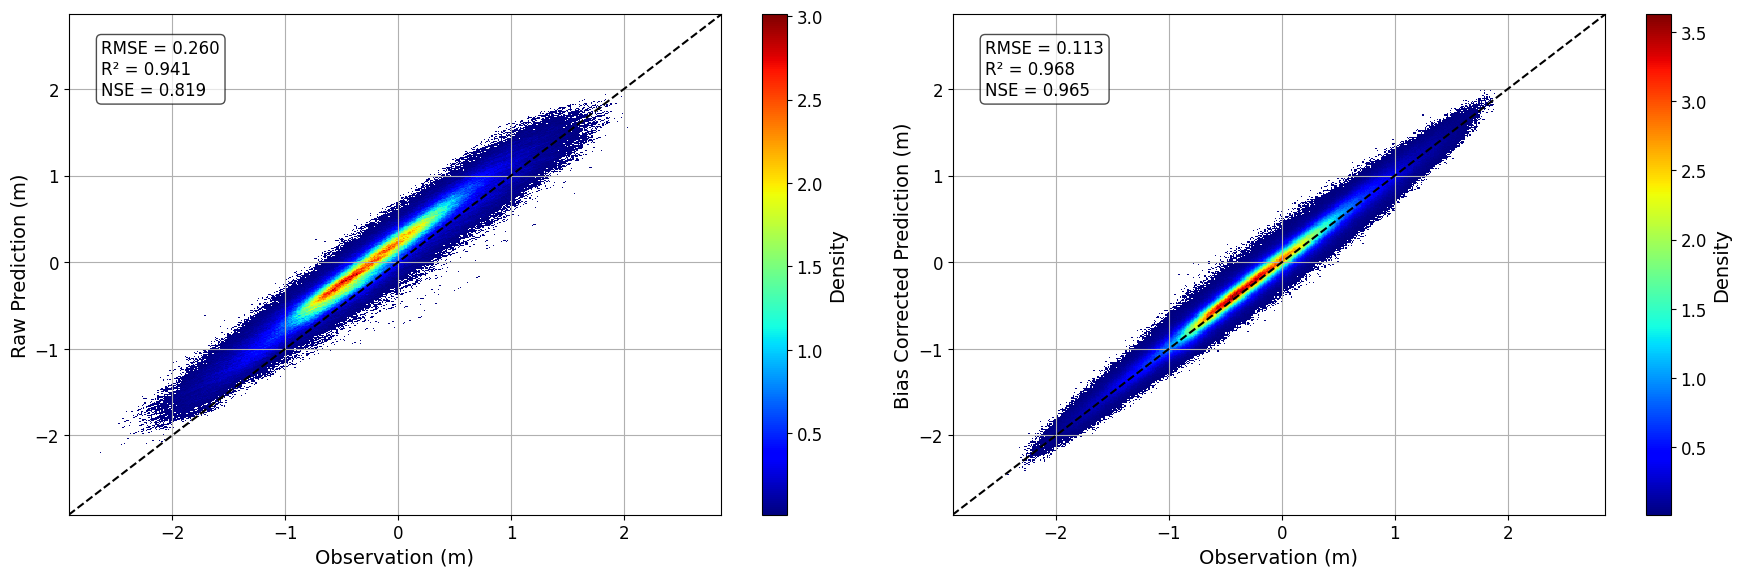

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # 1 row, 2 columns
# Function to calculate KGE

# Set global font family and size
plt.rcParams.update({
    'font.size': 14,             # Default font size for text elements
    'axes.labelsize': 14,        # Axis label font size
    'xtick.labelsize': 12,       # Font size for x-tick labels
    'ytick.labelsize': 12,       # Font size for y-tick labels
    'legend.fontsize': 12,       # Font size for legend
    'figure.figsize': (16, 6),   # Figure size
    'axes.titlepad': 15,         # Padding for titles
    'axes.grid': True            # Enable grid by default
})


# First subplot (on the right)
# First plot: 2D Histogram (Bias Corrected Prediction)
a = general_Test_t
b = general_Test_r

# Plot the line of perfect agreement (y=x)
axes[0].plot([a.min(), a.max()], [a.min(), a.max()], 'k--')

# Create a colormap and set the color for empty areas (value=0) to white
cmap = plt.cm.jet
cmap.set_under('white')

# Plot the 2D histogram
h2 = axes[0].hist2d(a, b, bins=500, cmap=cmap, density=True, vmin=0.01)

# Add color bar to show the density scale
fig.colorbar(h2[3], ax=axes[0], label='Density')

# Set the x and y limits to match the range of a
axes[0].set_xlim(a.min(), a.max())
axes[0].set_ylim(a.min(), a.max())

correlation = np.corrcoef(a, b)[0, 1]**2
rmse = np.sqrt(np.mean((b - a)**2))

nse = he.evaluator(he.nse, b, a)

# Add statistics in a text box at the top-left corner of the first subplot
stats_text = f"RMSE = {rmse:.3f}\nR² = {correlation:.3f}\nNSE = {nse[0]:.3f}"
axes[0].text(0.05, 0.95, stats_text, transform=axes[0].transAxes, fontsize=12, verticalalignment='top',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.3'))

axes[0].set_ylabel('Raw Prediction (m)', fontsize=14)
axes[0].set_xlabel('Observation (m)', fontsize=14)


# Second plot: 2D Histogram (Bias Corrected Prediction)
a = general_Test_t
b = general_Test_p

# Plot the line of perfect agreement (y=x)
axes[1].plot([a.min(), a.max()], [a.min(), a.max()], 'k--')

# Create a colormap and set the color for empty areas (value=0) to white
cmap = plt.cm.jet
cmap.set_under('white')

# Plot the 2D histogram
h = axes[1].hist2d(a, b, bins=500, cmap=cmap, density=True, vmin=0.01)

# Add color bar to show the density scale
fig.colorbar(h[3], ax=axes[1], label='Density')

# Set the x and y limits to match the range of a
axes[1].set_xlim(a.min(), a.max())
axes[1].set_ylim(a.min(), a.max())

correlation = np.corrcoef(a, b)[0, 1]**2
rmse = np.sqrt(np.mean((b - a)**2))

nse = he.evaluator(he.nse, b, a)

# Add statistics in a text box at the top-left corner of the first subplot
stats_text = f"RMSE = {rmse:.3f}\nR² = {correlation:.3f}\nNSE = {nse[0]:.3f}"
axes[1].text(0.05, 0.95, stats_text, transform=axes[1].transAxes, fontsize=12, verticalalignment='top',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.3'))


axes[1].set_ylabel('Bias Corrected Prediction (m)', fontsize=14)
axes[1].set_xlabel('Observation (m)', fontsize=14)




# Adjust layout for better spacing between subplots
plt.tight_layout()

# Save the plot as a PNG file with 300 DPI
plt.savefig('plot_extreme.png', dpi=300)

# Show the plot
plt.show()


## Tylor Diagrom

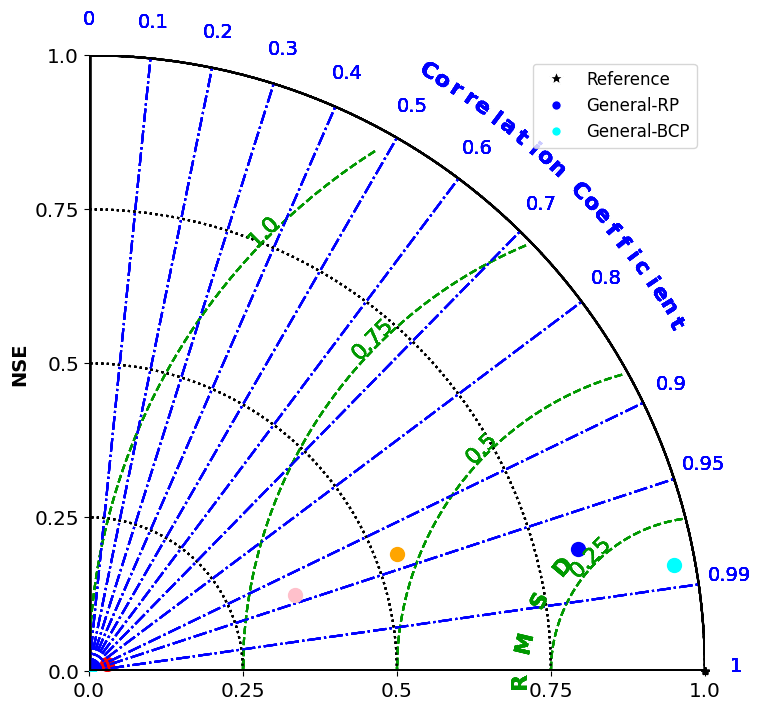

<Figure size 1600x600 with 0 Axes>

In [43]:
import skill_metrics as sm
import numpy as np

nse=np.array([he.evaluator(he.nse, general_Test_t, general_Test_t)[0],he.evaluator(he.nse, general_Test_r, general_Test_t)[0],he.evaluator(he.nse, general_Test_p, general_Test_t)[0],
              he.evaluator(he.nse, test_t_99_9, test_r_99_9)[0],he.evaluator(he.nse, test_t_99_9, test_p_99_9)[0],
              he.evaluator(he.nse, test_t_99_99, test_r_99_99)[0],he.evaluator(he.nse, test_t_99_99, test_p_99_99)[0]])

nse[nse<0]=0
rmse=np.array([0,np.sqrt(np.mean((general_Test_r - general_Test_t)**2)),np.sqrt(np.mean((general_Test_p - general_Test_t)**2)),
              np.sqrt(np.mean((test_r_99_9 - test_t_99_9)**2)),np.sqrt(np.mean((test_p_99_9 - test_t_99_9)**2)),
              np.sqrt(np.mean((test_r_99_99 - test_t_99_99)**2)),np.sqrt(np.mean((test_p_99_99 - test_t_99_99)**2))])
corr=np.array([1,np.corrcoef(general_Test_t, general_Test_r)[0, 1],np.corrcoef(general_Test_t, general_Test_p)[0, 1],
               np.corrcoef(test_t_99_9, test_r_99_9)[0, 1],np.corrcoef(test_t_99_9, test_p_99_9)[0, 1],
               np.corrcoef(test_t_99_99, test_r_99_99)[0, 1],np.corrcoef(test_t_99_99, test_p_99_99)[0, 1]            
              ])


# Create the Taylor diagram
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot()

sm.taylor_diagram(np.array([nse[0],nse[1]]), np.array([rmse[0],rmse[1]]),np.array([corr[0],corr[1]]), markerSymbol='o', markerColor='blue', colOBS='k', markerobs='*')
sm.taylor_diagram(np.array([nse[0],nse[2]]), np.array([rmse[0],rmse[2]]),np.array([corr[0],corr[2]]), markerSymbol='o',  markerColor='cyan', colOBS='k', markerobs='*')
sm.taylor_diagram(np.array([nse[0],nse[3]]), np.array([rmse[0],rmse[3]]),np.array([corr[0],corr[3]]), markerSymbol='o',  markerColor='red', colOBS='k', markerobs='*')
sm.taylor_diagram(np.array([nse[0],nse[4]]), np.array([rmse[0],rmse[4]]),np.array([corr[0],corr[4]]), markerSymbol='o',  markerColor='orange', colOBS='k', markerobs='*')
sm.taylor_diagram(np.array([nse[0],nse[5]]), np.array([rmse[0],rmse[5]]),np.array([corr[0],corr[5]]), markerSymbol='o',  markerColor='cyan', colOBS='k', markerobs='*')
sm.taylor_diagram(np.array([nse[0],nse[6]]), np.array([rmse[0],rmse[6]]),np.array([corr[0],corr[6]]), markerSymbol='o',  markerColor='pink', colOBS='k', markerobs='*')



# Set the y-axis label to indicate Normalized Standard Deviation
ax.set_ylabel('NSE', fontsize=14)


# Adding the legend
# Define legend labels for each marker
# Manually create legend entries with markers
from matplotlib.lines import Line2D

legend_markers = [Line2D([0], [0], marker='*', color='w', markerfacecolor='k', markersize=10),  # Reference marker
                  Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=7),  
                  Line2D([0], [0], marker='o', color='w', markerfacecolor='cyan', markersize=7)]

# Define legend labels for each marker
labels = ['Reference', 'General-RP', 'General-BCP', ]


# Create the legend with the markers and labels
ax.legend(legend_markers, labels, loc='upper right', fontsize=12)
ax.grid(False)
# Show the plot
plt.show()
plt.savefig('tylor.png', dpi=300)


In [44]:
station_data_p = []  # List to store (ID, value) pairs
station_data_t = []  # List to store (ID, value) pairs
station_data_r = []  # List to store (ID, value) pairs

# Iterate over all stations in the data
for station_id, records in extracted_data_99_9.items():
    for record in records:
        station_data_p.append([station_id, record['Test_P']])  # Store (ID, Test_P)
        station_data_t.append([station_id, record['Test_t']])  # Store (ID, Test_P)
        station_data_r.append([station_id, record['Tests_r']])  # Store (ID, Test_P)

# Convert to a NumPy 2D array
data_array_p_9 = np.array(station_data_p)
data_array_t_9 = np.array(station_data_t)
data_array_r_9 = np.array(station_data_r)

# Check the shape to confirm it's structured correctly
data_array_p_9.shape, data_array_t_9.shape, data_array_r_9.shape,

((7753, 2), (7753, 2), (7753, 2))

In [45]:
station_data_p = []  # List to store (ID, value) pairs
station_data_t = []  # List to store (ID, value) pairs
station_data_r = []  # List to store (ID, value) pairs

# Iterate over all stations in the data
for station_id, records in extracted_data_99_99.items():
    for record in records:
        station_data_p.append([station_id, record['Test_P']])  # Store (ID, Test_P)
        station_data_t.append([station_id, record['Test_t']])  # Store (ID, Test_P)
        station_data_r.append([station_id, record['Tests_r']])  # Store (ID, Test_P)

# Convert to a NumPy 2D array
data_array_p_99 = np.array(station_data_p)
data_array_t_99 = np.array(station_data_t)
data_array_r_99 = np.array(station_data_r)

# Check the shape to confirm it's structured correctly
data_array_p_99.shape, data_array_t_99.shape, data_array_r_99.shape,

((932, 2), (932, 2), (932, 2))

In [46]:
data_array_t_g = Test_t2[~np.isnan(Test_t2)]
data_array_p_g = Test_p2[~np.isnan(Test_p2)]
data_array_r_g = Test_r2[~np.isnan(Test_r2)]
data_array_t_g.shape

(3068687,)

## 45 degree plot

In [58]:
# Dictionary to store metrics for each station
rmse_per_station_p_99 = {}
rmse_per_station_r_99 = {}
rmse_per_station_p_9 = {}
rmse_per_station_r_9 = {}
rmse_per_station_p_g = {}
rmse_per_station_r_g = {}

corr_per_station_p_99 = {}
corr_per_station_r_99 = {}
corr_per_station_p_9 = {}
corr_per_station_r_9 = {}
corr_per_station_p_g = {}
corr_per_station_r_g = {}


max_per_station_p_99 = {}
max_per_station_r_99 = {}
max_per_station_p_9 = {}
max_per_station_r_9 = {}
max_per_station_p_g = {}
max_per_station_r_g = {}



# Compute standard deviation for each station
for i, station in enumerate(station_ids):
    station_values_p = data_array_p_99[data_array_p_99[:, 0] == station, 1]  # Extract values for the station
    station_values_t = data_array_t_99[data_array_t_99[:, 0] == station, 1]  # Extract values for the station
    station_values_r = data_array_r_99[data_array_r_99[:, 0] == station, 1]  # Extract values for the station
    rmse_per_station_r_99[station] = np.sqrt(np.mean((station_values_r - station_values_t)**2))
    rmse_per_station_p_99[station] = np.sqrt(np.mean((station_values_p - station_values_t)**2))
    corr_per_station_p_99[station] = np.corrcoef(station_values_t, station_values_r)[0, 1]
    corr_per_station_r_99[station] = np.corrcoef(station_values_t, station_values_p)[0, 1]
    max_per_station_p_99[station] = np.max(np.abs(station_values_p-station_values_t))
    max_per_station_r_99[station] = np.max(np.abs(station_values_r-station_values_t))

    station_values_p = data_array_p_9[data_array_p_9[:, 0] == station, 1]  # Extract values for the station
    station_values_t = data_array_t_9[data_array_t_9[:, 0] == station, 1]  # Extract values for the station
    station_values_r = data_array_r_9[data_array_r_9[:, 0] == station, 1]  # Extract values for the station
    rmse_per_station_r_9[station] = np.sqrt(np.mean((station_values_r - station_values_t)**2))
    rmse_per_station_p_9[station] = np.sqrt(np.mean((station_values_p - station_values_t)**2))
    corr_per_station_p_9[station] = np.corrcoef(station_values_t, station_values_r)[0, 1]
    corr_per_station_r_9[station] = np.corrcoef(station_values_t, station_values_p)[0, 1]
    max_per_station_p_9[station] = np.max(np.abs(station_values_p-station_values_t))
    max_per_station_r_9[station] = np.max(np.abs(station_values_r-station_values_t))  

    Test_r2_station = Test_r2[:,i,:]
    Test_r_station = Test_r2_station[~np.isnan(Test_r2_station)]
    Test_p2_station = Test_p2[:,i,:]
    Test_p_station = Test_p2_station[~np.isnan(Test_p2_station)]
    Test_t2_station = Test_t2[:,i,:]
    Test_t_station = Test_t2_station[~np.isnan(Test_t2_station)]    
    rmse_per_station_r_g[station] = np.sqrt(np.mean((Test_r_station - Test_t_station)**2))
    rmse_per_station_p_g[station] = np.sqrt(np.mean((Test_p_station - Test_t_station)**2))
    corr_per_station_p_g[station] = np.corrcoef(Test_t_station, Test_p_station)[0, 1]
    corr_per_station_r_g[station] = np.corrcoef(Test_t_station, Test_r_station)[0, 1]
    max_per_station_p_g[station] = np.max(np.abs(Test_p_station-Test_t_station))
    max_per_station_r_g[station] = np.max(np.abs(Test_r_station-Test_t_station))



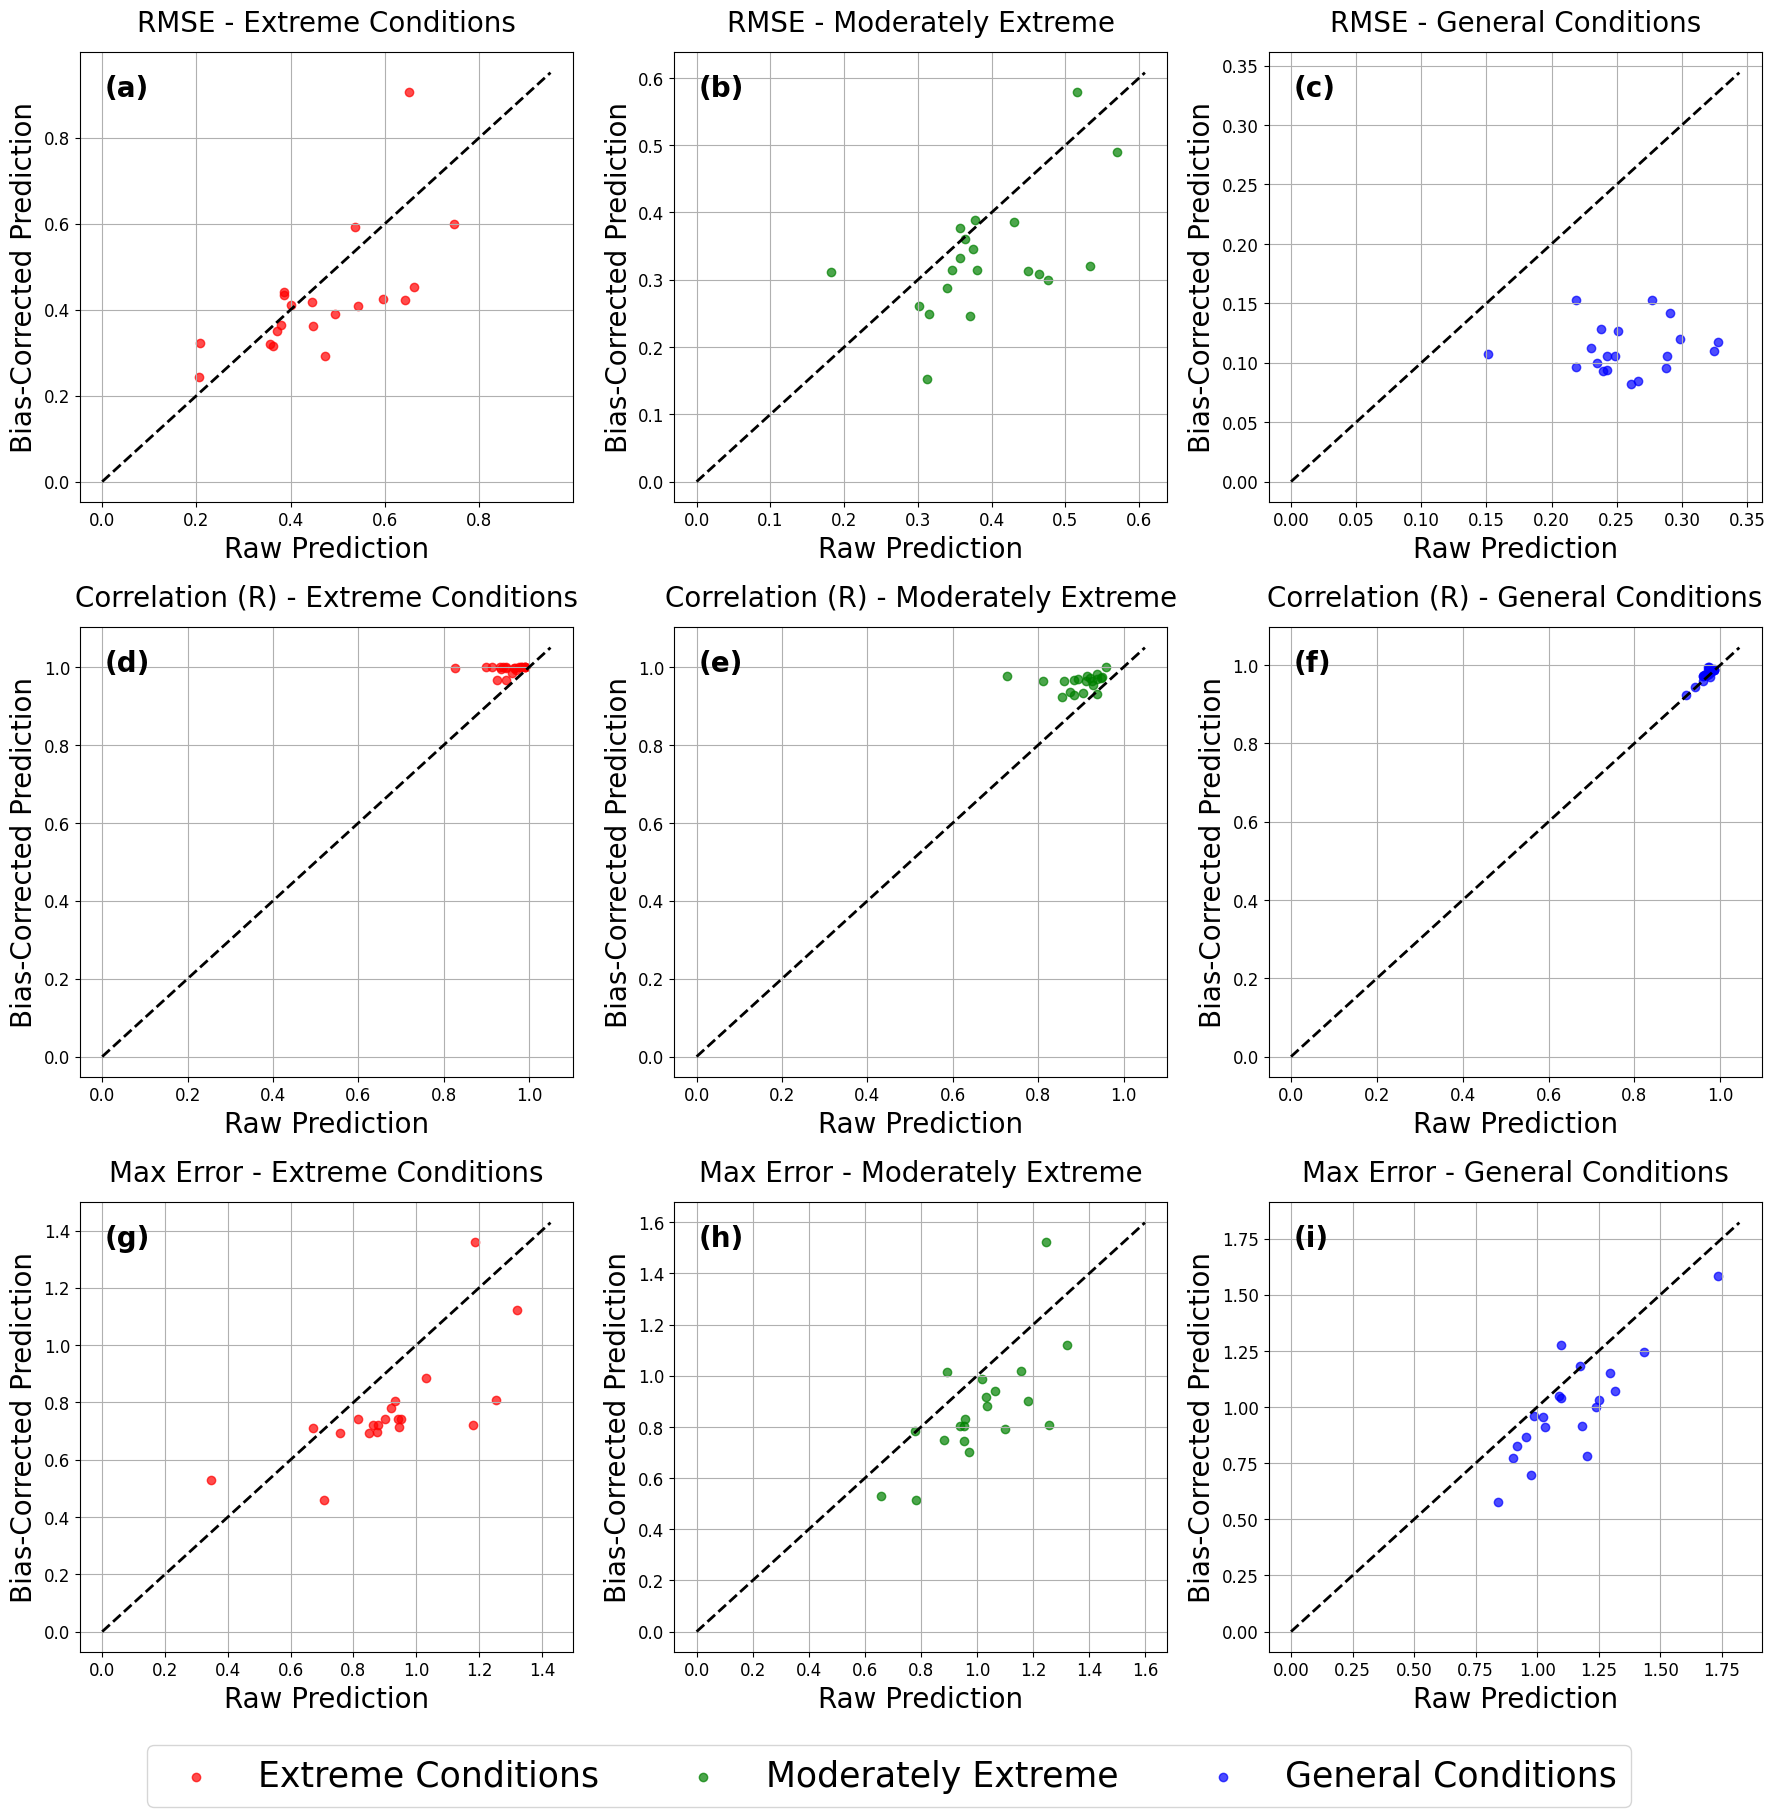

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Create 3x3 subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 18))
datasets = ['Extreme Conditions', 'Moderately Extreme', 'General Conditions']
metric_names = ['RMSE', 'Correlation (R)', 'Max Error']
colors = ['red', 'green', 'blue']  # Color for 99p, 90p, Global
letters = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)', '(i)']

# Group metrics
rmse_data = [
    (rmse_per_station_p_99, rmse_per_station_r_99),
    (rmse_per_station_p_9, rmse_per_station_r_9),
    (rmse_per_station_p_g, rmse_per_station_r_g)
]
corr_data = [
    (corr_per_station_p_99, corr_per_station_r_99),
    (corr_per_station_p_9, corr_per_station_r_9),
    (corr_per_station_p_g, corr_per_station_r_g)
]
max_data = [
    (max_per_station_p_99, max_per_station_r_99),
    (max_per_station_p_9, max_per_station_r_9),
    (max_per_station_p_g, max_per_station_r_g)
]

data_sets = [rmse_data, corr_data, max_data]

# For legend handles
legend_handles = []

for row_idx, data_type in enumerate(data_sets):  # RMSE, Corr, Max
    for col_idx, (p_dict, r_dict) in enumerate(data_type):  # 99p, 90p, Global
        ax = axes[row_idx, col_idx]
        p_vals = np.array([p_dict[station] for station in station_ids])
        r_vals = np.array([r_dict[station] for station in station_ids])

        scatter = ax.scatter(r_vals, p_vals, c=colors[col_idx], alpha=0.7, edgecolor=colors[col_idx], label=datasets[col_idx])
        if row_idx == 0:  # Only collect handles once (top row)
            legend_handles.append(scatter)
            ax.set_title(f'{metric_names[row_idx]} - {datasets[col_idx]}', fontsize=20)

        max_val = max(np.max(r_vals), np.max(p_vals)) * 1.05
        ax.plot([0, max_val], [0, max_val], 'k--', linewidth=2)  # 1:1 line

        ax.set_xlabel('Raw Prediction', fontsize=20)
        ax.set_ylabel('Bias-Corrected Prediction', fontsize=20)
        ax.set_title(f'{metric_names[row_idx]} - {datasets[col_idx]}', fontsize=20)
        ax.grid(True)
        ax.text(0.05, 0.95, letters[row_idx * 3 + col_idx], transform=ax.transAxes,
                fontsize=20, fontweight='bold', va='top', ha='left')

# Add global legend at bottom center
fig.legend(handles=legend_handles, labels=datasets, loc='lower center', ncol=3, fontsize=25,  bbox_to_anchor=(0.5, -0.02))

plt.tight_layout(rect=[0, 0.03, 1, 1])  # Leave space at bottom for legend
plt.savefig("Figure_6.png", dpi=1200, bbox_inches='tight')
plt.show()


/tmp/ipykernel_3980866/3500499259.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('tab20', num_stations)  # Use tab20 or any other qualitative colormap


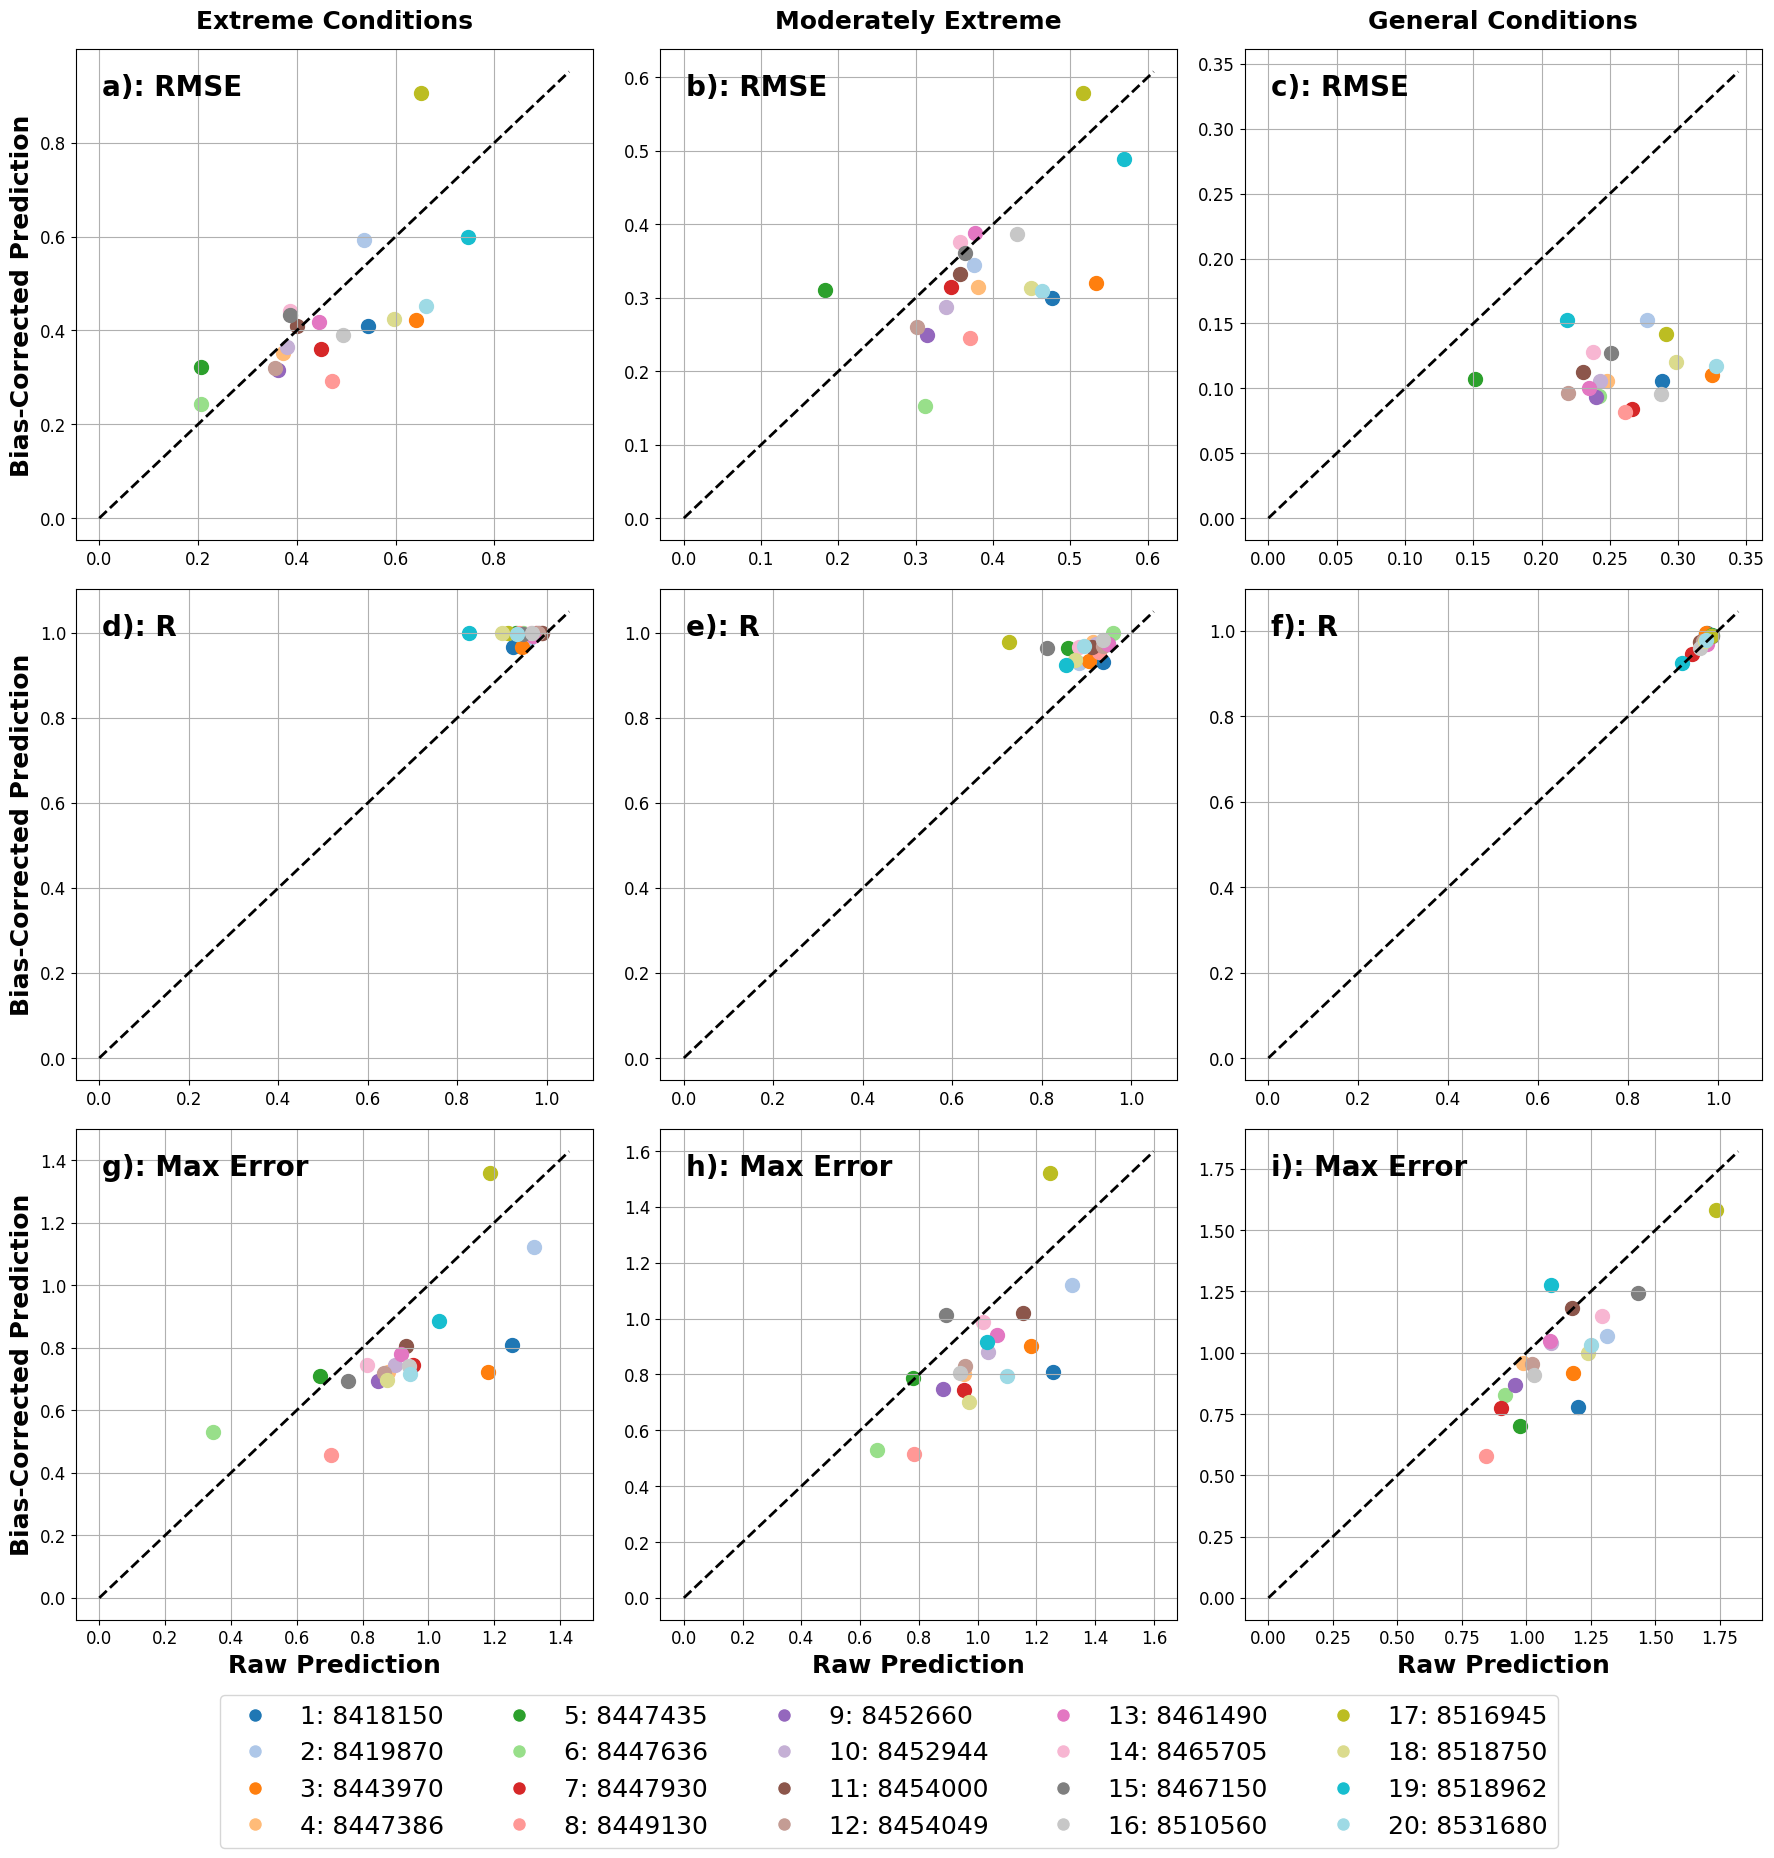

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Create 3x3 subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 18))
datasets = ['Extreme Conditions', 'Moderately Extreme', 'General Conditions']
metric_names = ['RMSE', 'R', 'Max Error']
letters = ['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)', 'i)']

# Group metrics
rmse_data = [
    (rmse_per_station_p_99, rmse_per_station_r_99),
    (rmse_per_station_p_9, rmse_per_station_r_9),
    (rmse_per_station_p_g, rmse_per_station_r_g)
]
corr_data = [
    (corr_per_station_p_99, corr_per_station_r_99),
    (corr_per_station_p_9, corr_per_station_r_9),
    (corr_per_station_p_g, corr_per_station_r_g)
]
max_data = [
    (max_per_station_p_99, max_per_station_r_99),
    (max_per_station_p_9, max_per_station_r_9),
    (max_per_station_p_g, max_per_station_r_g)
]

data_sets = [rmse_data, corr_data, max_data]

# Generate unique colors per station
num_stations = len(station_ids)
color_map = cm.get_cmap('tab20', num_stations)  # Use tab20 or any other qualitative colormap
station_colors = {station: color_map(i) for i, station in enumerate(station_ids)}

# Plot
for row_idx, data_type in enumerate(data_sets):  # RMSE, Corr, Max
    for col_idx, (p_dict, r_dict) in enumerate(data_type):  # 99p, 90p, Global
        ax = axes[row_idx, col_idx]
        
        for station in station_ids:
            p_val = p_dict[station]
            r_val = r_dict[station]
            ax.scatter(r_val, p_val, color=station_colors[station],  s=100, label=station)

        max_val = max(
            max(p_dict.values()),
            max(r_dict.values())
        ) * 1.05
        
        ax.plot([0, max_val], [0, max_val], 'k--', linewidth=2)  # 1:1 line

        if row_idx == 0:
           ax.set_title(datasets[col_idx], fontsize=18,fontweight='bold')
        if  col_idx == 0:
            ax.set_ylabel('Bias-Corrected Prediction', fontsize=18,fontweight='bold')
        if  row_idx == 2:
            ax.set_xlabel('Raw Prediction', fontsize=18,fontweight='bold')

        ax.grid(True)
        ax.text(0.05, 0.95, f'{letters[row_idx * 3 + col_idx]}: {metric_names[row_idx]} ', transform=ax.transAxes,
                fontsize=20, fontweight='bold', va='top', ha='left')

# Create one legend outside the plot with all station names
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=station_colors[station],
                       markersize=10, label=f'{i+1}: {int(station)}')
           for i, station in enumerate(station_ids)]

fig.legend(handles=handles, loc='lower center', ncol=5, fontsize=18, bbox_to_anchor=(0.5, -0.04))

plt.tight_layout(rect=[0, 0.05, 1, 1])  # Adjust for legend space
plt.savefig("Figure_6_stations_colored.png", dpi=1200, bbox_inches='tight')
plt.show()


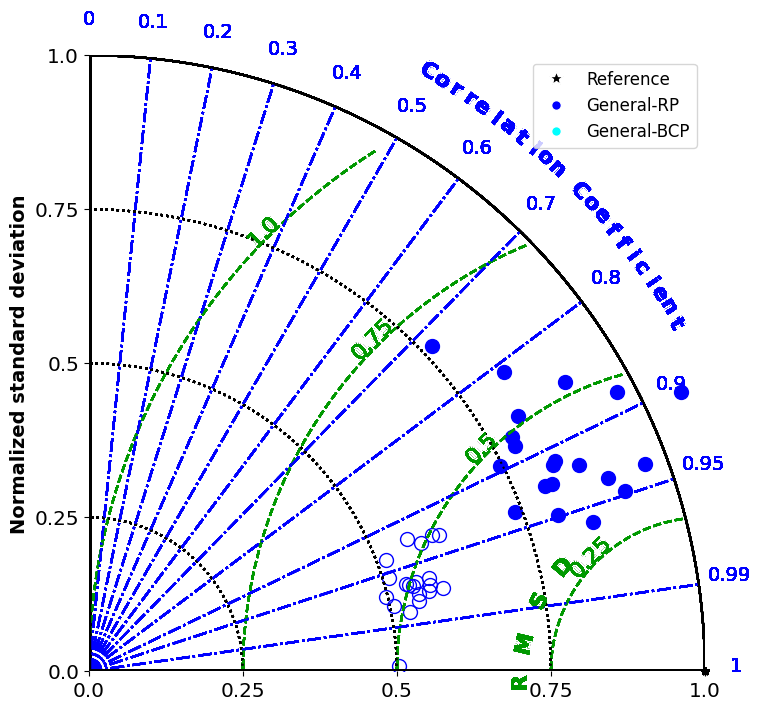

In [49]:
import skill_metrics as sm
import numpy as np



# Get unique station IDs
station_ids = np.unique(data_array_p_9[:, 0])  # Extract unique IDs

# Dictionary to store standard deviation for each station
std_dev_per_station_t_9 = {}
std_dev_per_station_p_9 = {}
std_dev_per_station_r_9 = {}


# Compute standard deviation for each station
for station in station_ids:
    station_values = data_array_t_9[data_array_t_9[:, 0] == station, 1]  # Extract values for the station
    std_dev_per_station_t_9[station] = np.std(station_values)  # Compute standard deviation
    station_values = data_array_r_9[data_array_r_9[:, 0] == station, 1]  # Extract values for the station
    std_dev_per_station_r_9[station] = np.std(station_values)/std_dev_per_station_t_9[station]  # Compute standard deviation
    station_values = data_array_p_9[data_array_p_9[:, 0] == station, 1]  # Extract values for the station
    std_dev_per_station_p_9[station] = np.std(station_values)/std_dev_per_station_t_9[station]  # Compute standard deviation
  

      
# Dictionary to store standard deviation for each station
corr_per_station_t_9 = {}
corr_per_station_p_9 = {}
corr_per_station_r_9 = {}


# Compute standard deviation for each station
for station in station_ids:
    station_values_p = data_array_p_9[data_array_p_9[:, 0] == station, 1]  # Extract values for the station
    station_values_t = data_array_t_9[data_array_t_9[:, 0] == station, 1]  # Extract values for the station
    station_values_r = data_array_r_9[data_array_r_9[:, 0] == station, 1]  # Extract values for the station
    corr_per_station_r_9[station] = np.corrcoef(station_values_t, station_values_r)[0, 1]
    corr_per_station_p_9[station] = np.corrcoef(station_values_t, station_values_p)[0, 1]

# Dictionary to store standard deviation for each station
rmse_per_station_t_9 = {}
rmse_per_station_p_9 = {}
rmse_per_station_r_9 = {}


# Compute standard deviation for each station
for station in station_ids:
    station_values_p = data_array_p_9[data_array_p_9[:, 0] == station, 1]  # Extract values for the station
    station_values_t = data_array_t_9[data_array_t_9[:, 0] == station, 1]  # Extract values for the station
    station_values_r = data_array_r_9[data_array_r_9[:, 0] == station, 1]  # Extract values for the station
    rmse_per_station_r_9[station] = np.sqrt(np.mean((station_values_r - station_values_t)**2))
    rmse_per_station_p_9[station] = np.sqrt(np.mean((station_values_p - station_values_t)**2))


# Create the Taylor diagram
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot()

for station in station_ids:
    sm.taylor_diagram(np.array([1,std_dev_per_station_p_9[station]]), np.array([0,rmse_per_station_p_9[station]]),np.array([1,corr_per_station_p_9[station]]), markerSymbol='o', markerColor='blue', colOBS='k', markerobs='*')
    sm.taylor_diagram(np.array([1,std_dev_per_station_r_9[station]]), np.array([0,rmse_per_station_r_9[station]]),np.array([1,corr_per_station_r_9[station]]), markerSymbol='o', markerColor='blue', alpha = 0.0, colOBS='k', markerobs='*')



# Set the y-axis label to indicate Normalized Standard Deviation
ax.set_ylabel('Normalized standard deviation', fontsize=14)


# Adding the legend
# Define legend labels for each marker
# Manually create legend entries with markers
from matplotlib.lines import Line2D

legend_markers = [Line2D([0], [0], marker='*', color='w', markerfacecolor='k', markersize=10),  # Reference marker
                  Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=7),  
                  Line2D([0], [0], marker='o', color='w', markerfacecolor='cyan', markersize=7)]

# Define legend labels for each marker
labels = ['Reference', 'General-RP', 'General-BCP', ]


# Create the legend with the markers and labels
ax.legend(legend_markers, labels, loc='upper right', fontsize=12)
ax.grid(False)
# Show the plot
plt.show()


In [50]:
# Dictionary to store RMSE for each station
rmse_per_station_t_99 = {}
rmse_per_station_p_99 = {}
rmse_per_station_r_99 = {}


# Compute standard deviation for each station
for station in station_ids:
    station_values_p = data_array_p_99[data_array_p_99[:, 0] == station, 1]  # Extract values for the station
    station_values_t = data_array_t_99[data_array_t_99[:, 0] == station, 1]  # Extract values for the station
    station_values_r = data_array_r_99[data_array_r_99[:, 0] == station, 1]  # Extract values for the station
    rmse_per_station_r_99[station] = np.sqrt(np.mean((station_values_r - station_values_t)**2))
    rmse_per_station_p_99[station] = np.sqrt(np.mean((station_values_p - station_values_t)**2))
    print(station)
    print(np.max(np.abs(station_values_p-station_values_t)))
    print(np.max(np.abs(station_values_r-station_values_t)))


    


8418150.0
0.8076514390388856
1.2553399863338313
8419870.0
1.1210805448334786
1.3194168927710626
8443970.0
0.7209129734020816
1.181771879093539
8447386.0
0.7223899294241652
0.8774524160727697
8447435.0
0.7097462781119097
0.6703239262449492
8447636.0
0.5290288461497312
0.34660806164836955
8447930.0
0.7431944574684392
0.952706267806736
8449130.0
0.4580054771412999
0.7051139772558903
8452660.0
0.6922021089551412
0.8483188847315319
8452944.0
0.7435550816454937
0.8990765550282397
8454000.0
0.8059972752823102
0.9329784173032036
8454049.0
0.7204613459122601
0.86392768161362
8461490.0
0.7801280967302496
0.9182329703281007
8465705.0
0.743771780964174
0.8133963763082406
8467150.0
0.6939788211752502
0.7557007225313181
8510560.0
0.7410318422721704
0.9405400665200523
8516945.0
1.35958734405008
1.1873300129602606
8518750.0
0.6968798858748451
0.8754790743810521
8518962.0
0.8862311579689592
1.0318020967641177
8531680.0
0.71550504005667
0.9451139192489144


In [51]:


import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import skill_metrics as sm
import numpy as np


# ## DATA ####################################################################### #


SUBPLOTS_DATA = [{

        "axis_idx": (0, 0),
        "title": "(1)",
        "y_label": True,
        "x_label": True,
        "modeled": {
            "99.9 Perc raw p": (bias[0,0],crmsd[0,0],rmsd[0,0]),
            "99.9 Perc BC p": (bias[0,1],crmsd[0,1],rmsd[0,1]),
            "99.99 Perc raw p": (bias[0,2],crmsd[0,2],rmsd[0,2]),
            "99.99 Perc BC p": (bias[0,3],crmsd[0,3],rmsd[0,3]),
            "General raw p": (bias[0,4],crmsd[0,4],rmsd[0,4]),
            "General BC p": (bias[0,5],crmsd[0,5],rmsd[0,5])
        }
    }, {
        "axis_idx": (0, 1),
        "title": "(2)",
        "y_label": True,
        "x_label": True,
        "modeled": {
            "99.9 Perc raw p": (bias[1,0],crmsd[1,0],rmsd[1,0]),
            "99.9 Perc BC p": (bias[1,1],crmsd[1,1],rmsd[1,1]),
            "99.99 Perc raw p": (bias[1,2],crmsd[1,2],rmsd[1,2]),
            "99.99 Perc BC p": (bias[1,3],crmsd[1,3],rmsd[1,3]),
            "General raw p": (bias[1,4],crmsd[1,4],rmsd[1,4]),
            "General BC p": (bias[1,5],crmsd[1,5],rmsd[1,5])
        }
    }, {
        "axis_idx": (0, 2),
        "title": "(3)",
        "y_label": True,
        "x_label": True,
        "modeled": {
            "99.9 Perc raw p": (bias[2,0],crmsd[2,0],rmsd[2,0]),
            "99.9 Perc BC p": (bias[2,1],crmsd[2,1],rmsd[2,1]),
            "99.99 Perc raw p": (bias[2,2],crmsd[2,2],rmsd[2,2]),
            "99.99 Perc BC p": (bias[2,3],crmsd[2,3],rmsd[2,3]),
            "General raw p": (bias[2,4],crmsd[2,4],rmsd[2,4]),
            "General BC p": (bias[2,5],crmsd[2,5],rmsd[2,5])
        }
    }, {
        "axis_idx": (0, 3),
        "title": "(4)",
        "y_label": True,
        "x_label": True,
        "modeled": {
            "99.9 Perc raw p": (bias[3,0],crmsd[3,0],rmsd[3,0]),
            "99.9 Perc BC p": (bias[3,1],crmsd[3,1],rmsd[3,1]),
            "99.99 Perc raw p": (bias[3,2],crmsd[3,2],rmsd[3,2]),
            "99.99 Perc BC p": (bias[3,3],crmsd[3,3],rmsd[3,3]),
            "General raw p": (bias[3,4],crmsd[3,4],rmsd[3,4]),
            "General BC p": (bias[3,5],crmsd[3,5],rmsd[3,5])
        }
    }, {
        "axis_idx": (0, 4),
        "title": "(5)",
        "y_label": True,
        "x_label": True,
        "modeled": {
            "99.9 Perc raw p": (bias[4,0],crmsd[4,0],rmsd[4,0]),
            "99.9 Perc BC p": (bias[4,1],crmsd[4,1],rmsd[4,1]),
            "99.99 Perc raw p": (bias[4,2],crmsd[4,2],rmsd[4,2]),
            "99.99 Perc BC p": (bias[4,3],crmsd[4,3],rmsd[4,3]),
            "General raw p": (bias[4,4],crmsd[4,4],rmsd[4,4]),
            "General BC p": (bias[4,5],crmsd[4,5],rmsd[4,5])
        }
    }, {
        "axis_idx": (1, 0),
        "title": "(6)",
        "y_label": True,
        "x_label": True,
        "modeled": {
            "99.9 Perc raw p": (bias[5,0],crmsd[5,0],rmsd[5,0]),
            "99.9 Perc BC p": (bias[5,1],crmsd[5,1],rmsd[5,1]),
            "99.99 Perc raw p": (bias[5,2],crmsd[5,2],rmsd[5,2]),
            "99.99 Perc BC p": (bias[5,3],crmsd[5,3],rmsd[5,3]),
            "General raw p": (bias[5,4],crmsd[5,4],rmsd[5,4]),
            "General BC p": (bias[5,5],crmsd[5,5],rmsd[5,5])
        }
    }, {
        "axis_idx": (1, 1),
        "title": "(7)",
        "y_label": True,
        "x_label": True,
        "modeled": {
            "99.9 Perc raw p": (bias[6,0],crmsd[6,0],rmsd[6,0]),
            "99.9 Perc BC p": (bias[6,1],crmsd[6,1],rmsd[6,1]),
            "99.99 Perc raw p": (bias[6,2],crmsd[6,2],rmsd[6,2]),
            "99.99 Perc BC p": (bias[6,3],crmsd[6,3],rmsd[6,3]),
            "General raw p": (bias[6,4],crmsd[6,4],rmsd[6,4]),
            "General BC p": (bias[6,5],crmsd[6,5],rmsd[6,5])
        }
    }, {
        "axis_idx": (1, 2),
        "title": "(8)",
        "y_label": True,
        "x_label": True,
        "modeled": {
            "99.9 Perc raw p": (bias[7,0],crmsd[7,0],rmsd[7,0]),
            "99.9 Perc BC p": (bias[7,1],crmsd[7,1],rmsd[7,1]),
            "99.99 Perc raw p": (bias[7,2],crmsd[7,2],rmsd[7,2]),
            "99.99 Perc BC p": (bias[7,3],crmsd[7,3],rmsd[7,3]),
            "General raw p": (bias[7,4],crmsd[7,4],rmsd[7,4]),
            "General BC p": (bias[7,5],crmsd[7,5],rmsd[7,5])
        }
    }, {
        "axis_idx": (1, 3),
        "title": "(9)",
        "y_label": True,
        "x_label": True,
        "modeled": {
            "99.9 Perc raw p": (bias[8,0],crmsd[8,0],rmsd[8,0]),
            "99.9 Perc BC p": (bias[8,1],crmsd[8,1],rmsd[8,1]),
            "99.99 Perc raw p": (bias[8,2],crmsd[8,2],rmsd[8,2]),
            "99.99 Perc BC p": (bias[8,3],crmsd[8,3],rmsd[8,3]),
            "General raw p": (bias[8,4],crmsd[8,4],rmsd[8,4]),
            "General BC p": (bias[8,5],crmsd[8,5],rmsd[8,5])
        }
    }, {
        "axis_idx": (1, 4),
        "title": "(10)",
        "y_label": True,
        "x_label": True,
        "modeled": {
            "99.9 Perc raw p": (bias[9,0],crmsd[9,0],rmsd[9,0]),
            "99.9 Perc BC p": (bias[9,1],crmsd[9,1],rmsd[9,1]),
            "99.99 Perc raw p": (bias[9,2],crmsd[9,2],rmsd[9,2]),
            "99.99 Perc BC p": (bias[9,3],crmsd[9,3],rmsd[9,3]),
            "General raw p": (bias[9,4],crmsd[9,4],rmsd[9,4]),
            "General BC p": (bias[9,5],crmsd[9,5],rmsd[9,5])
        }
    }, {
        "axis_idx": (2, 0),
        "title": "(11)",
        "y_label": True,
        "x_label": True,
        "modeled": {
            "99.9 Perc raw p": (bias[10,0],crmsd[10,0],rmsd[10,0]),
            "99.9 Perc BC p": (bias[10,1],crmsd[10,1],rmsd[10,1]),
            "99.99 Perc raw p": (bias[10,2],crmsd[10,2],rmsd[10,2]),
            "99.99 Perc BC p": (bias[10,3],crmsd[10,3],rmsd[10,3]),
            "General raw p": (bias[10,4],crmsd[10,4],rmsd[10,4]),
            "General BC p": (bias[10,5],crmsd[10,5],rmsd[10,5])
        }
    }, {
        "axis_idx": (2, 1),
        "title": "(12)",
        "y_label": True,
        "x_label": True,
        "modeled": {
            "99.9 Perc raw p": (bias[11,0],crmsd[11,0],rmsd[11,0]),
            "99.9 Perc BC p": (bias[11,1],crmsd[11,1],rmsd[11,1]),
            "99.99 Perc raw p": (bias[11,2],crmsd[11,2],rmsd[11,2]),
            "99.99 Perc BC p": (bias[11,3],crmsd[11,3],rmsd[11,3]),
            "General raw p": (bias[11,4],crmsd[11,4],rmsd[11,4]),
            "General BC p": (bias[11,5],crmsd[11,5],rmsd[11,5])
        }
    }, {
        "axis_idx": (2, 2),
        "title": "(13)",
        "y_label": True,
        "x_label": True,
        "modeled": {
            "99.9 Perc raw p": (bias[12,0],crmsd[12,0],rmsd[12,0]),
            "99.9 Perc BC p": (bias[12,1],crmsd[12,1],rmsd[12,1]),
            "99.99 Perc raw p": (bias[12,2],crmsd[12,2],rmsd[12,2]),
            "99.99 Perc BC p": (bias[12,3],crmsd[12,3],rmsd[12,3]),
            "General raw p": (bias[12,4],crmsd[12,4],rmsd[12,4]),
            "General BC p": (bias[12,5],crmsd[12,5],rmsd[12,5])
        }
    }, {
        "axis_idx": (2, 3),
        "title": "(14)",
        "y_label": True,
        "x_label": True,
        "modeled": {
            "99.9 Perc raw p": (bias[13,0],crmsd[13,0],rmsd[13,0]),
            "99.9 Perc BC p": (bias[13,1],crmsd[13,1],rmsd[13,1]),
            "99.99 Perc raw p": (bias[13,2],crmsd[13,2],rmsd[13,2]),
            "99.99 Perc BC p": (bias[13,3],crmsd[13,3],rmsd[13,3]),
            "General raw p": (bias[13,4],crmsd[13,4],rmsd[13,4]),
            "General BC p": (bias[13,5],crmsd[13,5],rmsd[13,5])
        }
    }, {
        "axis_idx": (2, 4),
        "title": "(15)",
        "y_label": True,
        "x_label": True,
        "modeled": {
            "99.9 Perc raw p": (bias[14,0],crmsd[14,0],rmsd[14,0]),
            "99.9 Perc BC p": (bias[14,1],crmsd[14,1],rmsd[14,1]),
            "99.99 Perc raw p": (bias[14,2],crmsd[14,2],rmsd[14,2]),
            "99.99 Perc BC p": (bias[14,3],crmsd[14,3],rmsd[14,3]),
            "General raw p": (bias[14,4],crmsd[14,4],rmsd[14,4]),
            "General BC p": (bias[14,5],crmsd[14,5],rmsd[14,5])
        }
    }, {
        "axis_idx": (3, 0),
        "title": "(16)",
        "y_label": True,
        "x_label": True,
        "modeled": {
            "99.9 Perc raw p": (bias[15,0],crmsd[15,0],rmsd[15,0]),
            "99.9 Perc BC p": (bias[15,1],crmsd[15,1],rmsd[15,1]),
            "99.99 Perc raw p": (bias[15,2],crmsd[15,2],rmsd[15,2]),
            "99.99 Perc BC p": (bias[15,3],crmsd[15,3],rmsd[15,3]),
            "General raw p": (bias[15,4],crmsd[15,4],rmsd[15,4]),
            "General BC p": (bias[15,5],crmsd[15,5],rmsd[15,5])
        }
    }, {
        "axis_idx": (3, 1),
        "title": "(17)",
        "y_label": True,
        "x_label": True,
        "modeled": {
            "99.9 Perc raw p": (bias[16,0],crmsd[16,0],rmsd[16,0]),
            "99.9 Perc BC p": (bias[16,1],crmsd[16,1],rmsd[16,1]),
            "99.99 Perc raw p": (bias[16,2],crmsd[16,2],rmsd[16,2]),
            "99.99 Perc BC p": (bias[16,3],crmsd[16,3],rmsd[16,3]),
            "General raw p": (bias[16,4],crmsd[16,4],rmsd[16,4]),
            "General BC p": (bias[16,5],crmsd[16,5],rmsd[16,5])
        }
    }, {
        "axis_idx": (3, 2),
        "title": "(18)",
        "y_label": True,
        "x_label": True,
        "modeled": {
            "99.9 Perc raw p": (bias[17,0],crmsd[17,0],rmsd[17,0]),
            "99.9 Perc BC p": (bias[17,1],crmsd[17,1],rmsd[17,1]),
            "99.99 Perc raw p": (bias[17,2],crmsd[17,2],rmsd[17,2]),
            "99.99 Perc BC p": (bias[17,3],crmsd[17,3],rmsd[17,3]),
            "General raw p": (bias[17,4],crmsd[17,4],rmsd[17,4]),
            "General BC p": (bias[17,5],crmsd[17,5],rmsd[17,5])
        }
    }, {
        "axis_idx": (3, 3),
        "title": "(19)",
        "y_label": True,
        "x_label": True,
        "modeled": {
            "99.9 Perc raw p": (bias[18,0],crmsd[18,0],rmsd[18,0]),
            "99.9 Perc BC p": (bias[18,1],crmsd[18,1],rmsd[18,1]),
            "99.99 Perc raw p": (bias[18,2],crmsd[18,2],rmsd[18,2]),
            "99.99 Perc BC p": (bias[18,3],crmsd[18,3],rmsd[18,3]),
            "General raw p": (bias[18,4],crmsd[18,4],rmsd[18,4]),
            "General BC p": (bias[18,5],crmsd[18,5],rmsd[18,5])
        }
    }, {
        "axis_idx": (3, 4),
        "title": "(20)",
        "y_label": True,
        "x_label": True,
        "modeled": {
            "99.9 Perc raw p": (bias[19,0],crmsd[19,0],rmsd[19,0]),
            "99.9 Perc BC p": (bias[19,1],crmsd[19,1],rmsd[19,1]),
            "99.99 Perc raw p": (bias[19,2],crmsd[19,2],rmsd[19,2]),
            "99.99 Perc BC p": (bias[19,3],crmsd[19,3],rmsd[19,3]),
            "General raw p": (bias[19,4],crmsd[19,4],rmsd[19,4]),
            "General BC p": (bias[19,5],crmsd[19,5],rmsd[19,5])
        }
    }
]

MARKERS = {
    "99.9 Perc raw p": {
        "marker": "o",
        "color_edge": "green",
        "color_face": "white",
        "markersize": 9
    },
    "99.9 Perc BC p": {
        "marker": "o",
        "color_edge": "green",
        "color_face": "green",
        "markersize": 9
    },
    "99.99 Perc raw p": {
        "marker": "v",
        "color_edge": "red",
        "color_face": "white",
        "markersize": 9
    },
    "99.99 Perc BC p": {
        "marker": "v",
        "color_edge": "red",
        "color_face": "red",
        "markersize": 9
    },
    "General raw p": {
        "marker": "D",
        "color_edge": "blue",
        "color_face": "white",
        "markersize": 9
    },
    "General BC p": {
        "marker": "D",
        "color_edge": "blue",
        "color_face": "blue",
        "markersize": 9
    }
}


# ## PLOT STYLE ################################################################# #

FONT_FAMILY = 'Times New Roman'
FONT_SIZE = 14

# specify some styles for the bias/uRMSD circles
COLS_BIAS = {
    'grid': 'black',
    'tick_labels': '#000000',
    'ticks': '#DDDDDD',
    'title': '#000000'
}

# specify some styles for the bias/uRMSD circles
STYLES_CIRCLES = {
    'color': 'black',
    'linestyle': '--'
}


# ## MAIN ####################################################################### #



# create figure with 2 lines and 10 columns
fig_size = (5*5, 4*5)
fig, axs = plt.subplots(4, 5, figsize=fig_size, sharey=False)


# build subplot by subplot
for subplot_data in SUBPLOTS_DATA:
        
        # get subplot object and ensure it will be a square
        ax = axs[subplot_data["axis_idx"][0]][subplot_data["axis_idx"][1]]
        ax.set(adjustable='box', aspect='equal')

        # create one overlay for each model marker
        # Note that axismax must be specified otherwise different size circles
        # will appear in each subplot
        axismax = 0.9
        overlay = 'off'
        for model_id, (biass, crmsds, rmsds) in subplot_data["modeled"].items():
            marker = MARKERS[model_id]
            sm.target_diagram(ax,
                              np.asarray((biass, biass)), 
                              np.asarray((crmsds, crmsds)), 
                              np.asarray((rmsds, rmsds)),
                              markercolors = {
                                "face": marker["color_face"],
                                "edge": marker["color_edge"]
                              },
                              markersize = marker["markersize"],
                              markersymbol = marker["marker"],
                              alpha = 1.0,
                              ticks = np.arange(-0.9,1,0.3),
                              axismax = axismax,
                              circlecolor= STYLES_CIRCLES['color'],
                              circlestyle=STYLES_CIRCLES['linestyle'],
                              colframe='black',
                              labelweight='normal',
                              overlay = overlay)
            overlay = 'on' # set to off for all remaining overlays in subplot
       
        ax.set_xlabel("uRMSD", fontsize=14)  # Set x-axis label
        #ax.xaxis.label.set_rotation(90)  # Rotate x-axis label
        ax.xaxis.set_label_coords(1.05, 0.6)  # Moves x-label upwards
        ax.xaxis.label.set_rotation(-90)
        ax.grid(False)
        # set titles (upper, left, bottom)
        ax.set_title(subplot_data["title"], loc="left", y=0.9)
        ax.set_ylabel("Bias", fontsize=14)  # Set x-axis label
        ax.yaxis.set_label_coords(0.5, 1.05)  # Moves x-label upwards
        # hide ylabel
        if not subplot_data["y_label"]:
            ax.set_ylabel("")
        
        # hide xlabel
        if not subplot_data["x_label"]:
            ax.set_xlabel("")


legend_handles = []
for label, marker_info in MARKERS.items():
    handle = mlines.Line2D(
        [], [], 
        marker=marker_info["marker"], 
        color=marker_info["color_face"], 
        markeredgecolor=marker_info["color_edge"], 
        markersize=marker_info["markersize"], 
        linestyle='None', 
        label=label
    )
    legend_handles.append(handle)

# Add the legend below the subplots
fig.legend(
    handles=legend_handles, 
    loc='lower center', 
    ncol=len(legend_handles),  # Ensures the legend is in one row
    bbox_to_anchor=(0.5, 0.07),  # Adjust position if needed
    fontsize=16
)


# Write plot to file
plt.savefig('target.png', dpi=300)

plt.show()
    

IndexError: invalid index to scalar variable.

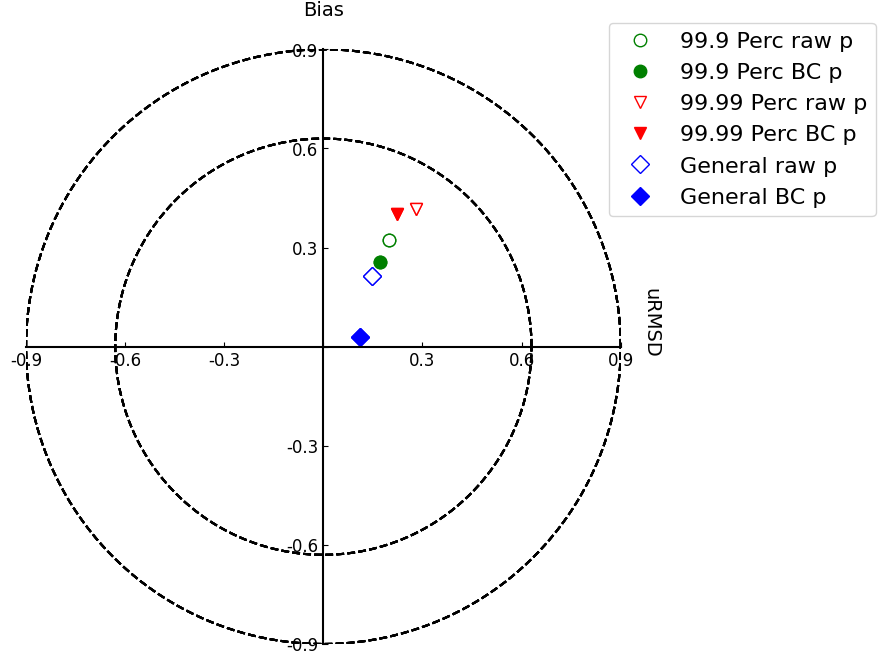

In [52]:


import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import skill_metrics as sm
import numpy as np


# ## DATA ####################################################################### #

gbias = np.empty([6], dtype=float)
grmsd = np.empty([6], dtype=float)
gcrmsd = np.empty([6], dtype=float)


gcrmsd[0] = sm.centered_rms_dev(test_r_99_9,test_t_99_9)
gcrmsd[1] = sm.centered_rms_dev(test_p_99_9,test_t_99_9)
gcrmsd[2] = sm.centered_rms_dev(test_r_99_99,test_t_99_99)
gcrmsd[3] = sm.centered_rms_dev(test_p_99_99,test_t_99_99)
gcrmsd[4] = sm.centered_rms_dev(general_Test_r,general_Test_t)
gcrmsd[5] = sm.centered_rms_dev(general_Test_p,general_Test_t)
gbias[0] = sm.bias(test_r_99_9,test_t_99_9)
gbias[1] = sm.bias(test_p_99_9,test_t_99_9)
gbias[2] = sm.bias(test_r_99_99,test_t_99_99)
gbias[3] = sm.bias(test_p_99_99,test_t_99_99)
gbias[4] = sm.bias(general_Test_r,general_Test_t)
gbias[5] = sm.bias(general_Test_p,general_Test_t)
grmsd[0] = sm.rmsd(test_r_99_9,test_t_99_9)
grmsd[1] = sm.rmsd(test_p_99_9,test_t_99_9)
grmsd[2] = sm.rmsd(test_r_99_99,test_t_99_99)
grmsd[3] = sm.rmsd(test_p_99_99,test_t_99_99)
grmsd[4] = sm.rmsd(general_Test_r,general_Test_t)
grmsd[5] = sm.rmsd(general_Test_p,general_Test_t)


SUBPLOTS_DATA = [{

        "axis_idx": (0, 0),
        "title": "",
        "y_label": True,
        "x_label": True,
        "modeled": {
            "99.9 Perc raw p": (gbias[0],gcrmsd[0],grmsd[0]),
            "99.9 Perc BC p": (gbias[1],gcrmsd[1],grmsd[1]),
            "99.99 Perc raw p": (gbias[2],gcrmsd[2],grmsd[2]),
            "99.99 Perc BC p": (gbias[3],gcrmsd[3],grmsd[3]),
            "General raw p": (gbias[4],gcrmsd[4],grmsd[4]),
            "General BC p": (gbias[5],gcrmsd[5],grmsd[5])
        }
    }
]

MARKERS = {
    "99.9 Perc raw p": {
        "marker": "o",
        "color_edge": "green",
        "color_face": "white",
        "markersize": 9
    },
    "99.9 Perc BC p": {
        "marker": "o",
        "color_edge": "green",
        "color_face": "green",
        "markersize": 9
    },
    "99.99 Perc raw p": {
        "marker": "v",
        "color_edge": "red",
        "color_face": "white",
        "markersize": 9
    },
    "99.99 Perc BC p": {
        "marker": "v",
        "color_edge": "red",
        "color_face": "red",
        "markersize": 9
    },
    "General raw p": {
        "marker": "D",
        "color_edge": "blue",
        "color_face": "white",
        "markersize": 9
    },
    "General BC p": {
        "marker": "D",
        "color_edge": "blue",
        "color_face": "blue",
        "markersize": 9
    }
}


# ## PLOT STYLE ################################################################# #

FONT_FAMILY = 'Times New Roman'
FONT_SIZE = 14

# specify some styles for the bias/uRMSD circles
COLS_BIAS = {
    'grid': 'black',
    'tick_labels': '#000000',
    'ticks': '#DDDDDD',
    'title': '#000000'
}

# specify some styles for the bias/uRMSD circles
STYLES_CIRCLES = {
    'color': 'black',
    'linestyle': '--'
}


# ## MAIN ####################################################################### #



# create figure with 2 lines and 10 columns
fig_size = (8, 8)
fig, axs = plt.subplots(1, 1, figsize=fig_size, sharey=False)


# build subplot by subplot
for subplot_data in SUBPLOTS_DATA:
        
        # get subplot object and ensure it will be a square
        ax = axs
        ax.set(adjustable='box', aspect='equal')

        # create one overlay for each model marker
        # Note that axismax must be specified otherwise different size circles
        # will appear in each subplot
        axismax = 0.9
        overlay = 'off'
        for model_id, (biass, crmsds, rmsds) in subplot_data["modeled"].items():
            marker = MARKERS[model_id]
            sm.target_diagram(ax,
                              np.asarray((biass, biass)), 
                              np.asarray((crmsds, crmsds)), 
                              np.asarray((rmsds, rmsds)),
                              markercolors = {
                                "face": marker["color_face"],
                                "edge": marker["color_edge"]
                              },
                              markersize = marker["markersize"],
                              markersymbol = marker["marker"],
                              alpha = 1.0,
                              ticks = np.arange(-0.9,1,0.3),
                              axismax = axismax,
                              circlecolor= STYLES_CIRCLES['color'],
                              circlestyle=STYLES_CIRCLES['linestyle'],
                              colframe='black',
                              labelweight='normal',
                              overlay = overlay)
            overlay = 'on' # set to off for all remaining overlays in subplot
       
        ax.set_xlabel("uRMSD", fontsize=14)  # Set x-axis label
        #ax.xaxis.label.set_rotation(90)  # Rotate x-axis label
        ax.xaxis.set_label_coords(1.05, 0.6)  # Moves x-label upwards
        ax.xaxis.label.set_rotation(-90)
        ax.grid(False)
        # set titles (upper, left, bottom)
        ax.set_title(subplot_data["title"], loc="left", y=0.9)
        ax.set_ylabel("Bias", fontsize=14)  # Set x-axis label
        ax.yaxis.set_label_coords(0.5, 1.05)  # Moves x-label upwards
        # hide ylabel
        if not subplot_data["y_label"]:
            ax.set_ylabel("")
        
        # hide xlabel
        if not subplot_data["x_label"]:
            ax.set_xlabel("")


legend_handles = []
for label, marker_info in MARKERS.items():
    handle = mlines.Line2D(
        [], [], 
        marker=marker_info["marker"], 
        color=marker_info["color_face"], 
        markeredgecolor=marker_info["color_edge"], 
        markersize=marker_info["markersize"], 
        linestyle='None', 
        label=label
    )
    legend_handles.append(handle)

# Add the legend below the subplots
fig.legend(
    handles=legend_handles, 
    loc='upper right', 
    ncol=1,  # Ensures the legend is in one row
    bbox_to_anchor=(1.12, 0.9),  # Adjust position if needed
    fontsize=16
)

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Leaves space on the right side

# Write plot to file
plt.savefig('target_genral.png', dpi=300, bbox_inches='tight')

plt.show()
    


In [70]:
or i in rangenp.max(np.abs(test_r_99_99-test_t_99_99))

1.3194168927710626

In [78]:
test_r_99_99[:].shape

(932,)

## Let's look into the lead time

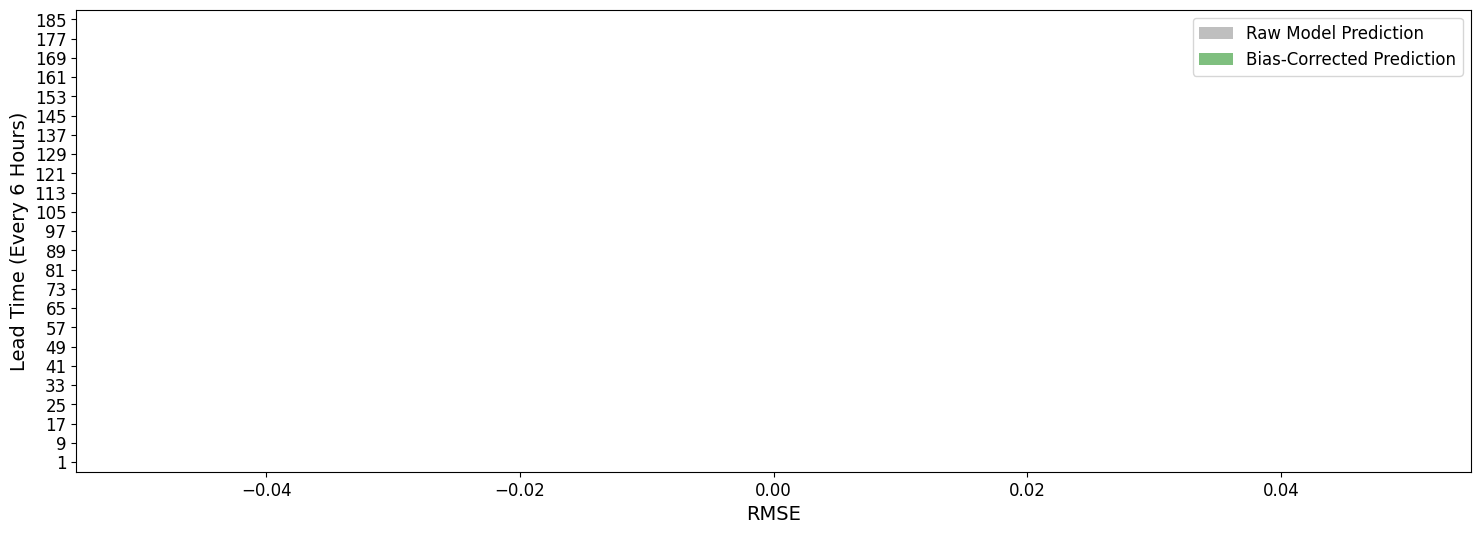

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch



# Select indices for every 6th time step
time_indices = range(0, 186, 8)

def rmse(predictions, true_values):
    return np.sqrt(np.mean((predictions - true_values) ** 2, axis=(0,2)))
    
# Create a box plot for every 6th lead time
rmse_raw_samples = [rmse(Test_r[:, :, i:i+6], Test_t[:, :, i:i+6]) for i in time_indices]
rmse_corrected_samples = [rmse(Test_p[:, :, i:i+6], Test_t[:, :, i:i+6]) for i in time_indices]

plt.figure(figsize=(18, 6))
plt.boxplot(rmse_raw_samples, positions=np.arange(len(time_indices)) * 2, widths=0.6, patch_artist=True, showfliers=False,boxprops=dict(facecolor='gray', alpha=0.5), medianprops=dict(color='black'), vert=False)
plt.boxplot(rmse_corrected_samples, positions=np.arange(len(time_indices)) * 2 + 1, widths=0.6,showfliers=False, patch_artist=True, boxprops=dict(facecolor='green', alpha=0.5), medianprops=dict(color='black'), vert=False)

plt.yticks(np.arange(len(time_indices)) * 2 + 0.5, [f'{i+1}' for i in time_indices])
plt.ylabel('Lead Time (Every 6 Hours)')
plt.xlabel('RMSE')
# Customize the legend using Patch
legend_elements = [
    Patch(facecolor='gray', alpha=0.5, label='Raw Model Prediction'),
    Patch(facecolor='green', alpha=0.5, label='Bias-Corrected Prediction')
]

# Add the legend
plt.legend(handles=legend_elements)


plt.grid()

# Write plot to file
plt.savefig('RMSE_leadtime.png', dpi=300, bbox_inches='tight')
plt.show()


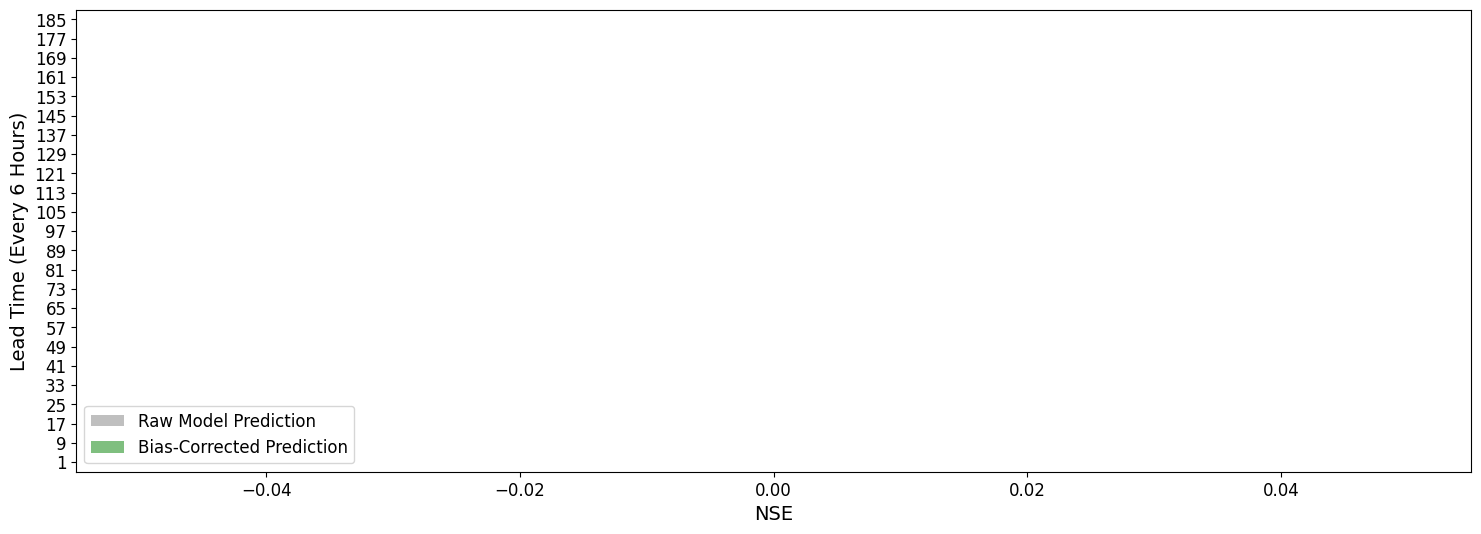

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch



# Select indices for every 6th time step
time_indices = range(0, 186, 8)

def nse(predictions, true_values):
    # Calculate the mean of true values across samples (axis 0) and lead time (axis 2)
    true_mean = np.mean(true_values, axis=(0, 2), keepdims=True)
    # Compute the NSE formula
    numerator = np.sum((predictions - true_values) ** 2, axis=(0, 2))
    denominator = np.sum((true_values - true_mean) ** 2, axis=(0, 2))
    return 1 - numerator / denominator


nse_raw_samples = [nse(Test_r[:, :, i:i+6], Test_t[:, :, i:i+6]) for i in time_indices]
nse_corrected_samples = [nse(Test_p[:, :, i:i+6], Test_t[:, :, i:i+6]) for i in time_indices]


plt.figure(figsize=(18, 6))
plt.boxplot(nse_raw_samples, positions=np.arange(len(time_indices)) * 2, widths=0.6, patch_artist=True, showfliers=False,boxprops=dict(facecolor='gray', alpha=0.5), medianprops=dict(color='black'), vert=False)
plt.boxplot(nse_corrected_samples, positions=np.arange(len(time_indices)) * 2 + 1, widths=0.6,showfliers=False, patch_artist=True, boxprops=dict(facecolor='green', alpha=0.5), medianprops=dict(color='black'), vert=False)

plt.yticks(np.arange(len(time_indices)) * 2 + 0.5, [f'{i+1}' for i in time_indices])
plt.ylabel('Lead Time (Every 6 Hours)')
plt.xlabel('NSE')
# Customize the legend using Patch
legend_elements = [
    Patch(facecolor='gray', alpha=0.5, label='Raw Model Prediction'),
    Patch(facecolor='green', alpha=0.5, label='Bias-Corrected Prediction')
]

# Add the legend
plt.legend(handles=legend_elements,loc='lower left')


plt.grid()

# Write plot to file
plt.savefig('NSE_leadtime.png', dpi=300, bbox_inches='tight')
plt.show()


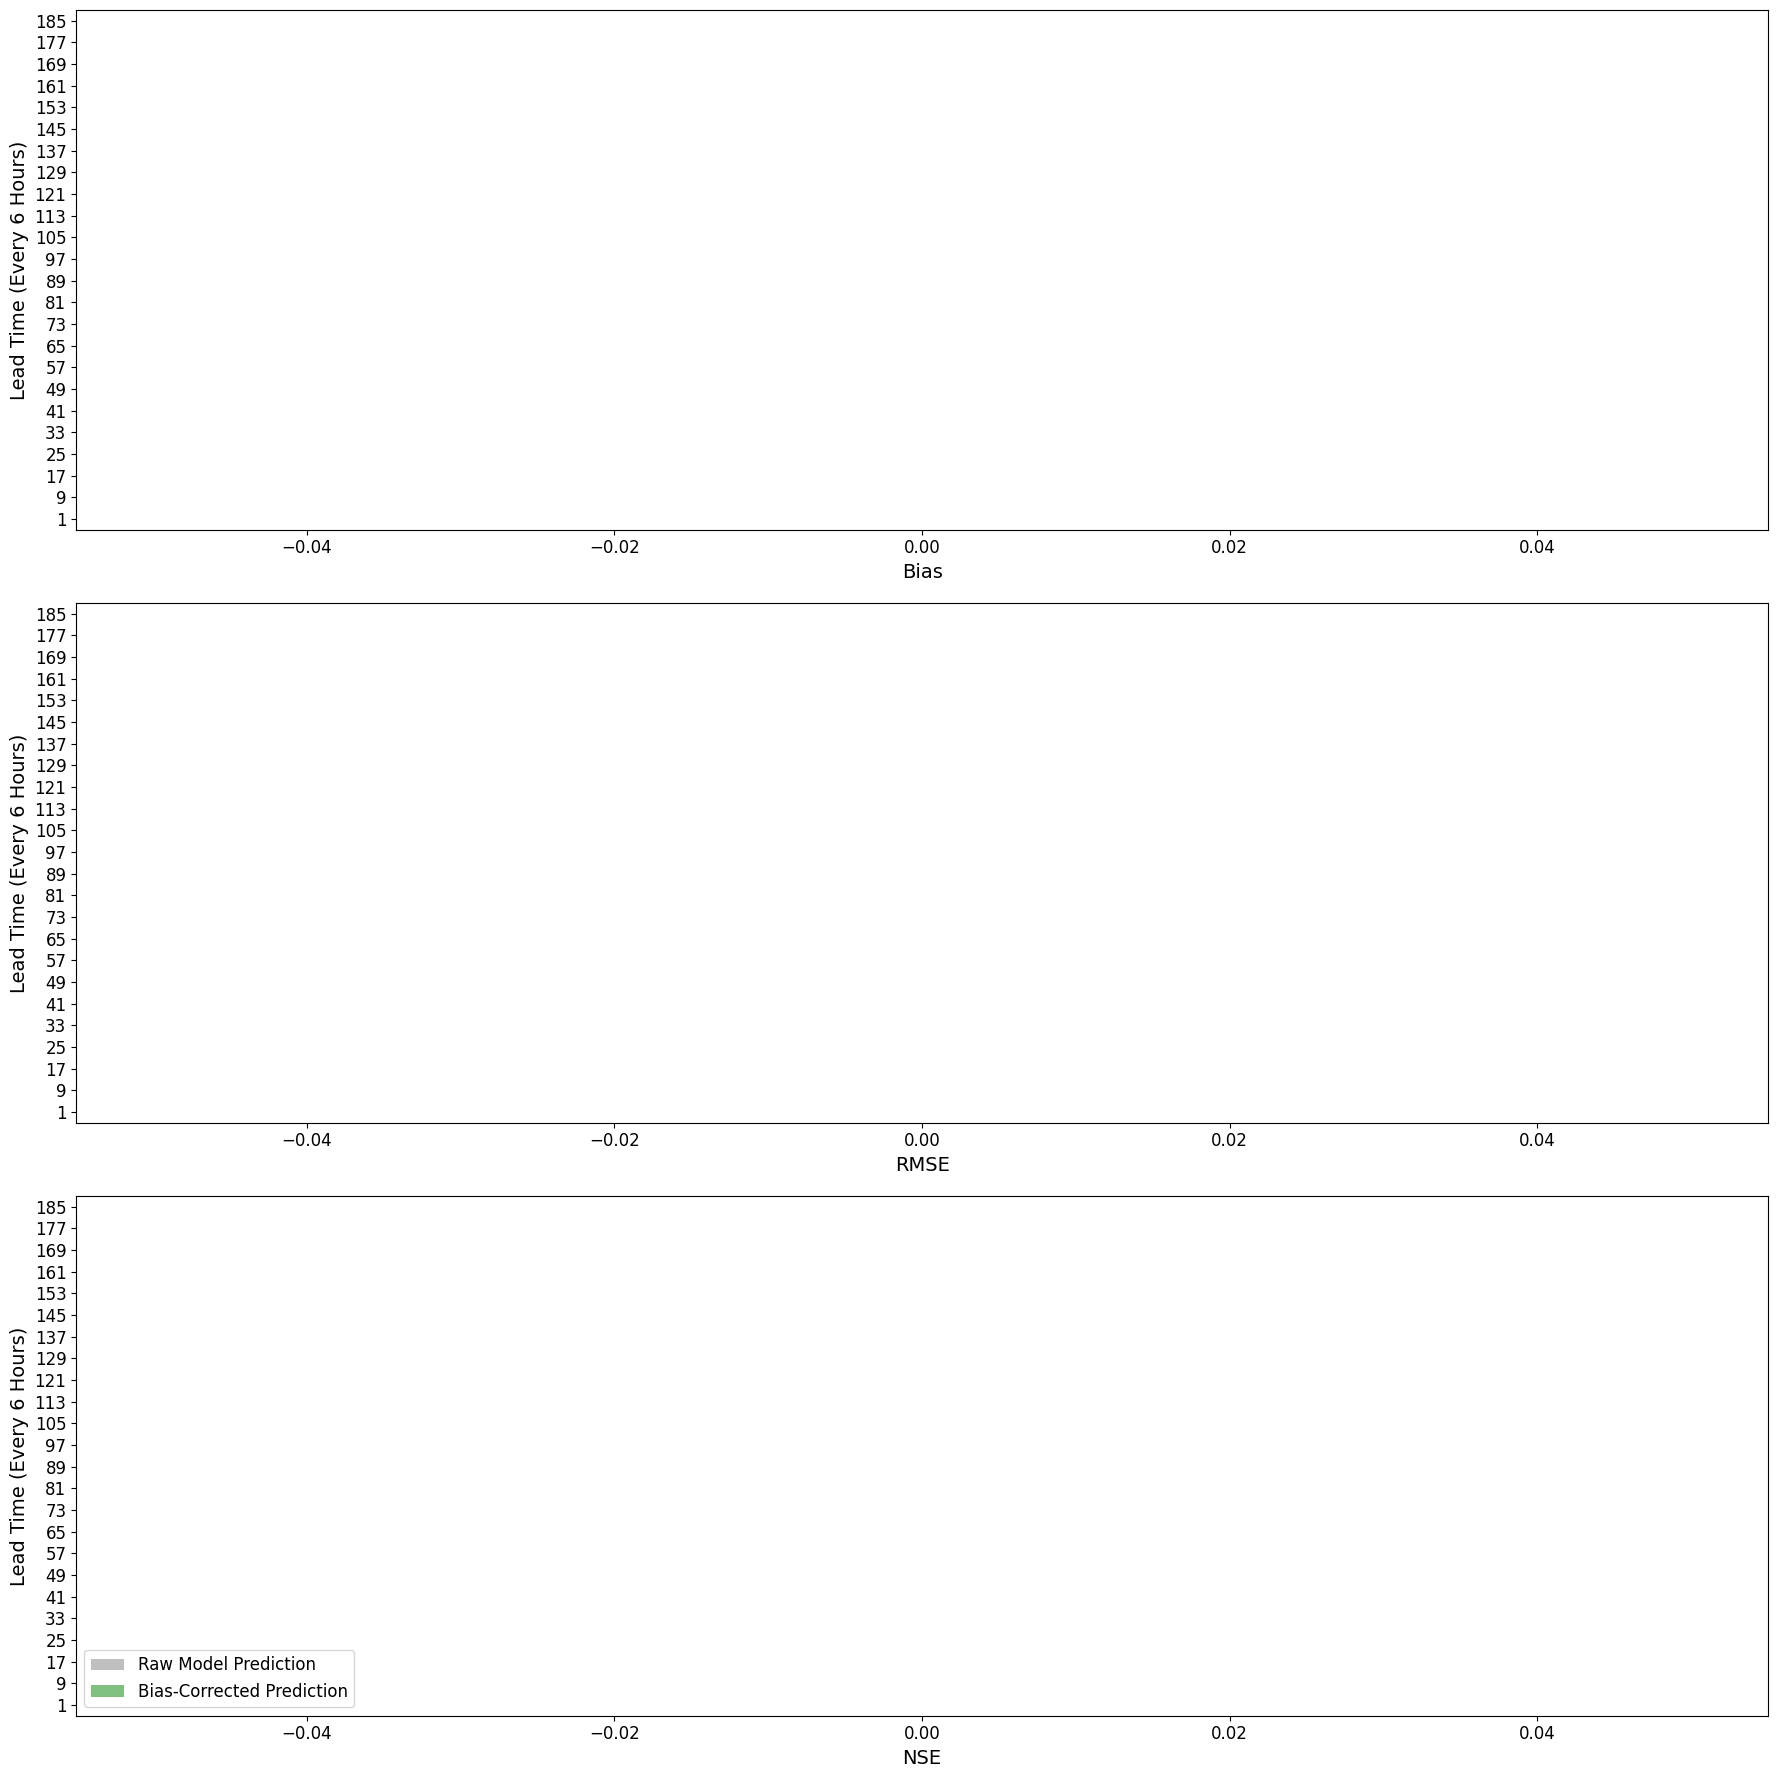

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Select indices for every 6th time step
time_indices = range(0, 186, 8)

def rmse(predictions, true_values):
    return np.sqrt(np.mean((predictions - true_values) ** 2, axis=(0, 2)))

def nse(predictions, true_values):
    # Calculate the mean of true values across samples (axis 0) and lead time (axis 2)
    true_mean = np.mean(true_values, axis=(0, 2), keepdims=True)
    # Compute the NSE formula
    numerator = np.sum((predictions - true_values) ** 2, axis=(0, 2))
    denominator = np.sum((true_values - true_mean) ** 2, axis=(0, 2))
    return 1 - numerator / denominator

# Create figure with subplots (3 rows, 1 column)
fig, axes = plt.subplots(3, 1, figsize=(18, 18))

# Bias Plot
bias_raw_samples = [np.mean(Test_r[:, :, i:i+6] - Test_t[:, :, i:i+6], axis=(0, 2)) for i in time_indices]
bias_corrected_samples = [np.mean(Test_p[:, :, i:i+6] - Test_t[:, :, i:i+6], axis=(0, 2)) for i in time_indices]
axes[0].boxplot(bias_raw_samples, positions=np.arange(len(time_indices)) * 2, widths=0.6, patch_artist=True, showfliers=False, boxprops=dict(facecolor='gray', alpha=0.5), medianprops=dict(color='black'), vert=False)
axes[0].boxplot(bias_corrected_samples, positions=np.arange(len(time_indices)) * 2 + 1, widths=0.6, showfliers=False, patch_artist=True, boxprops=dict(facecolor='green', alpha=0.5), medianprops=dict(color='black'), vert=False)
axes[0].set_yticks(np.arange(len(time_indices)) * 2 + 0.5)
axes[0].set_yticklabels([f'{i+1}' for i in time_indices])
axes[0].set_ylabel('Lead Time (Every 6 Hours)')
axes[0].set_xlabel('Bias')
axes[0].grid()

# RMSE Plot
rmse_raw_samples = [rmse(Test_r[:, :, i:i+6], Test_t[:, :, i:i+6]) for i in time_indices]
rmse_corrected_samples = [rmse(Test_p[:, :, i:i+6], Test_t[:, :, i:i+6]) for i in time_indices]
axes[1].boxplot(rmse_raw_samples, positions=np.arange(len(time_indices)) * 2, widths=0.6, patch_artist=True, showfliers=False, boxprops=dict(facecolor='gray', alpha=0.5), medianprops=dict(color='black'), vert=False)
axes[1].boxplot(rmse_corrected_samples, positions=np.arange(len(time_indices)) * 2 + 1, widths=0.6, showfliers=False, patch_artist=True, boxprops=dict(facecolor='green', alpha=0.5), medianprops=dict(color='black'), vert=False)
axes[1].set_yticks(np.arange(len(time_indices)) * 2 + 0.5)
axes[1].set_yticklabels([f'{i+1}' for i in time_indices])
axes[1].set_ylabel('Lead Time (Every 6 Hours)')
axes[1].set_xlabel('RMSE')
axes[1].grid()

# NSE Plot
nse_raw_samples = [nse(Test_r[:, :, i:i+6], Test_t[:, :, i:i+6]) for i in time_indices]
nse_corrected_samples = [nse(Test_p[:, :, i:i+6], Test_t[:, :, i:i+6]) for i in time_indices]
axes[2].boxplot(nse_raw_samples, positions=np.arange(len(time_indices)) * 2, widths=0.6, patch_artist=True, showfliers=False, boxprops=dict(facecolor='gray', alpha=0.5), medianprops=dict(color='black'), vert=False)
axes[2].boxplot(nse_corrected_samples, positions=np.arange(len(time_indices)) * 2 + 1, widths=0.6, showfliers=False, patch_artist=True, boxprops=dict(facecolor='green', alpha=0.5), medianprops=dict(color='black'), vert=False)
axes[2].set_yticks(np.arange(len(time_indices)) * 2 + 0.5)
axes[2].set_yticklabels([f'{i+1}' for i in time_indices])
axes[2].set_ylabel('Lead Time (Every 6 Hours)')
axes[2].set_xlabel('NSE')

# Add the legend only to the last (bottom) subplot
axes[2].legend(handles=[Patch(facecolor='gray', alpha=0.5, label='Raw Model Prediction'),
                       Patch(facecolor='green', alpha=0.5, label='Bias-Corrected Prediction')],
               loc='lower left')

axes[2].grid()

# Adjust layout and display
plt.tight_layout()


# Optionally, save the figure
plt.savefig('combined_leadtime_performance.png', dpi=300, bbox_inches='tight')
plt.show()